## Загрузка библиотек

In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, interpolate
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

##Работа с данными

###Загрузка данных

In [70]:
def safe_read_csv(file_path):
    encodings = ['cp1251', 'windows-1251', 'utf-8', 'latin1']
    for enc in encodings:
        try:
            df = pd.read_csv(file_path, encoding=enc)
            print(f"✓ {file_path} загружен ({enc}): {df.shape}")
            return df
        except:
            continue
    raise ValueError(f"Не удалось загрузить {file_path}")

# Загрузка
df_main = safe_read_csv('normalised_export.csv')
df_known = safe_read_csv('inversion radius (1).csv')

✓ normalised_export.csv загружен (cp1251): (304193, 19)
✓ inversion radius (1).csv загружен (cp1251): (81, 10)


###Обработка данных

####df_main

In [71]:
df_main

shotn    time R-R_lcfs  T_e/<Te>  n_e/<ne>  I_p    B_T Volume    W_e  \
0           №      ms       mm    1.0000    1.0000   kA      T    m^3     kJ   
1       41504  170.48   -0.188    0.2489    0.5306  394  0.812  0.633  0.845   
2       41504  170.48   -2.188    0.5870    0.6447  394  0.812  0.633  0.845   
3       41504  170.48   -7.088    1.2860    1.1520  394  0.812  0.633  0.845   
4       41504  170.48   -9.488    1.6750    1.4450  394  0.812  0.633  0.845   
...       ...     ...      ...       ...       ...  ...    ...    ...    ...   
304188  45999  206.65  -13.023    2.4660    1.5100  308  0.811  0.546  1.578   
304189  45999  206.65  -15.223    2.5150    1.5490  308  0.811  0.546  1.578   
304190  45999  206.65  -17.223    2.5410    1.5510  308  0.811  0.546  1.578   
304191  45999  206.65  -29.023    1.8930    1.3580  308  0.811  0.546  1.578   
304192  45999  206.65  -31.723    1.1610    1.1540  308  0.811  0.546  1.578   

          l42        <n>l  elong before sawtooth #  Upl*Ipl NBI1     NBI2  \
0          cm  10^19 m^-3  1.000                 №       kW   kW       kW   
1       71.13       0.939  1.846                13  1065.55    0        0   
2       71.13       0.939  1.846                13  1065.55    0        0   
3       71.13       0.939  1.846                13  1065.55    0        0   
4       71.13       0.939  1.846                13  1065.55    0        0   
...       ...         ...    ...               ...      ...  ...      ...   
304188  65.14        3.21  1.824                26   293.01    0  1248.66   
304189  65.14        3.21  1.824                26   293.01    0  1248.66   
304190  65.14        3.21  1.824                26   293.01    0  1248.66   
304191  65.14        3.21  1.824                26   293.01    0  1248.66   
304192  65.14        3.21  1.824                26   293.01    0  1248.66   

          <Te>        <ne>     R  
0           eV  10^19 m^-3    cm  
1        442.6           1    59  
2        442.6           1    57  
3        442.6           1  52.1  
4        442.6           1  49.7  
...        ...         ...   ...  
304188  237.47        4.15  45.1  
304189  237.47        4.15  42.9  
304190  237.47        4.15  40.9  
304191  237.47        4.15  29.1  
304192  237.47        4.15  26.4  

[304193 rows x 19 columns]

In [72]:
df_main.drop(0, inplace=True)

In [73]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304192 entries, 1 to 304192
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   shotn              304192 non-null  object 
 1   time               304192 non-null  object 
 2   R-R_lcfs           304192 non-null  object 
 3   T_e/<Te>           304192 non-null  float64
 4   n_e/<ne>           304192 non-null  float64
 5   I_p                304192 non-null  object 
 6   B_T                304192 non-null  object 
 7   Volume             304192 non-null  object 
 8   W_e                304192 non-null  object 
 9   l42                304192 non-null  object 
 10  <n>l               304192 non-null  object 
 11  elong              304192 non-null  float64
 12  before sawtooth #  304192 non-null  object 
 13  Upl*Ipl            304192 non-null  object 
 14  NBI1               304192 non-null  object 
 15  NBI2               304192 non-null  object 
 16  <T

In [74]:
for col in df_main.select_dtypes(include=['object']).columns:
    df_main[col] = pd.to_numeric(df_main[col], errors='coerce')
df_main['time'] = df_main['time'].round(1)
df_main = df_main.rename(columns={'T_e/<Te>': 'Te_norm'})

In [75]:
df_main.describe()

shotn           time       R-R_lcfs        Te_norm  \
count  304192.000000  304192.000000  304192.000000  304192.000000   
mean    44200.279787     183.340754     -11.590943       1.552222   
std      1267.128739      21.273753       9.450289       0.936846   
min     41504.000000     140.000000     -34.353000       0.010070   
25%     43014.000000     167.300000     -16.716000       0.706000   
50%     44221.000000     182.400000     -10.101000       1.687000   
75%     45477.000000     197.600000      -3.888000       2.314000   
max     45999.000000     261.200000       5.570000       6.112000   

            n_e/<ne>            I_p           B_T         Volume  \
count  304192.000000  304192.000000  304192.00000  304192.000000   
mean        1.328193     282.192615       0.76984       0.575929   
std         0.635495      49.080769       0.08030       0.036038   
min         0.036290      81.000000       0.40500       0.297000   
25%         0.875600     252.000000       0.70700       0.554000   
50%         1.374000     294.000000       0.80800       0.576000   
75%         1.724000     308.000000       0.81900       0.598000   
max         6.335000     440.000000       0.95000       0.775000   

                 W_e            l42           <n>l          elong  \
count  304192.000000  304192.000000  304192.000000  304192.000000   
mean        1.808588      65.657384       2.335052       1.753327   
std         1.028327       3.549671       1.007888       0.095113   
min         0.053000      40.210000       0.193000       1.307000   
25%         1.089000      63.420000       1.635000       1.723000   
50%         1.581000      65.360000       2.253000       1.764000   
75%         2.323000      67.660000       2.955000       1.806000   
max         9.185000      84.780000      10.467000       2.129000   

       before sawtooth #        Upl*Ipl           NBI1           NBI2  \
count      304192.000000  304192.000000  304192.000000  304192.000000   
mean           16.562319     440.698386     125.651055     559.758375   
std            16.578867     164.956143     282.759311     503.452514   
min             1.000000       0.000000       0.000000       0.000000   
25%             5.000000     336.560000       0.000000       0.000000   
50%            12.000000     416.880000       0.000000     513.870000   
75%            23.000000     513.590000       0.000000     887.870000   
max           180.000000    1324.580000    1448.270000    1959.970000   

                <Te>           <ne>              R  
count  304192.000000  304192.000000  304192.000000  
mean      358.338571       2.733217      47.476889  
std       107.032012       1.168572       9.448791  
min        54.500000       0.220000      26.400000  
25%       282.730000       1.930000      42.500000  
50%       348.310000       2.620000      49.000000  
75%       418.480000       3.390000      54.500000  
max       798.000000      12.290000      60.200000

####df_known

In [76]:
df_known

shotn,  ts_time 1  delay 1      amp1  period  ts_time 2  delay 2  \
0       NaN        NaN      NaN       NaN     NaN        NaN      NaN   
1   40428.0      176.6   0.3055  0.131642   1.899      179.6  -0.1305   
2   40458.0      170.5  -0.2395  0.067142   2.023      173.5   0.3005   
3   40522.0      161.4   0.2585  0.089806   1.831      164.4  -0.2785   
4   41025.0      197.8  -0.2075  0.134539   2.939      200.8   0.1555   
..      ...        ...      ...       ...     ...        ...      ...   
76  44381.0      179.4   0.3375  0.096537   1.895      182.4  -0.2795   
77  44427.0      176.4  -0.1905  0.095941   2.668      179.4   0.1975   
78  44435.0      179.4  -0.1885  0.349511   2.731      182.4   0.2615   
79  44438.0      185.4   0.1115  0.088272   1.470      188.5  -0.1585   
80  44838.0      188.5  -0.1935  0.169558   3.264      191.5   0.1005   

         amp period.1       R_inv  
0        NaN       ms         NaN  
1   0.102587    1.703  496.417448  
2   0.104206    2.493  493.767409  
3   0.095344      1.8  510.098649  
4   0.134028    2.671  508.309804  
..       ...      ...         ...  
76  0.076770    2.057  494.824859  
77  0.102757    2.642  513.235446  
78  0.347211     2.58  508.685464  
79  0.088102     1.74  505.943966  
80  0.114516    2.735  523.140688  

[81 rows x 10 columns]

In [77]:
df_known.drop(0, inplace=True)

In [78]:
df_known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 1 to 80
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   shotn,     80 non-null     float64
 1   ts_time 1  80 non-null     float64
 2   delay 1    80 non-null     float64
 3   amp1       80 non-null     float64
 4   period     80 non-null     float64
 5   ts_time 2  80 non-null     float64
 6   delay 2    80 non-null     float64
 7   amp        80 non-null     float64
 8   period.1   80 non-null     object 
 9   R_inv      80 non-null     float64
dtypes: float64(9), object(1)
memory usage: 6.4+ KB


In [79]:
df_known = df_known.rename(columns={'shotn,': 'shotn'})
for col in df_known.select_dtypes(include=['object']).columns:
    df_known[col] = pd.to_numeric(df_known[col], errors='coerce')
df_known['R_inv'] = df_known['R_inv'] / 10

In [80]:
df_known.describe()

shotn   ts_time 1    delay 1       amp1     period   ts_time 2  \
count     80.000000   80.000000  80.000000  80.000000  80.000000   80.000000   
mean   43429.212500  188.072500  -0.024150   0.273998   2.645562  191.113750   
std     1104.242735   16.655132   0.232854   0.228119   0.690452   16.658861   
min    40428.000000  158.200000  -0.335500   0.059558   1.265000  161.200000   
25%    42691.500000  176.400000  -0.236500   0.118052   2.157250  179.400000   
50%    43960.500000  185.500000  -0.140000   0.196909   2.670000  188.500000   
75%    44220.250000  197.650000   0.182000   0.390005   2.953250  200.725000   
max    44838.000000  231.200000   0.343500   1.147116   4.410000  234.200000   

         delay 2        amp   period.1      R_inv  
count  80.000000  80.000000  80.000000  80.000000  
mean    0.015450   0.277336   2.636037  51.434010  
std     0.218641   0.230896   0.550104   1.029056  
min    -0.341500   0.056576   1.652000  49.343888  
25%    -0.203000   0.107380   2.452000  50.774801  
50%     0.106500   0.207858   2.627000  51.541202  
75%     0.201000   0.374605   2.773500  52.314118  
max     0.349500   1.223545   3.634000  53.292153

##Выполнение задач

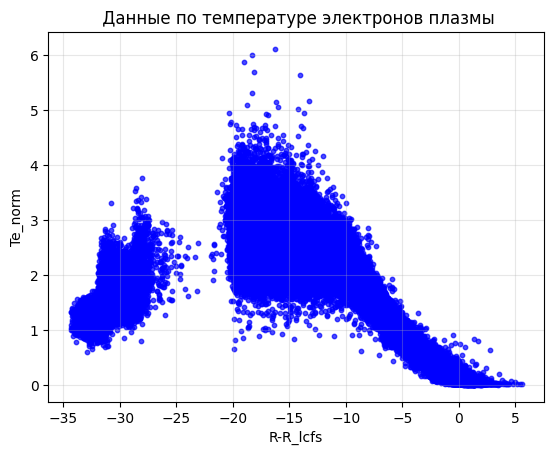

In [81]:
df_main.plot.scatter(x='R-R_lcfs', y='Te_norm', color='blue', s=10, alpha=0.7)
plt.title(' Данные по температуре электронов плазмы')
plt.xlabel('R-R_lcfs')
plt.ylabel('Te_norm')
plt.grid(True, alpha=0.3)
plt.show()

DF_MAIN
- **shotn**: номер разряда
- **Te_norm**: нормизованная электронная температура
- **R-R_lcfs**: расстояние от точки измерения до Последней Замкнутой Магнитной Поверхности (LCFS). Отрицательные значения = внутри плазмы (ядро), положительные = снаружи
- **I_p**: плазменный ток
- **B_T**: тороидальное поле

In [82]:
## Новый датасет для работы:
df_analis = pd.DataFrame(columns=['shotn', 'Te_before', 'Te_after', 'R', 'Rinv', 'I_p_before', 'B_t_before', 'I_p_after', 'B_t_after'])

for shotn in df_known['shotn']:
  shotn = int(shotn)
  if shotn in df_main['shotn'].values:
    t1 = df_known['ts_time 1'][df_known['shotn'] == shotn].values.tolist()[0]
    t2 = df_known['ts_time 2'][df_known['shotn'] == shotn].values.tolist()[0]
    Rinv = df_known['R_inv'][df_known['shotn'] == shotn].values.tolist()[0]
    R_list = df_main[df_main['shotn'] == shotn].R.unique().tolist()
    for Ra in R_list:
      itog = []
      df = df_main[(df_main['shotn'] == shotn) & (df_main['R'] == Ra)]
      df1 = df.iloc[np.argsort(np.abs(df['time'] - t1))]
      df2 = df.iloc[np.argsort(np.abs(df['time'] - t2))]
      Te_before = df1.Te_norm.values.tolist()[0]
      I_p_before = df1.I_p.values.tolist()[0]
      B_t_before = df1.B_T.values.tolist()[0]
      Te_after = df2.Te_norm.values.tolist()[0]
      I_p_after = df2.I_p.values.tolist()[0]
      B_t_after = df2.B_T.values.tolist()[0]
      if Te_after != Te_before:
        for d in [shotn, Te_before, Te_after, Ra, Rinv, I_p_before, B_t_before, I_p_after, B_t_after]:
          itog.append(d)
        df_analis.loc[len(df_analis)] = itog

In [83]:
df_analis

shotn  Te_before  Te_after     R       Rinv  I_p_before  B_t_before  \
0    42145.0     0.1950    0.2172  59.2  51.769585       440.0       0.819   
1    42145.0     0.2955    0.4892  58.1  51.769585       440.0       0.819   
2    42145.0     0.6924    0.8518  56.1  51.769585       440.0       0.819   
3    42145.0     1.8270    1.6700  51.2  51.769585       440.0       0.819   
4    42145.0     2.2270    1.7720  48.9  51.769585       440.0       0.819   
..       ...        ...       ...   ...        ...         ...         ...   
701  44838.0     2.3450    1.7190  47.5  52.314069       300.0       0.705   
702  44838.0     2.4160    1.7370  45.1  52.314069       300.0       0.705   
703  44838.0     2.5140    1.7540  42.9  52.314069       300.0       0.705   
704  44838.0     2.4890    1.7720  40.9  52.314069       300.0       0.705   
705  44838.0     1.6070    1.5410  28.9  52.314069       300.0       0.705   

     I_p_after  B_t_after  
0        440.0      0.819  
1        440.0      0.819  
2        440.0      0.819  
3        440.0      0.819  
4        440.0      0.819  
..         ...        ...  
701      300.0      0.705  
702      300.0      0.705  
703      300.0      0.705  
704      300.0      0.705  
705      300.0      0.705  

[706 rows x 9 columns]

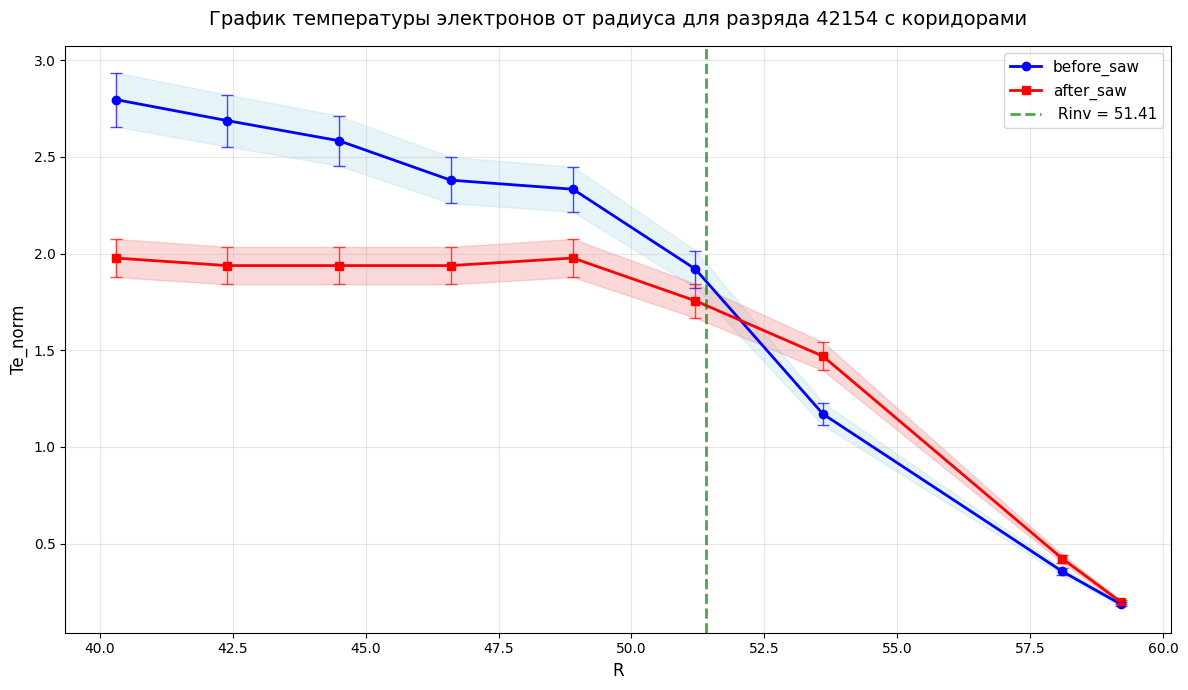

In [84]:
df = df_analis[df_analis['shotn'] == 42154]
df = df.sort_values(by='R')
Rinv = df.Rinv.values.tolist()[0]

# Создаем график
fig, ax = plt.subplots(figsize=(12, 7))

# Извлекаем данные для первой кривой
x = df['R'].values
y1 = df['Te_before'].values

error1 = y1 * 0.05
y1_lower = y1 - error1
y1_upper = y1 + error1

# Извлекаем данные для второй кривой
y2 = df['Te_after'].values

error2 = y2 * 0.05
y2_lower = y2 - error2
y2_upper = y2+ error2

# 1. Закрашенные области для обеих кривых
ax.fill_between(x, y1_lower, y1_upper, color='lightblue', alpha=0.3)
ax.fill_between(x, y2_lower, y2_upper, color='lightcoral', alpha=0.3)

# 2. Линии для обеих кривых
line1, = ax.plot(x, y1, 'b-', linewidth=2, marker='o', markersize=6, label='before_saw')
line2, = ax.plot(x, y2, 'r-', linewidth=2, marker='s', markersize=6, label='after_saw')

ax.axvline(x=Rinv, color='green', linestyle='--', linewidth=2, alpha=0.7, label= f' Rinv = {round(Rinv,2)}')

# 3. Error bars для обеих кривых
ax.errorbar(x, y1, yerr=error1, fmt='none', ecolor='blue', elinewidth=1, capsize=4, alpha=0.7)
ax.errorbar(x, y2, yerr=error2, fmt='none', ecolor='red', elinewidth=1, capsize=4, alpha=0.7)

# Настройки графика
ax.set_xlabel('R', fontsize=12)
ax.set_ylabel('Te_norm', fontsize=12)
ax.set_title('График температуры электронов от радиуса для разряда 42154 с коридорами', fontsize=14, pad=15)
ax.grid(True, alpha=0.3)

# Легенда
ax.legend(loc='best', fontsize=11)

plt.tight_layout()
plt.show()

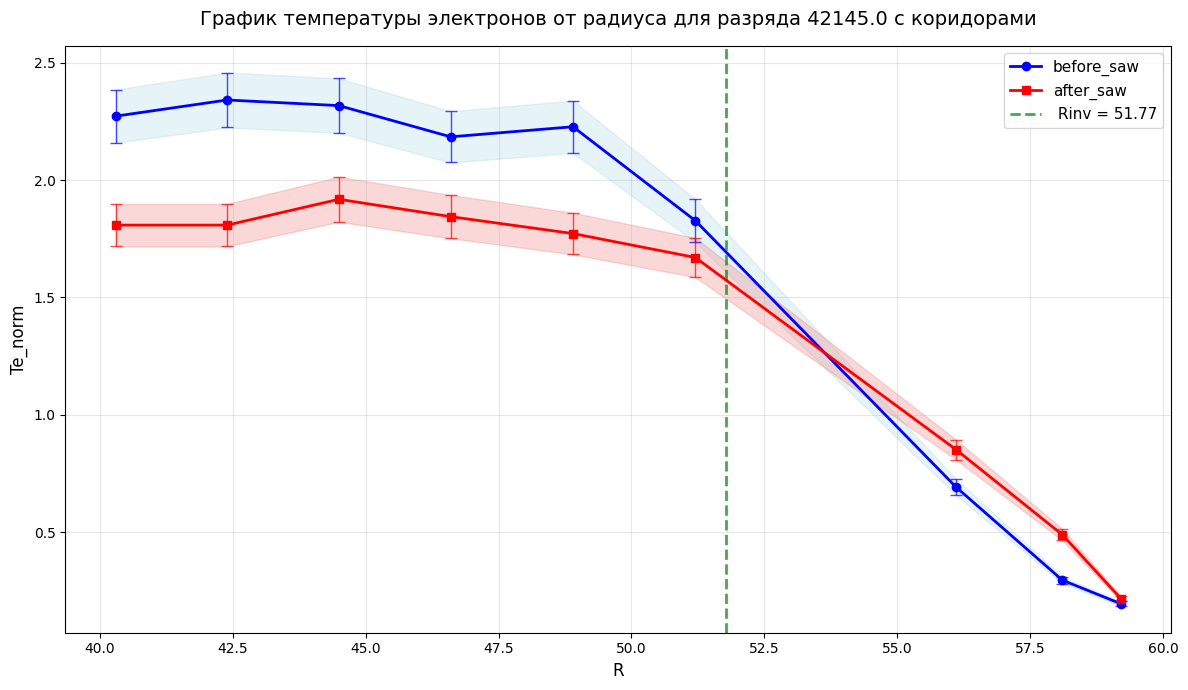

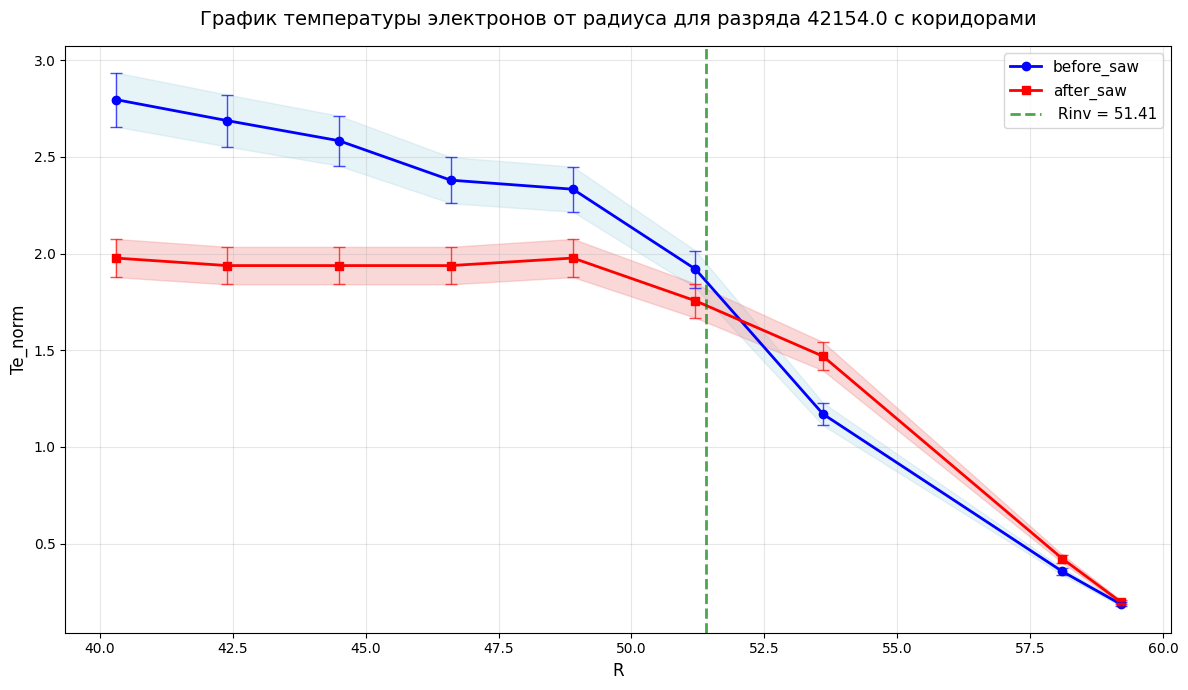

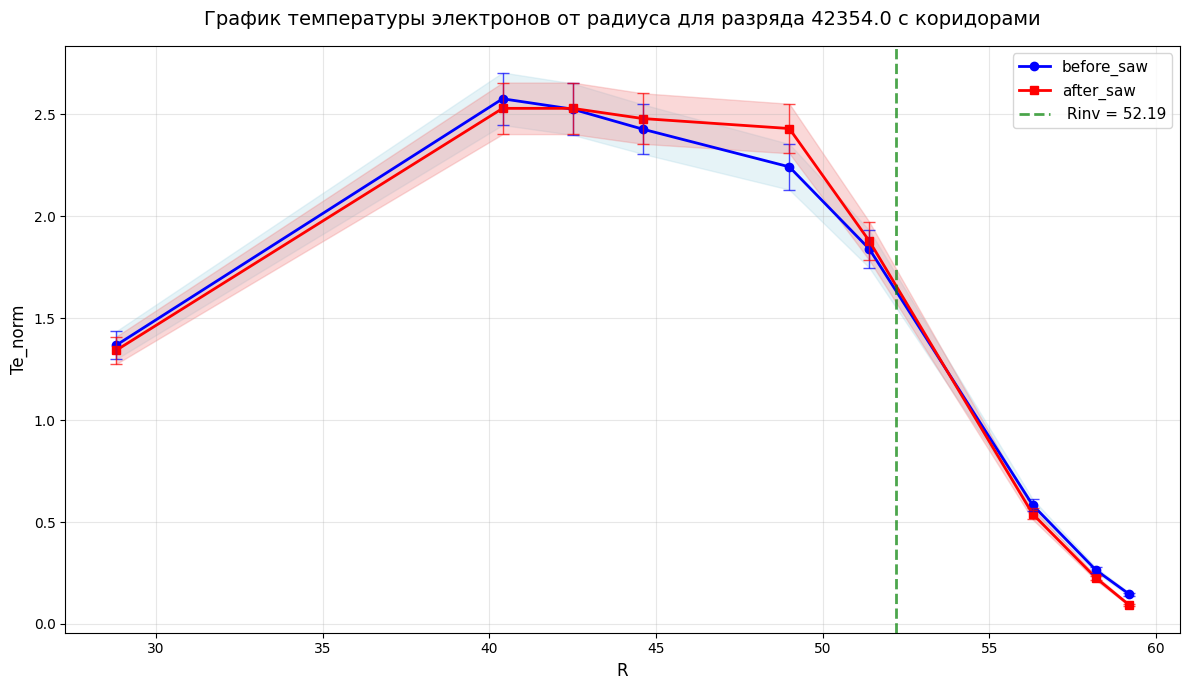

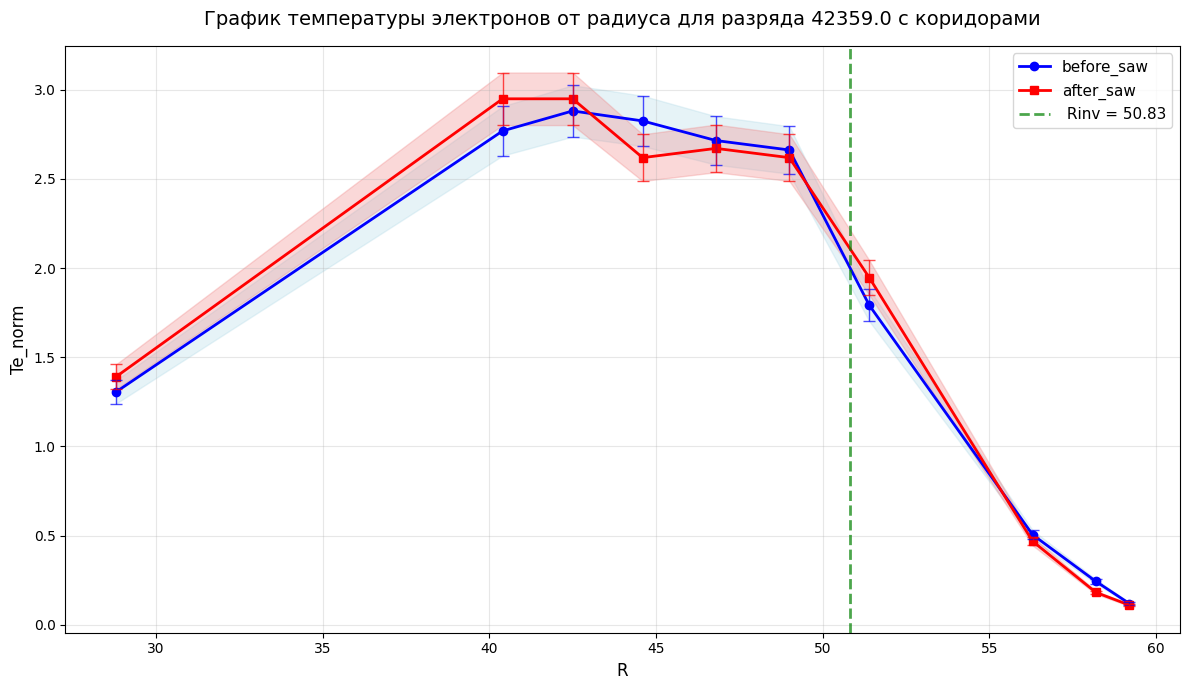

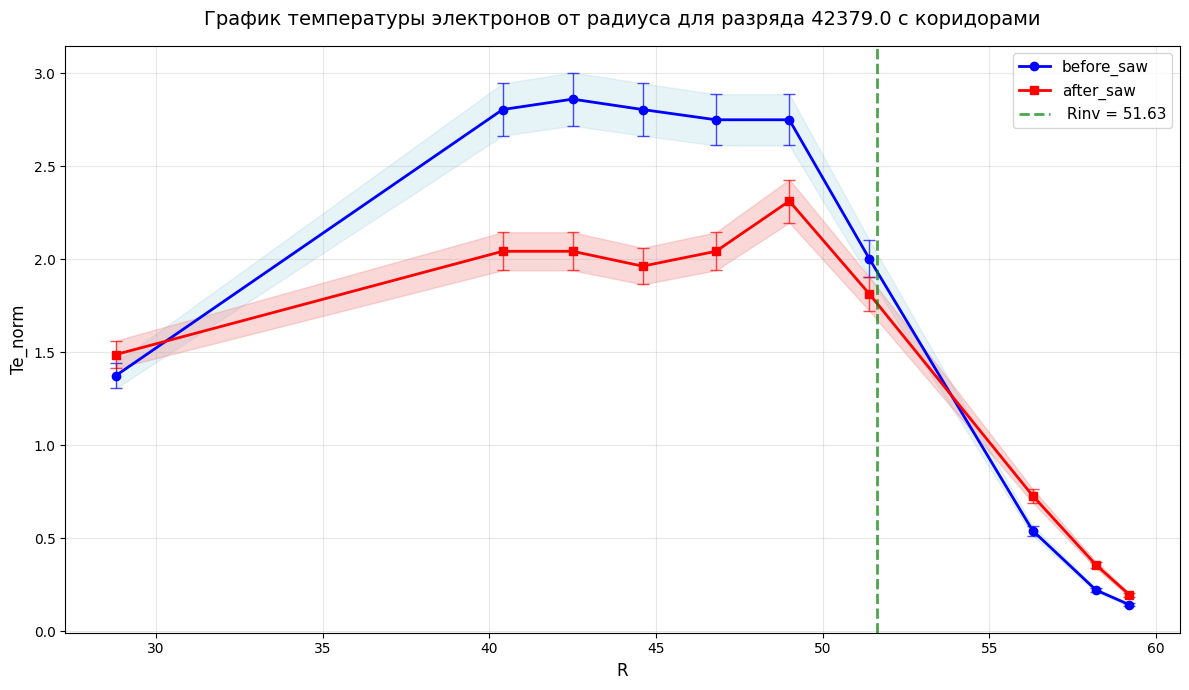

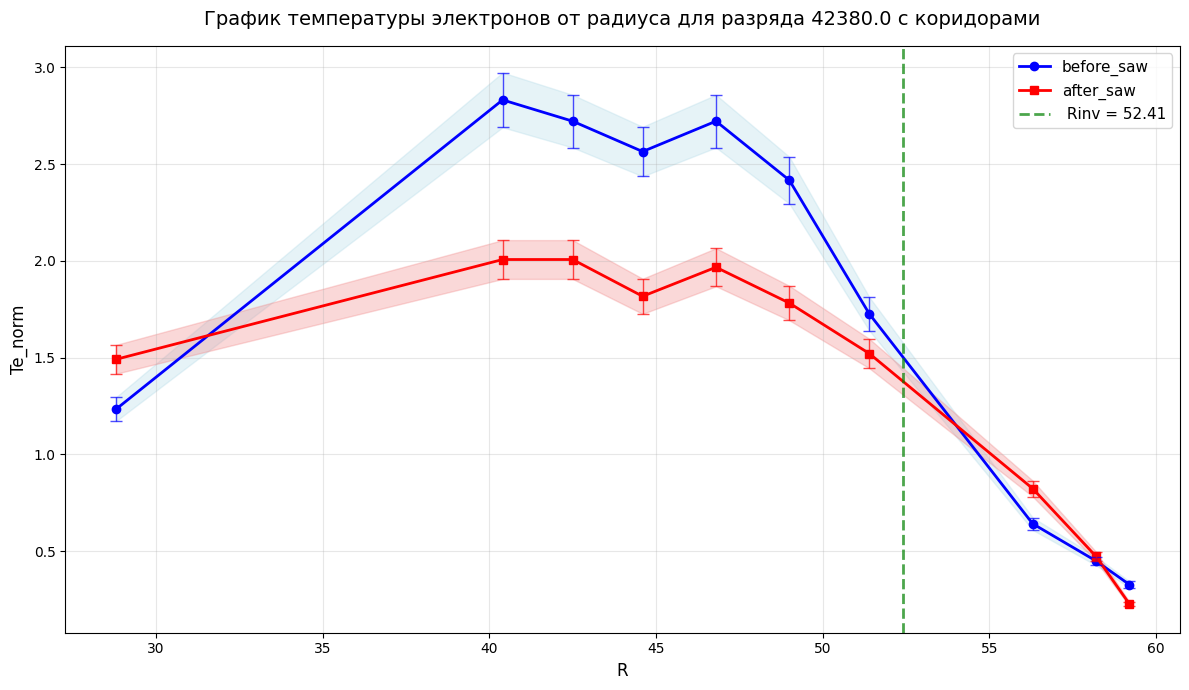

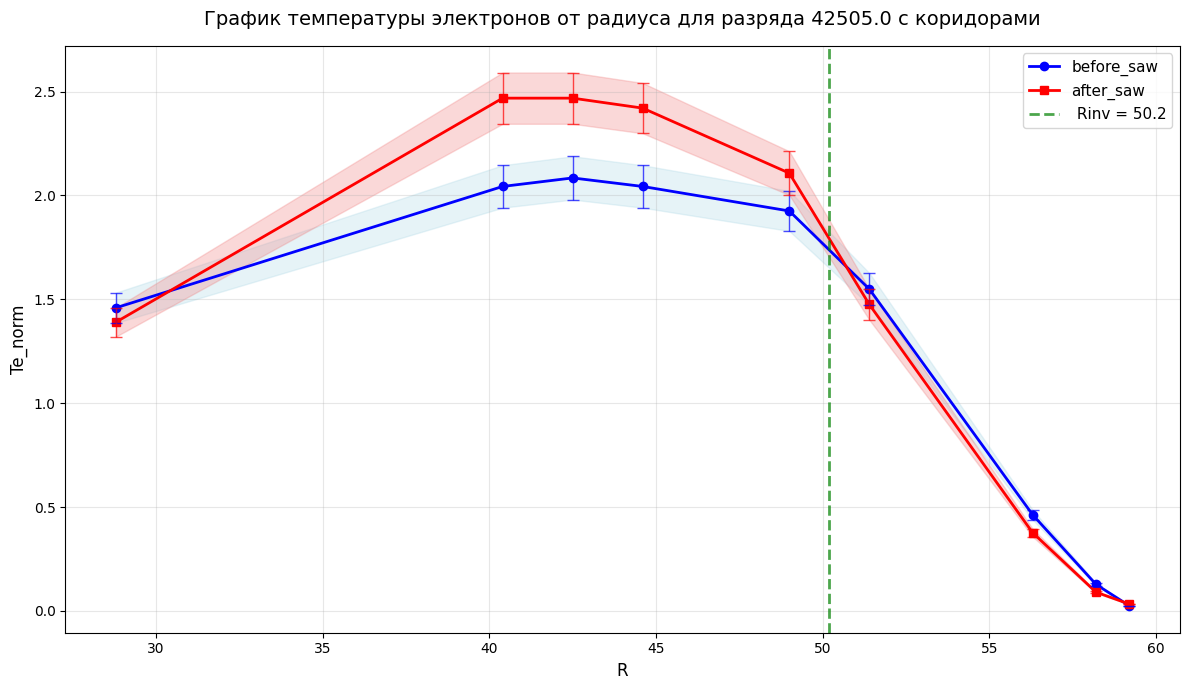

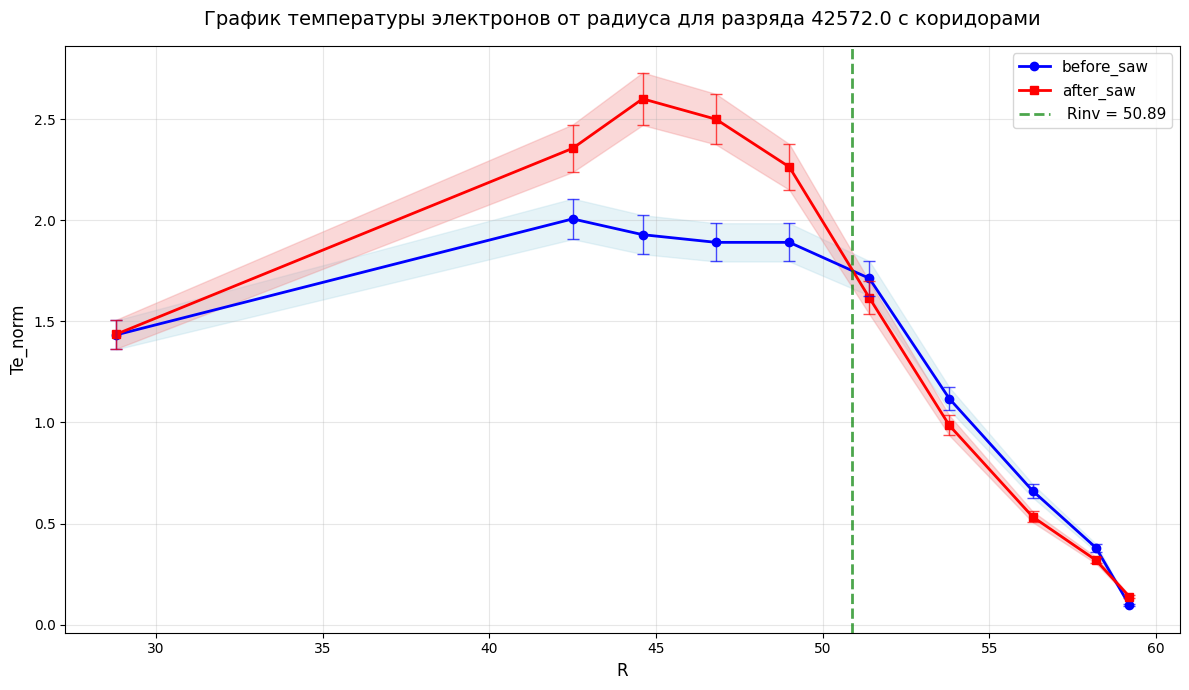

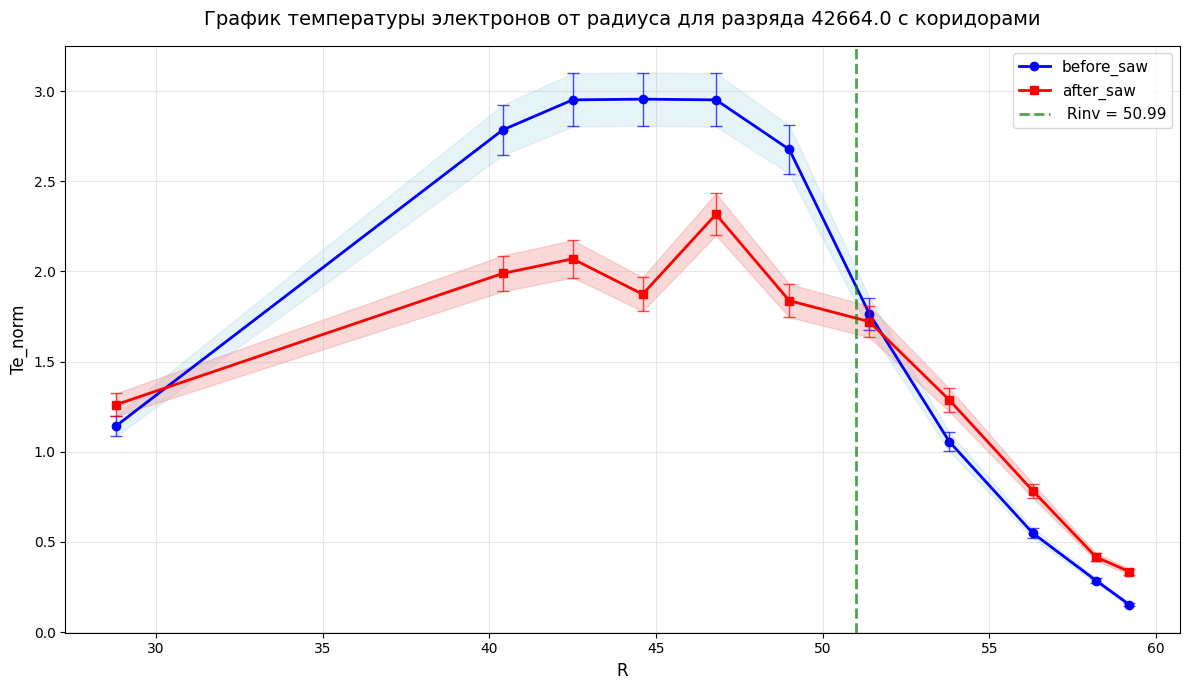

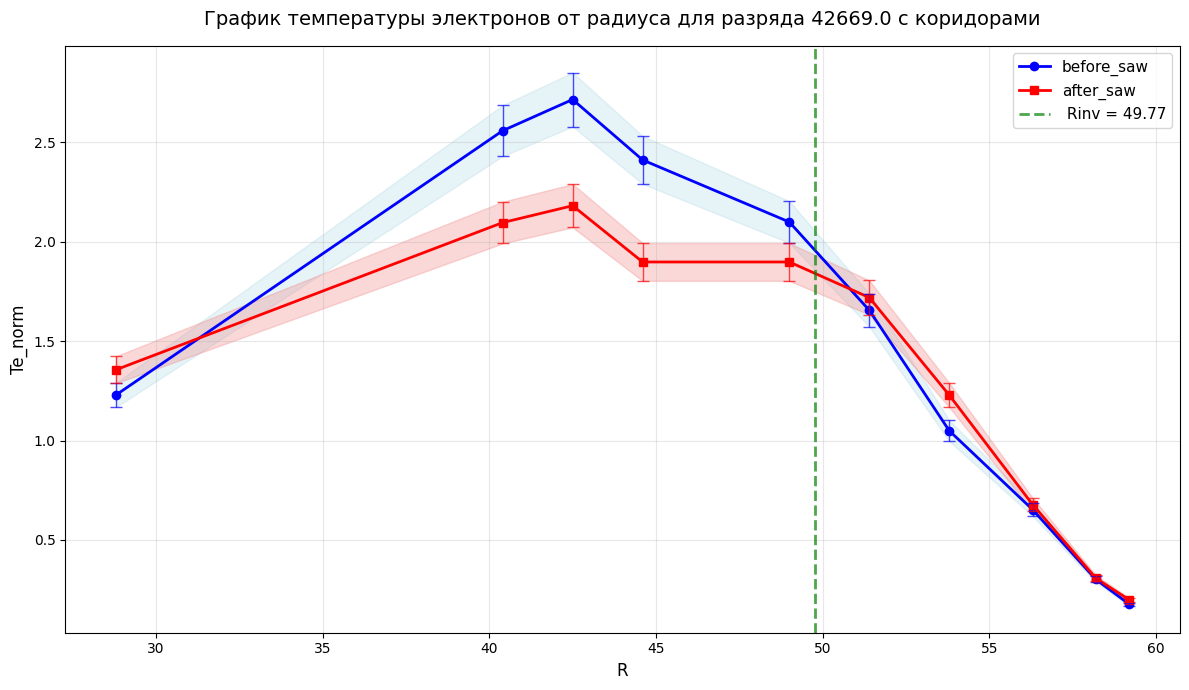

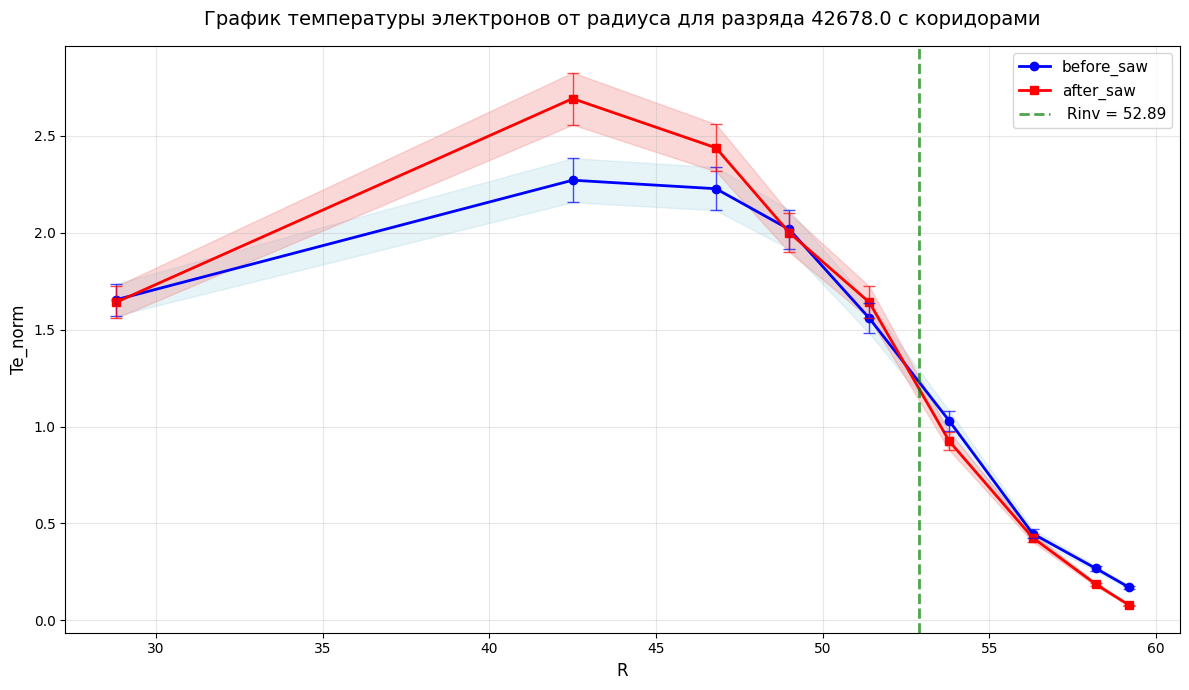

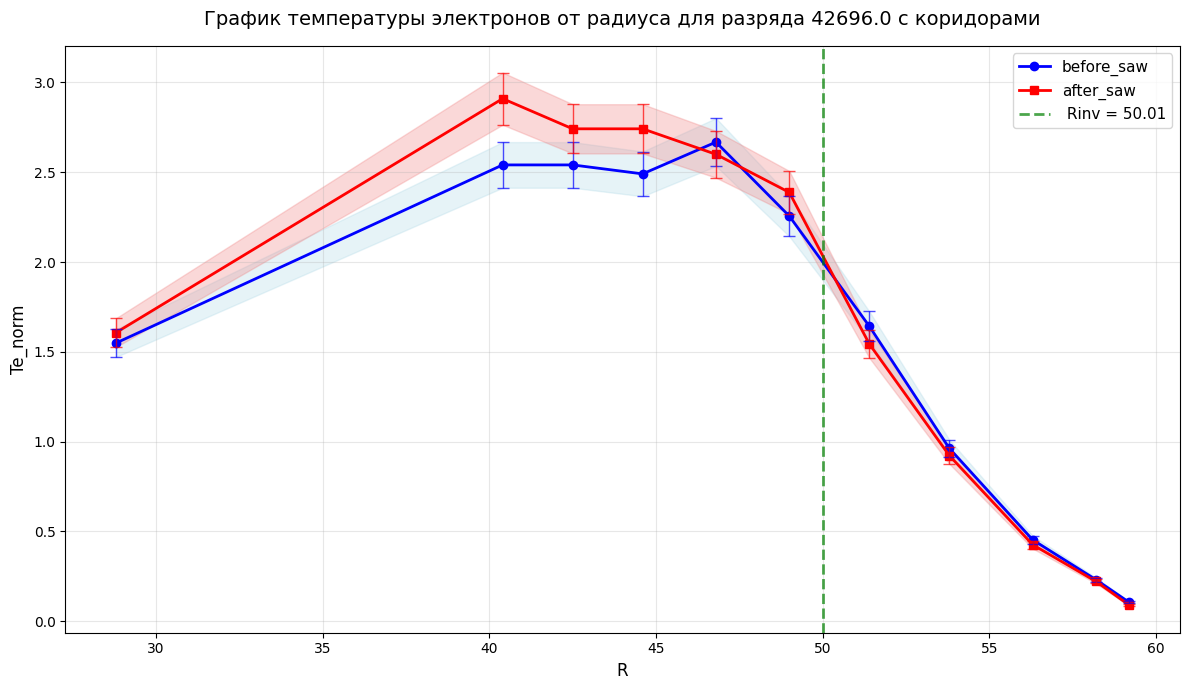

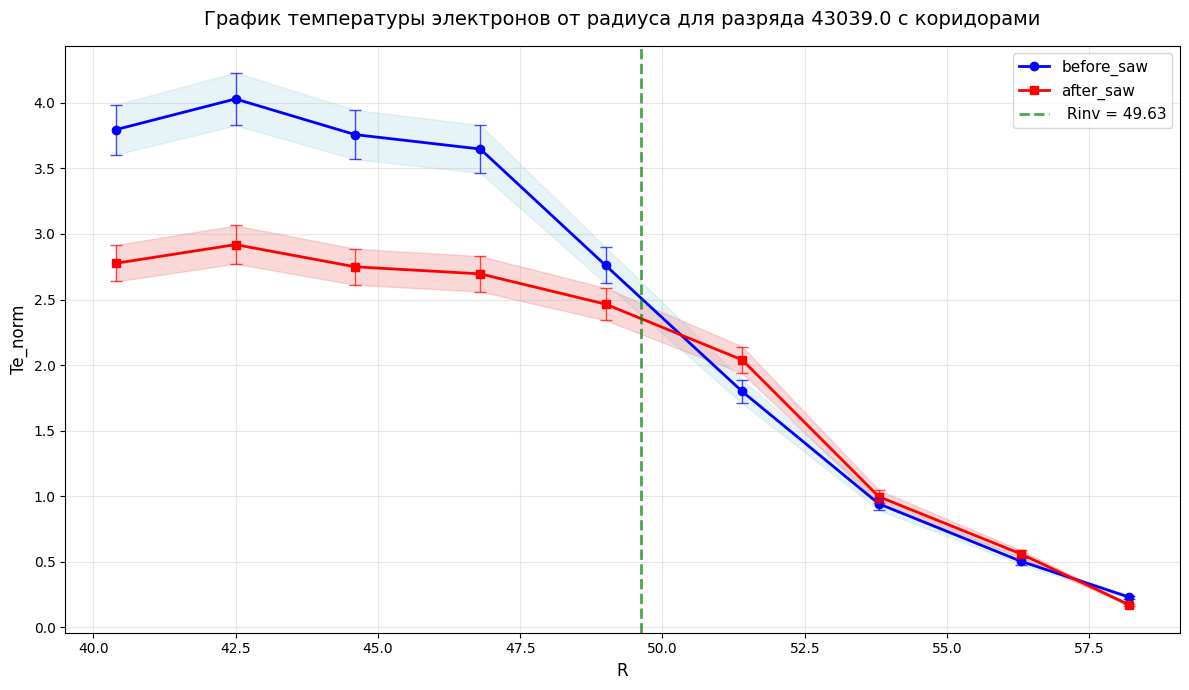

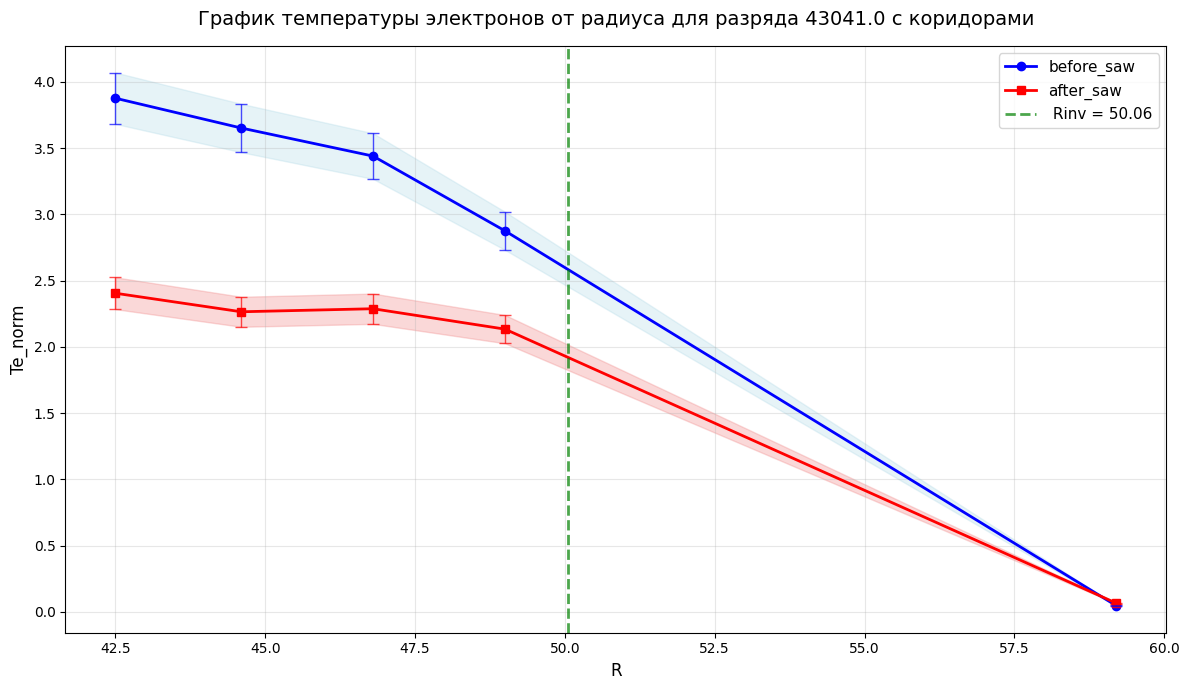

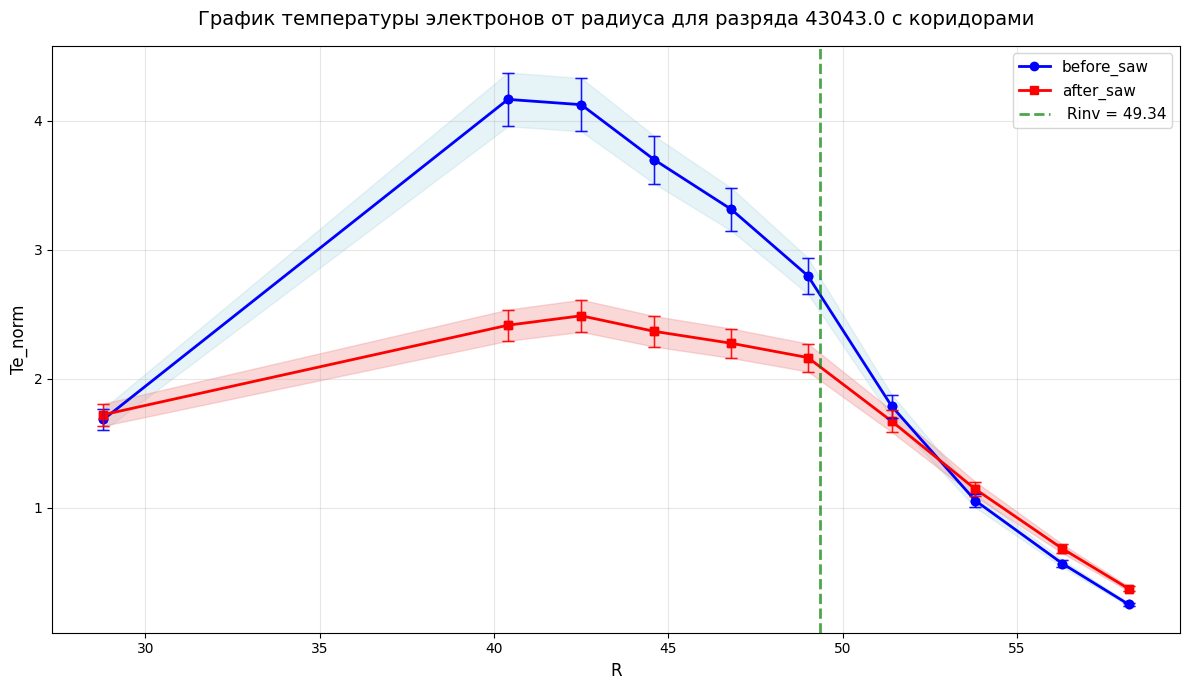

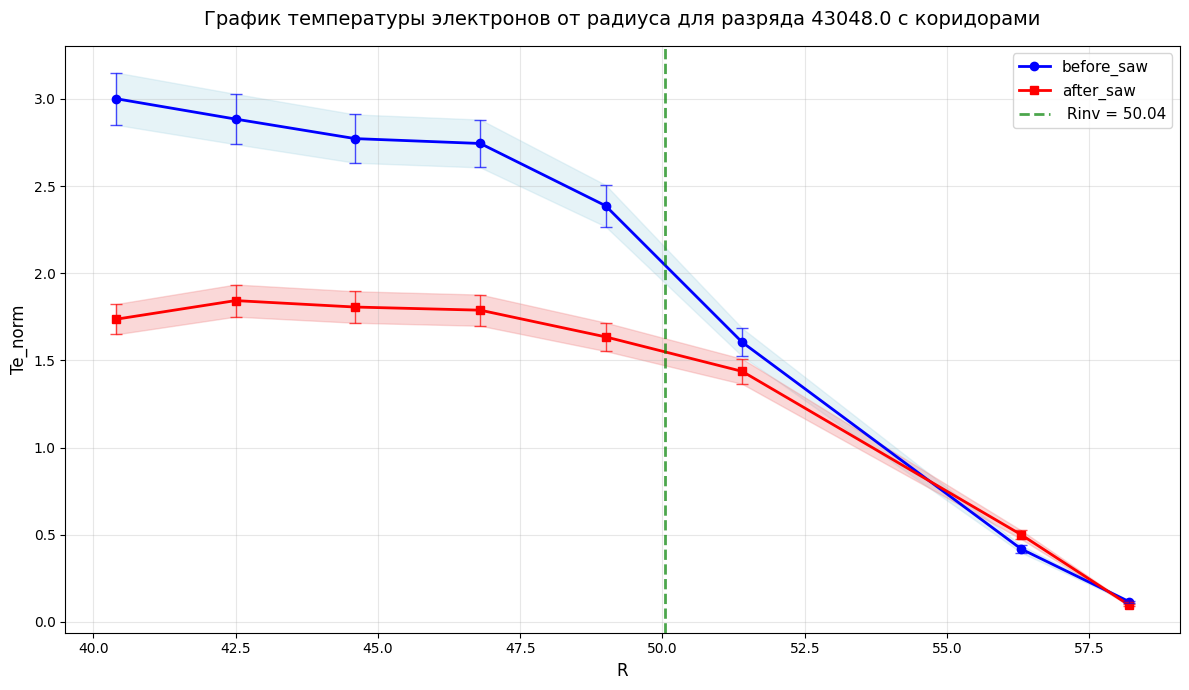

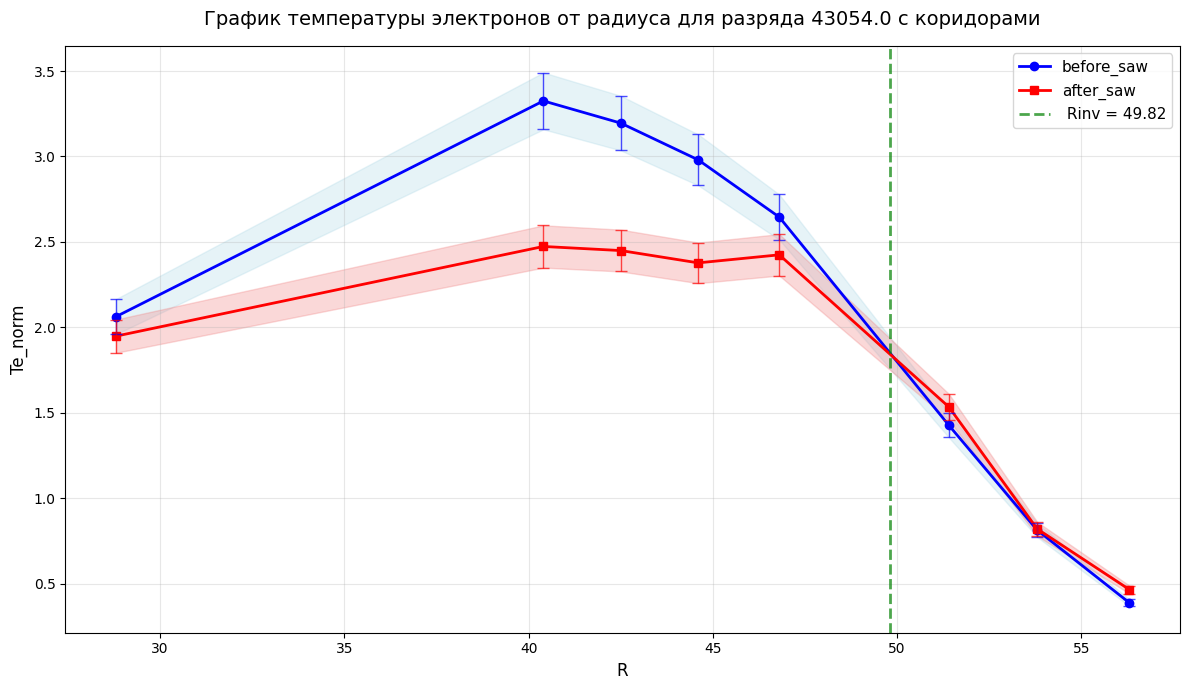

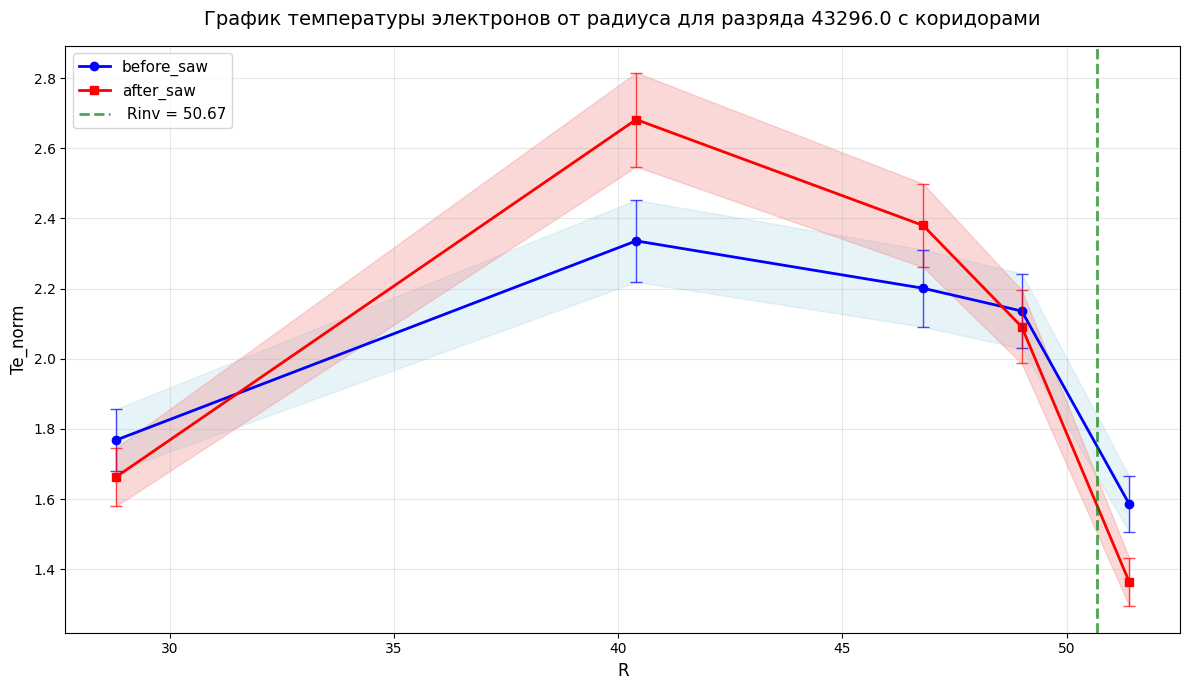

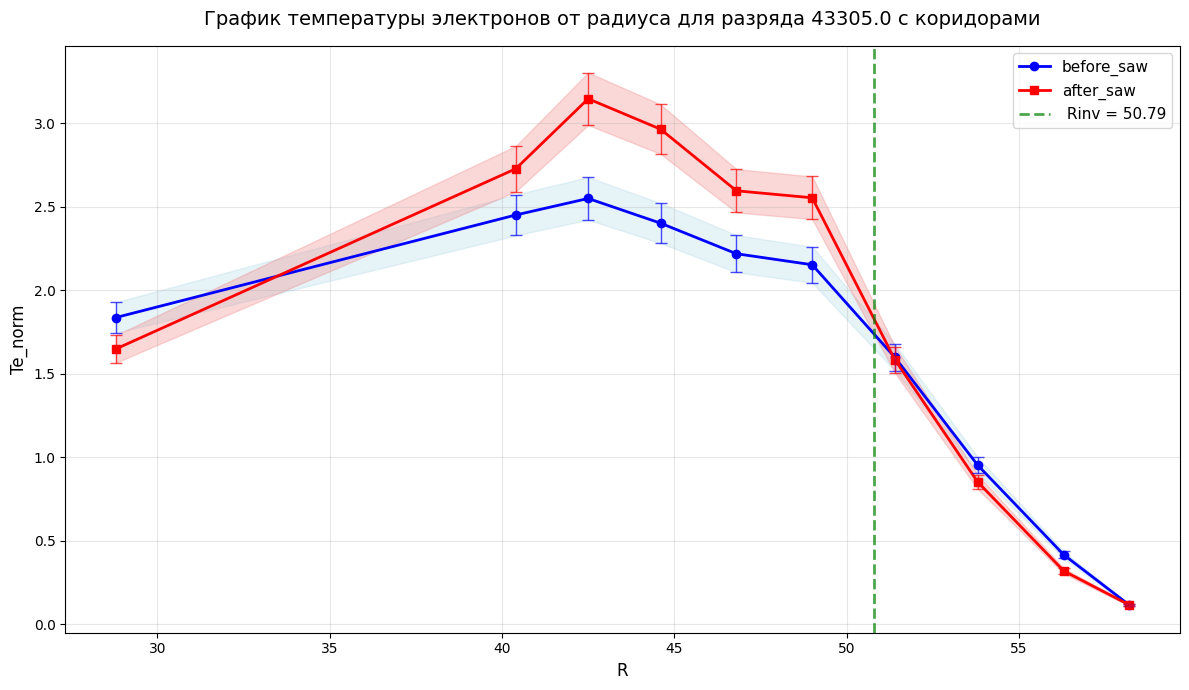

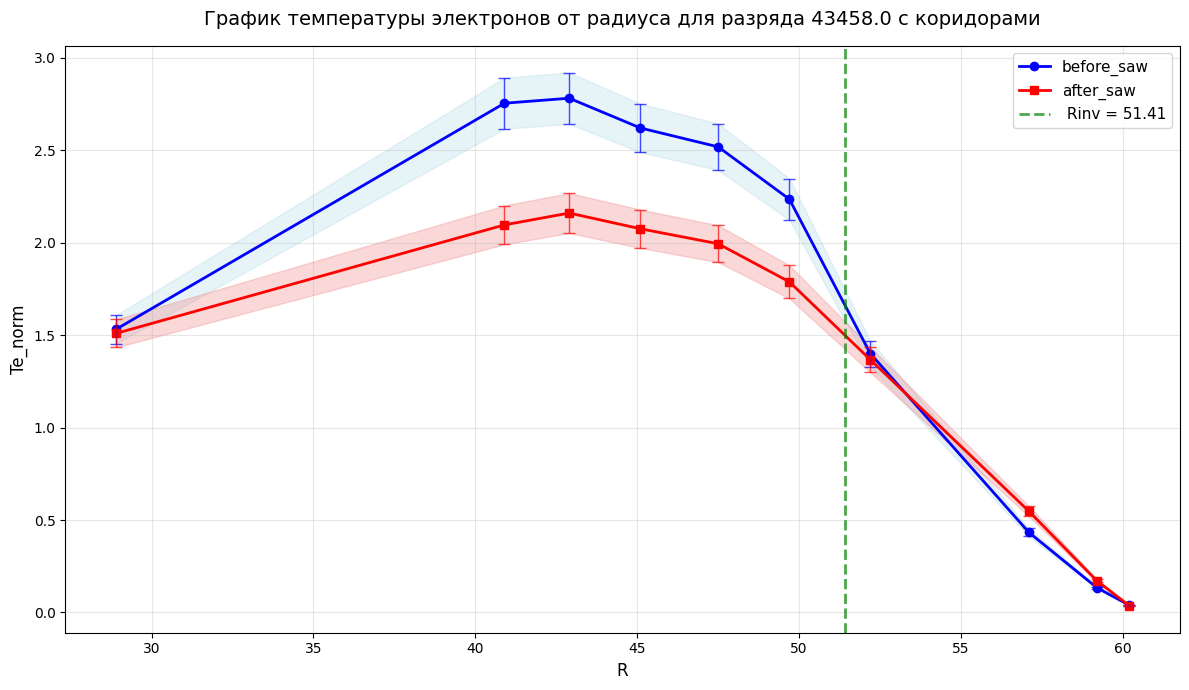

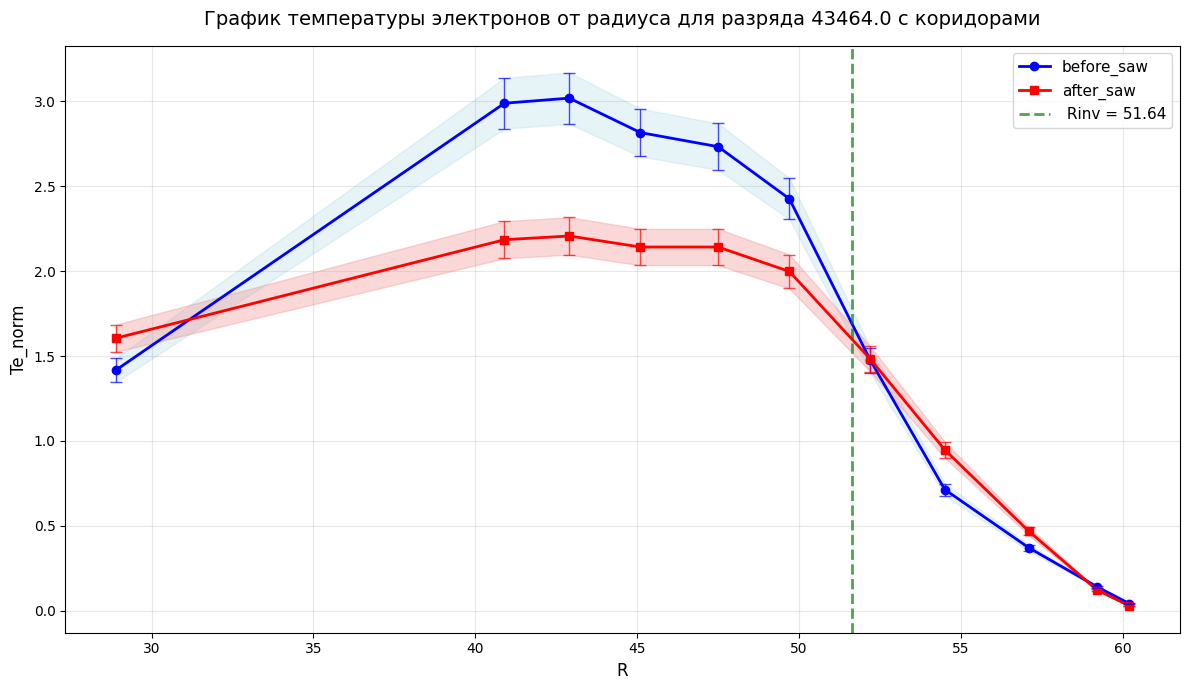

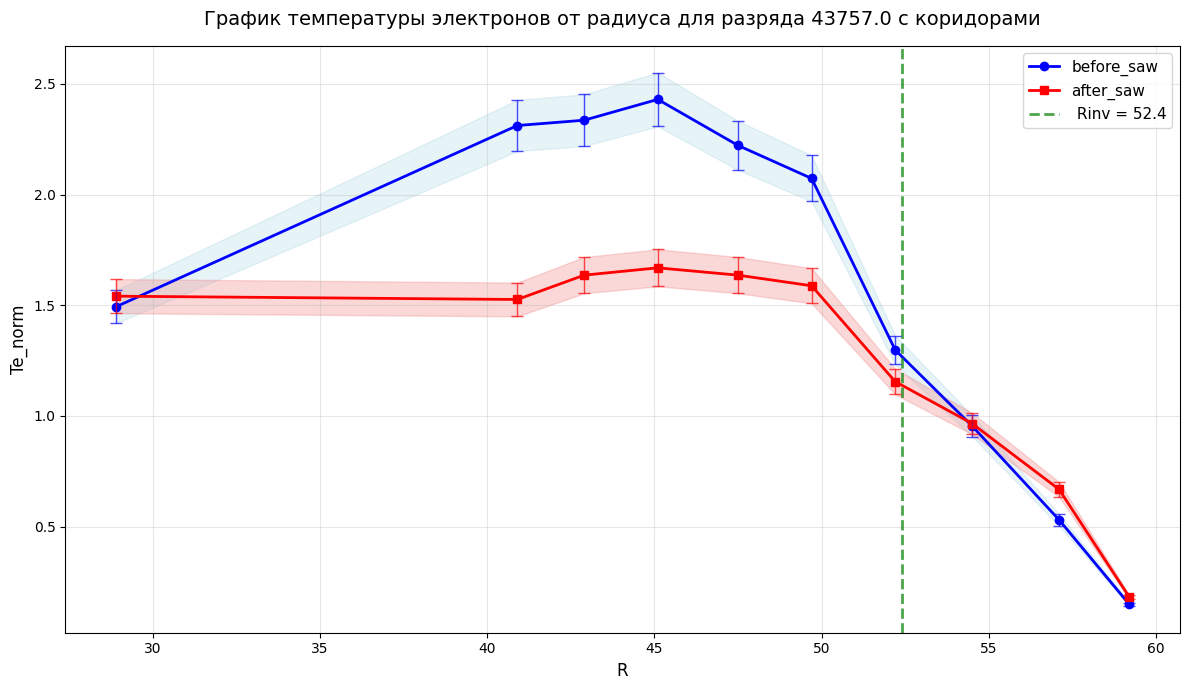

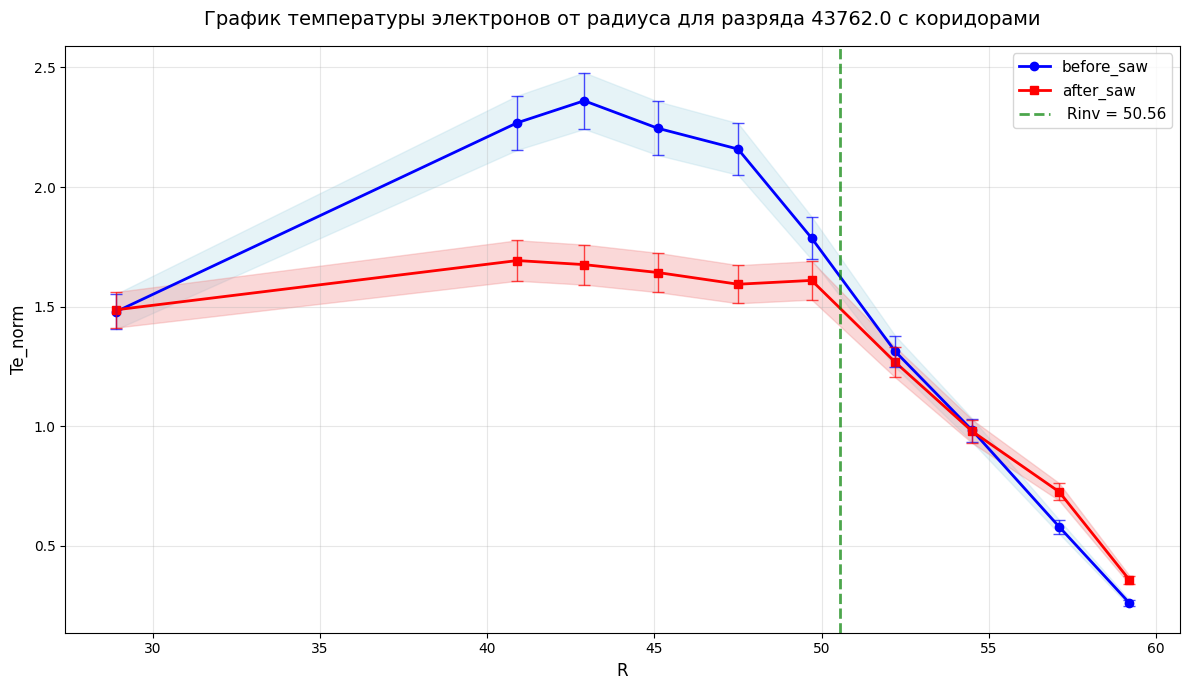

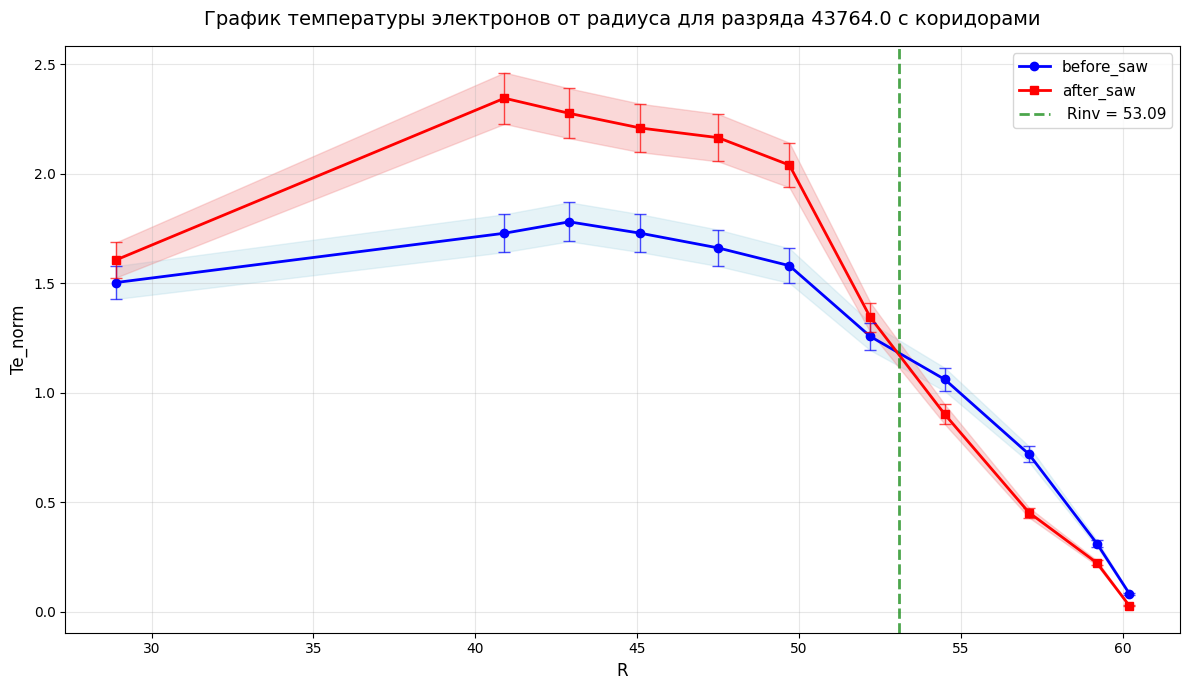

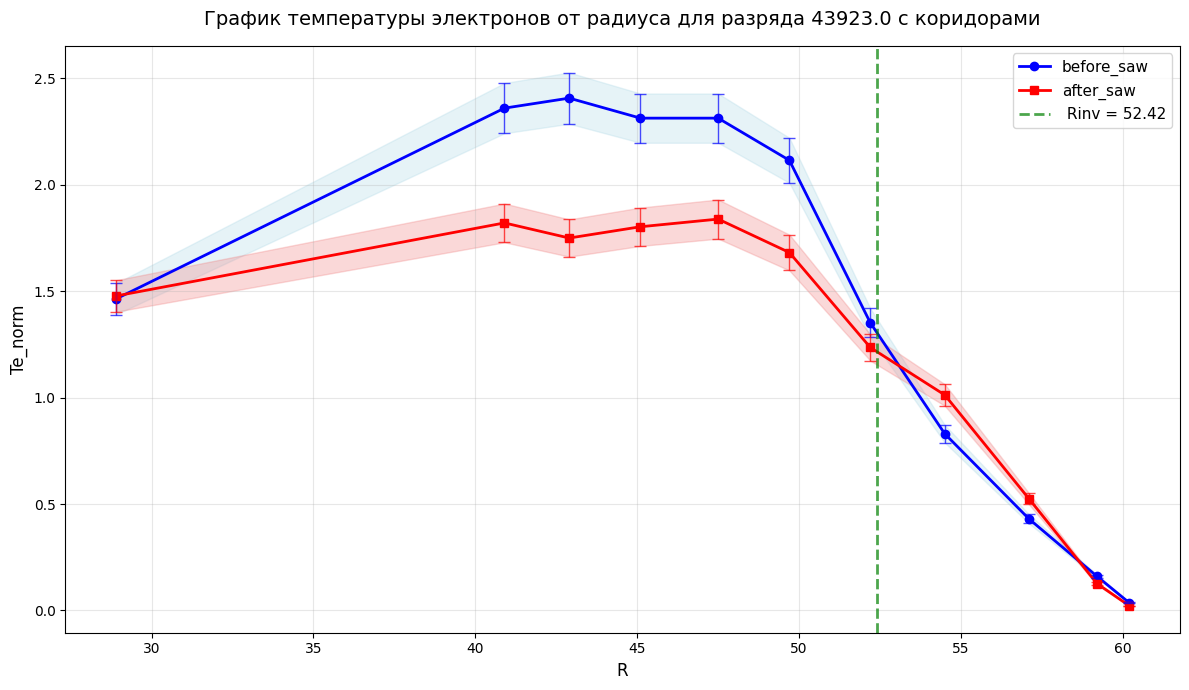

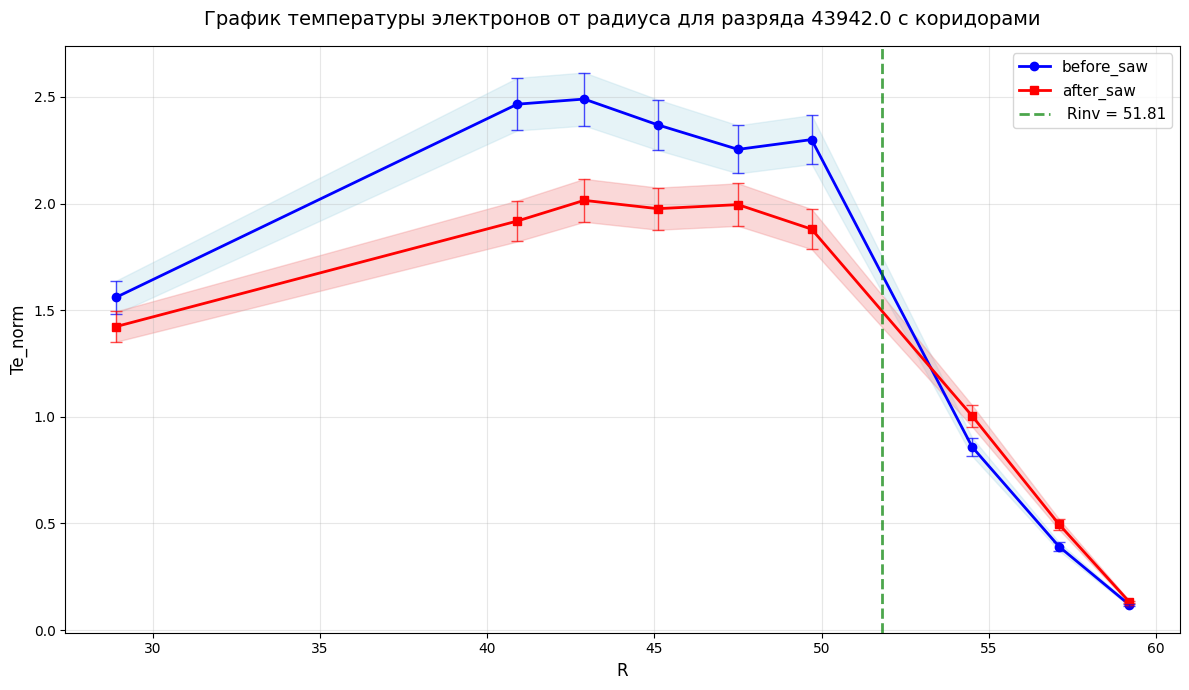

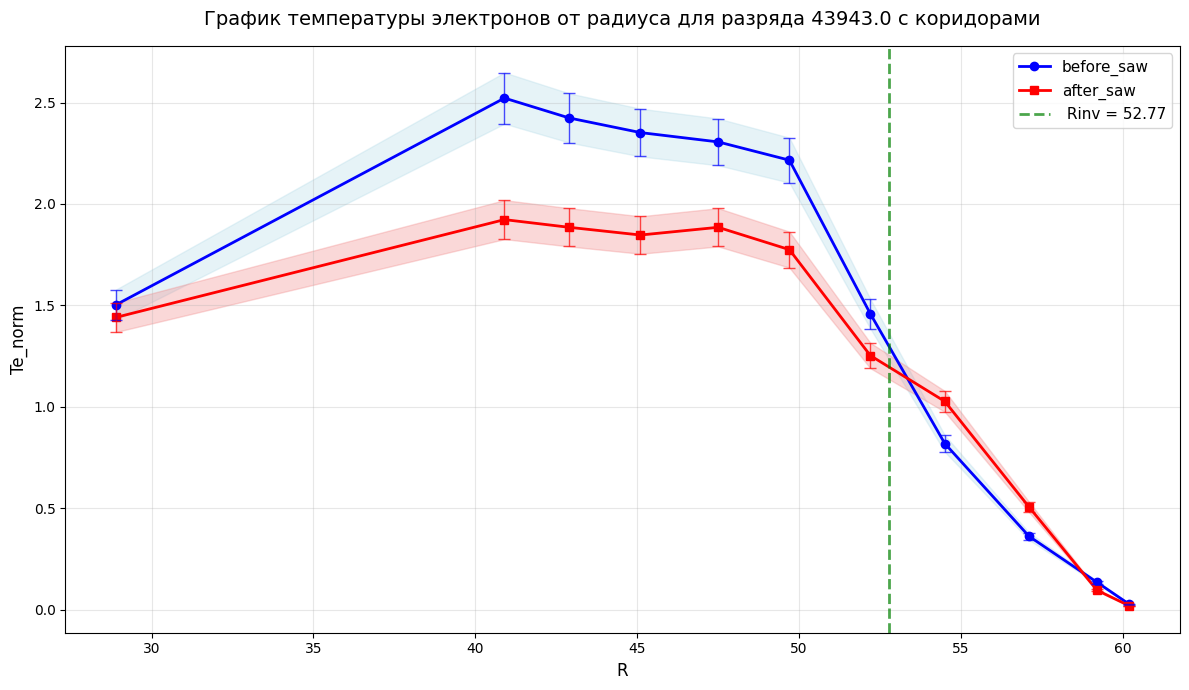

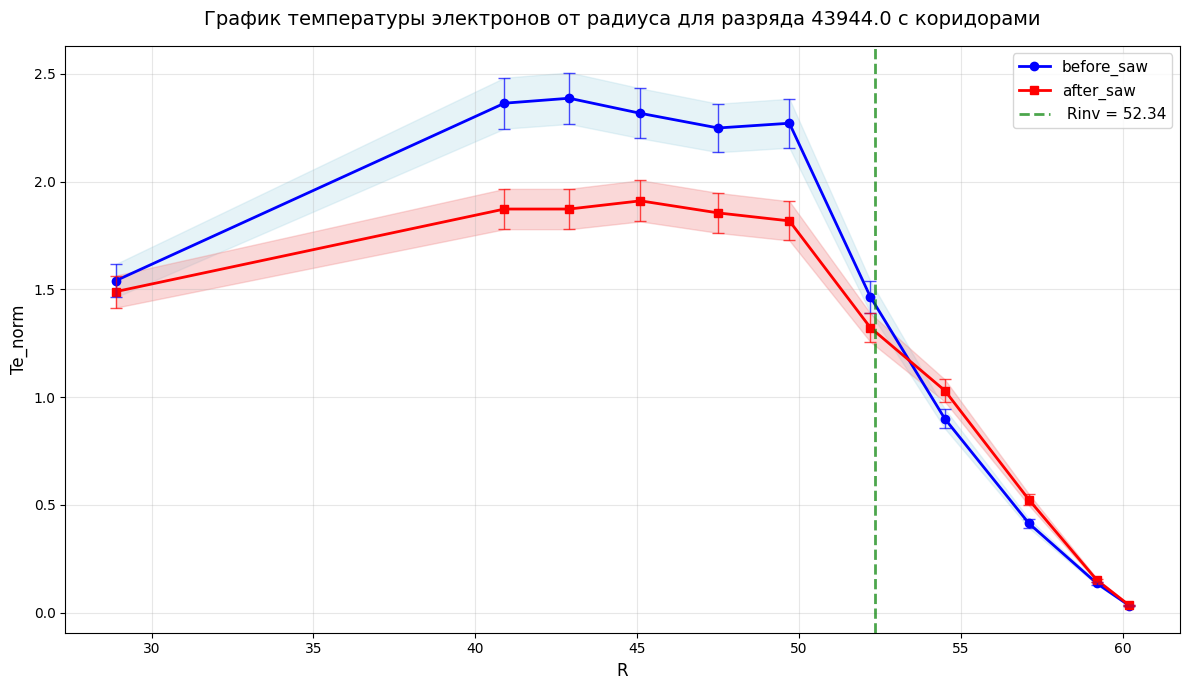

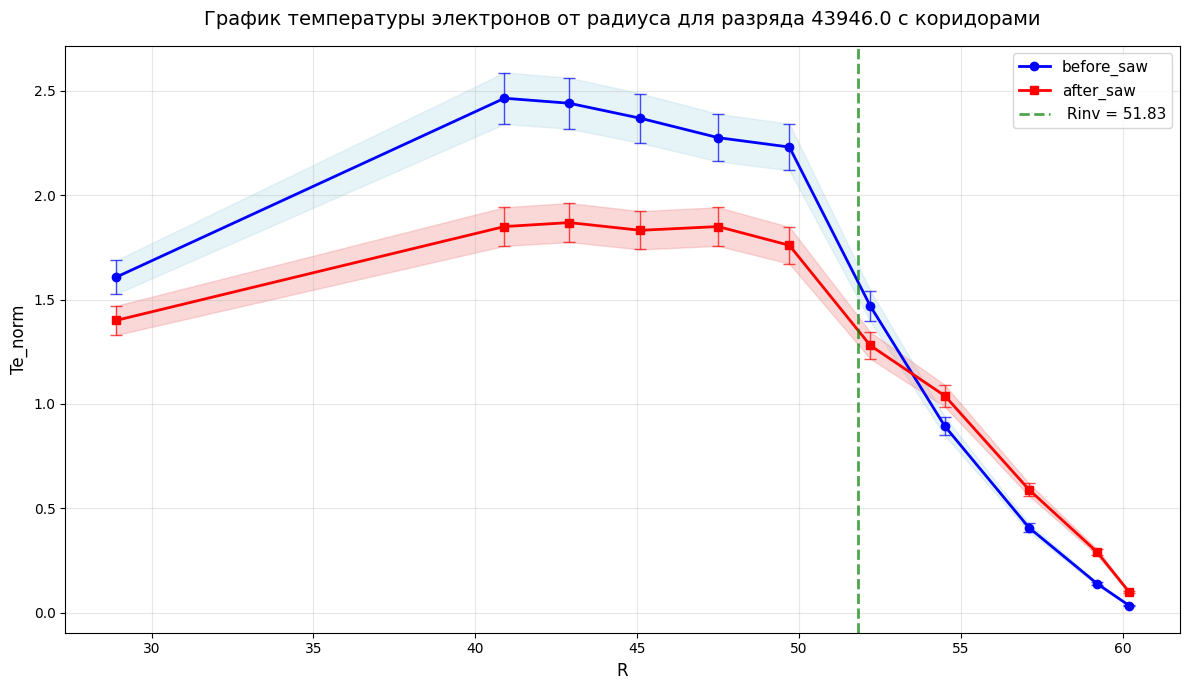

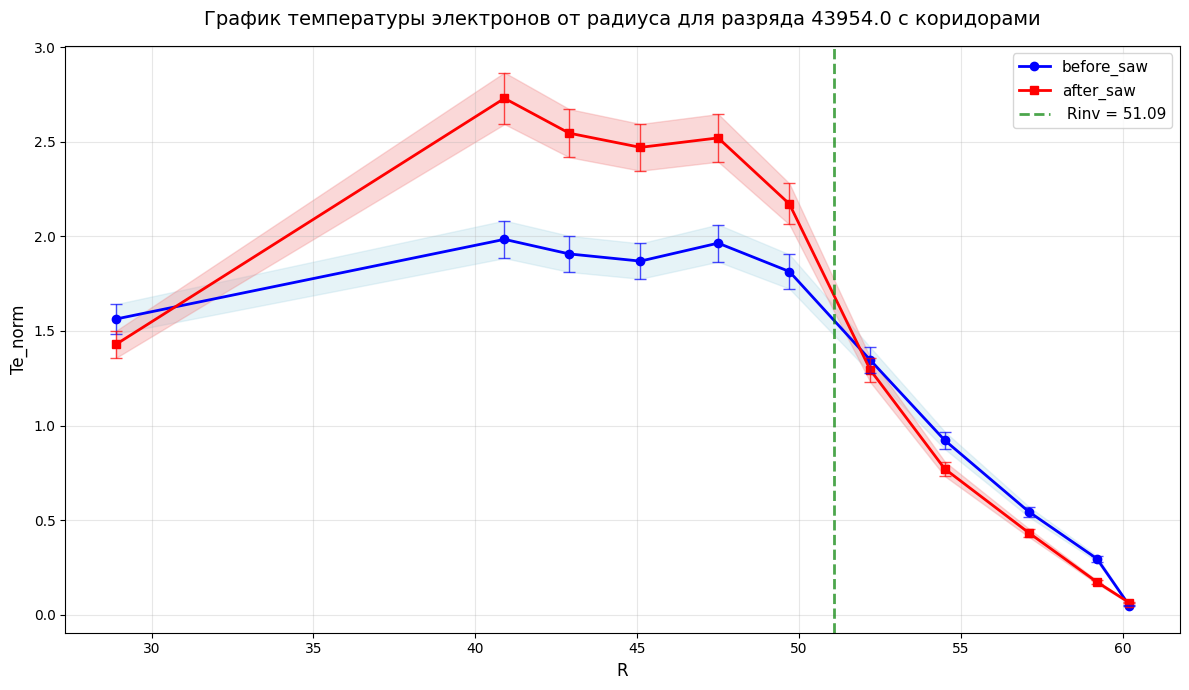

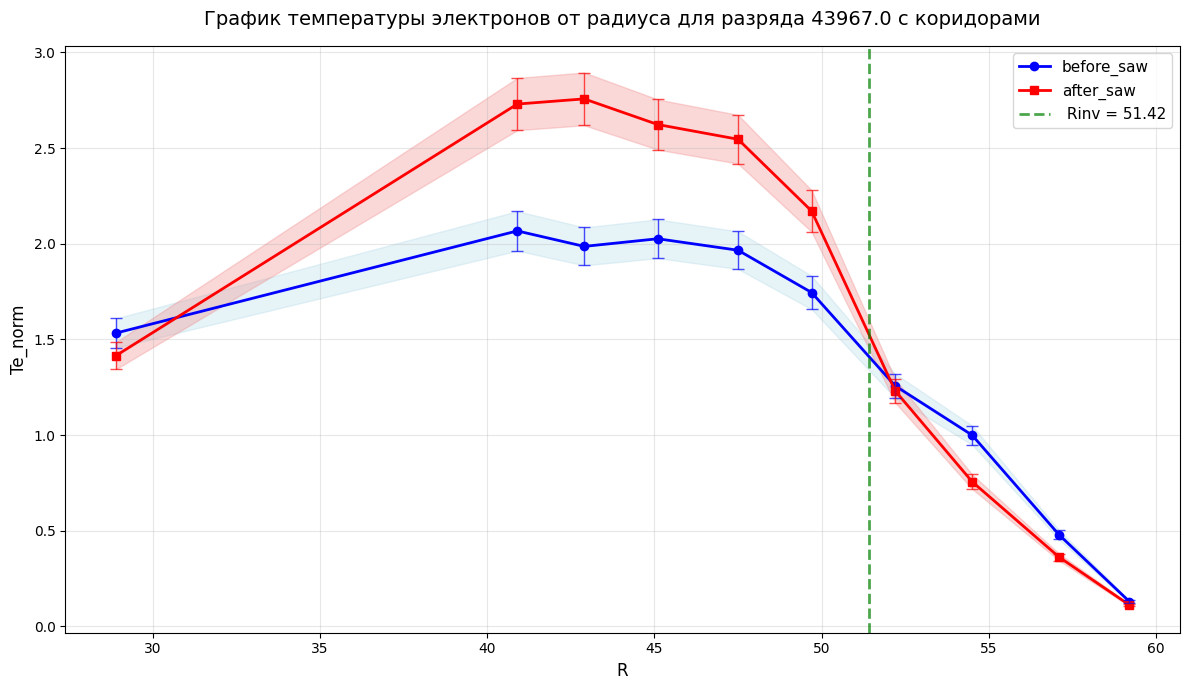

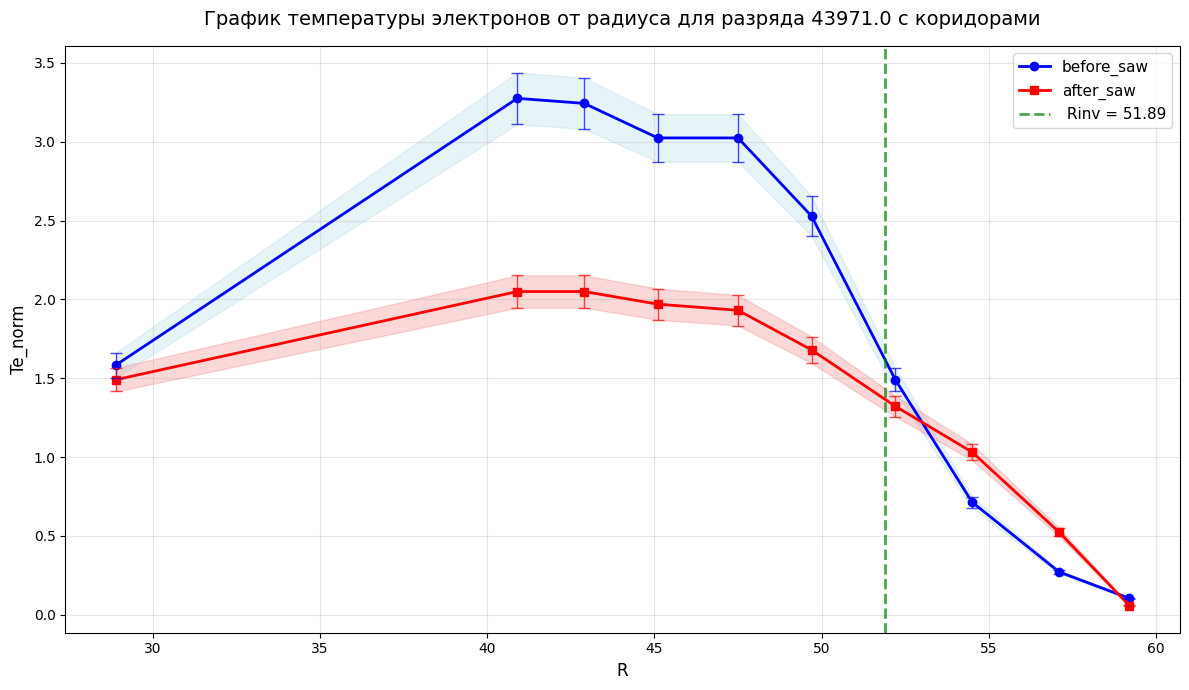

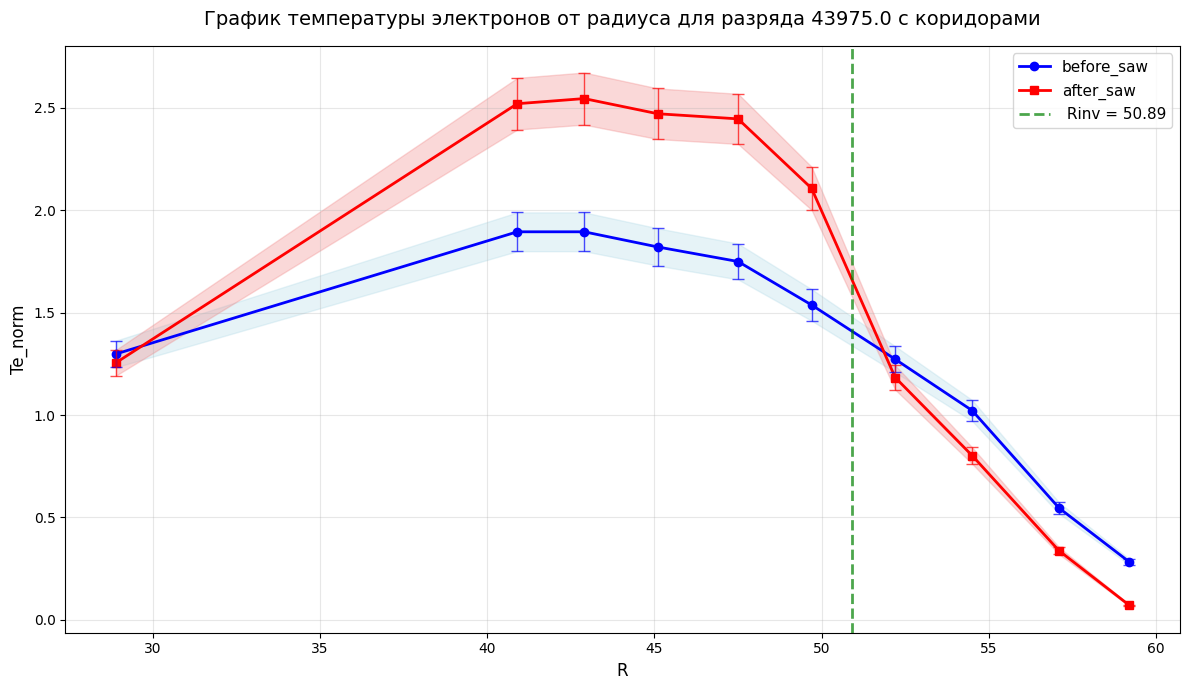

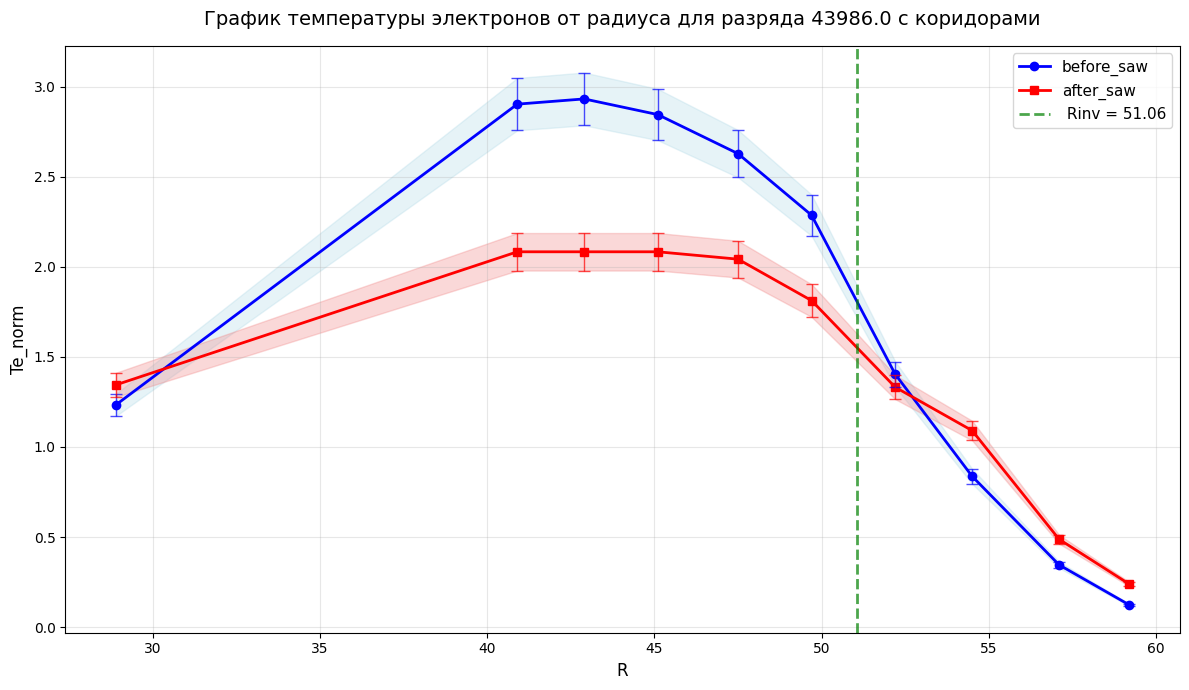

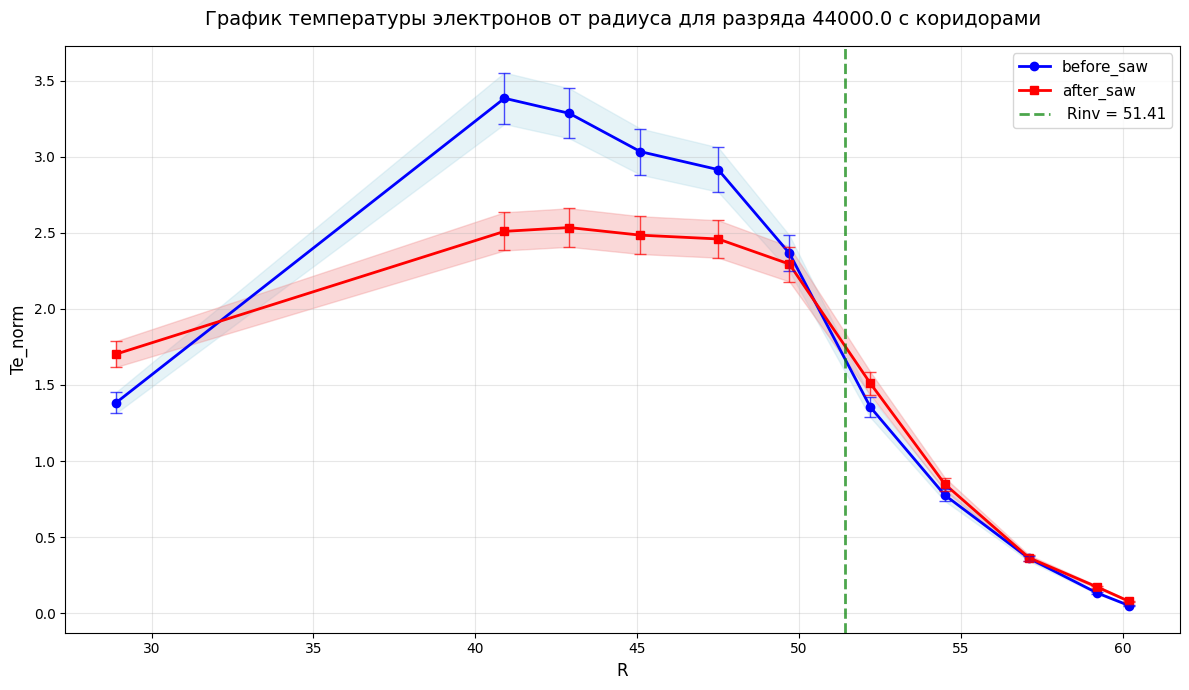

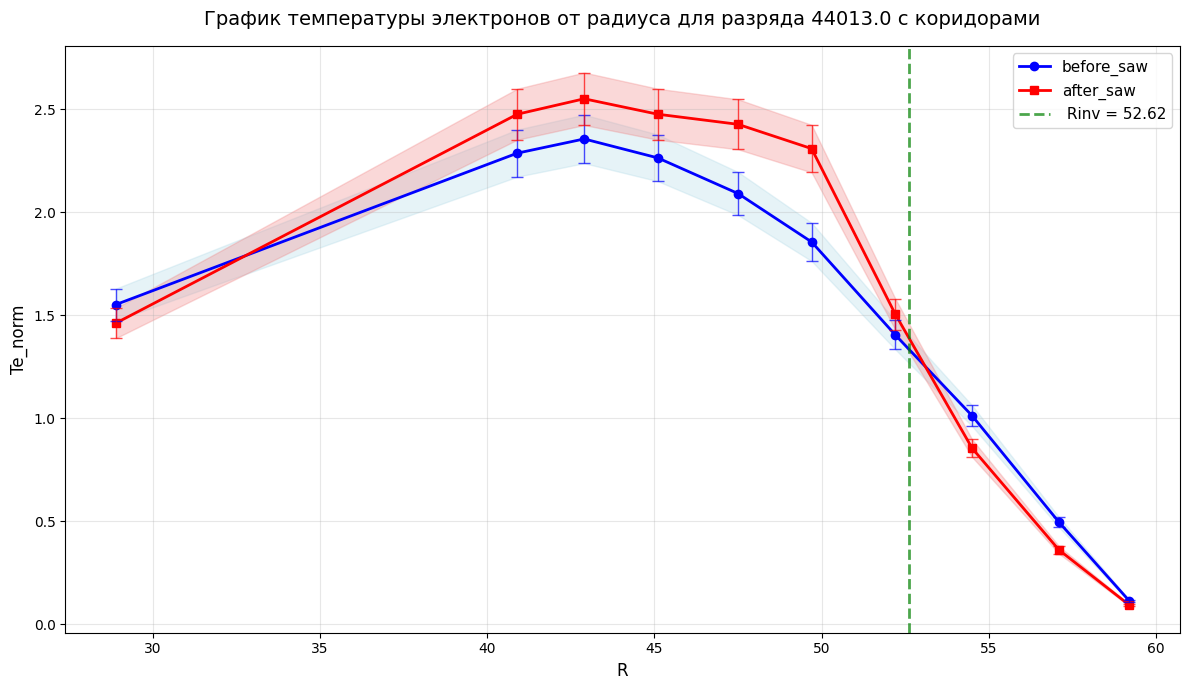

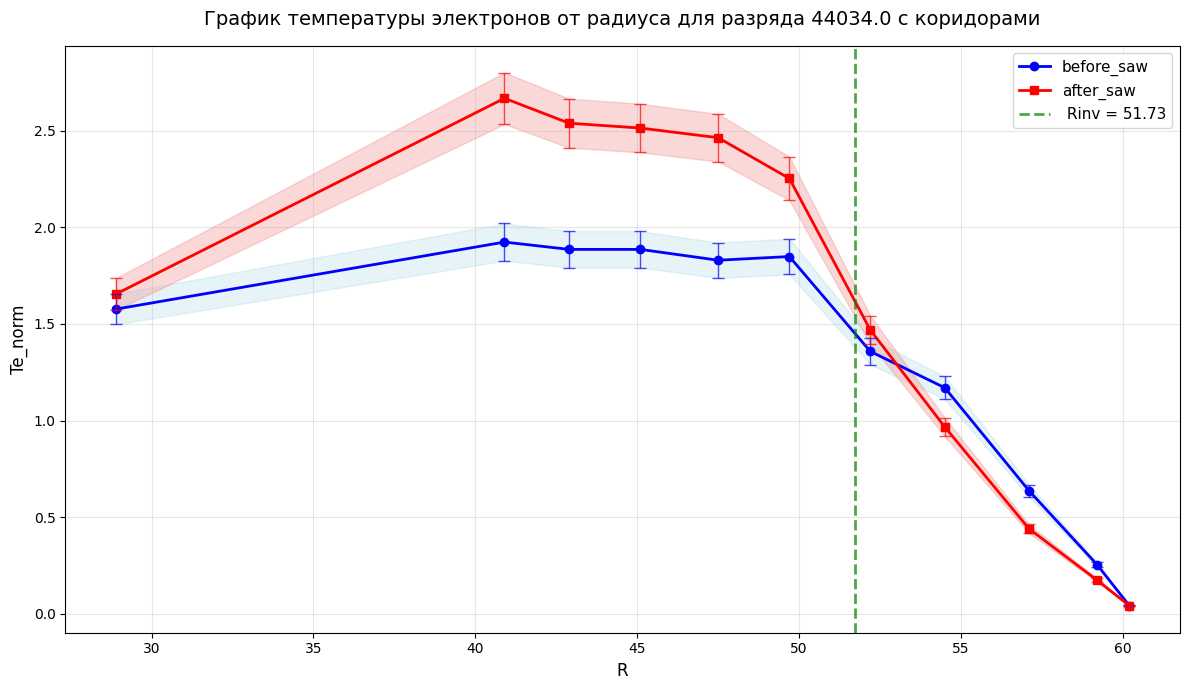

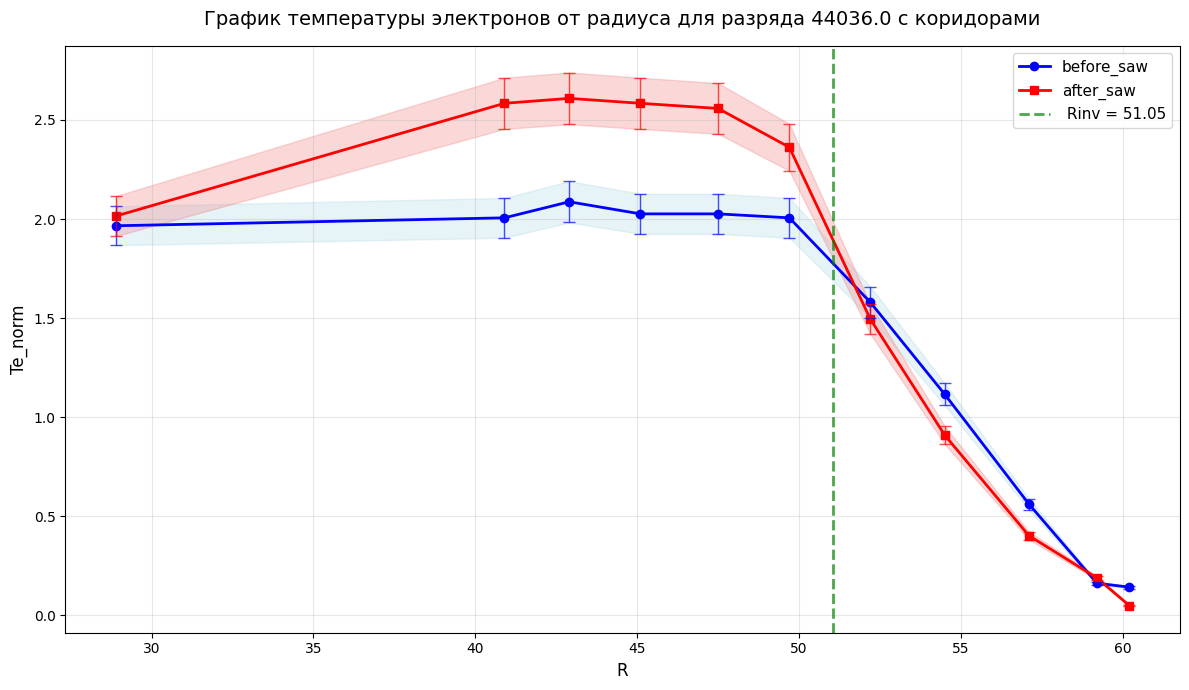

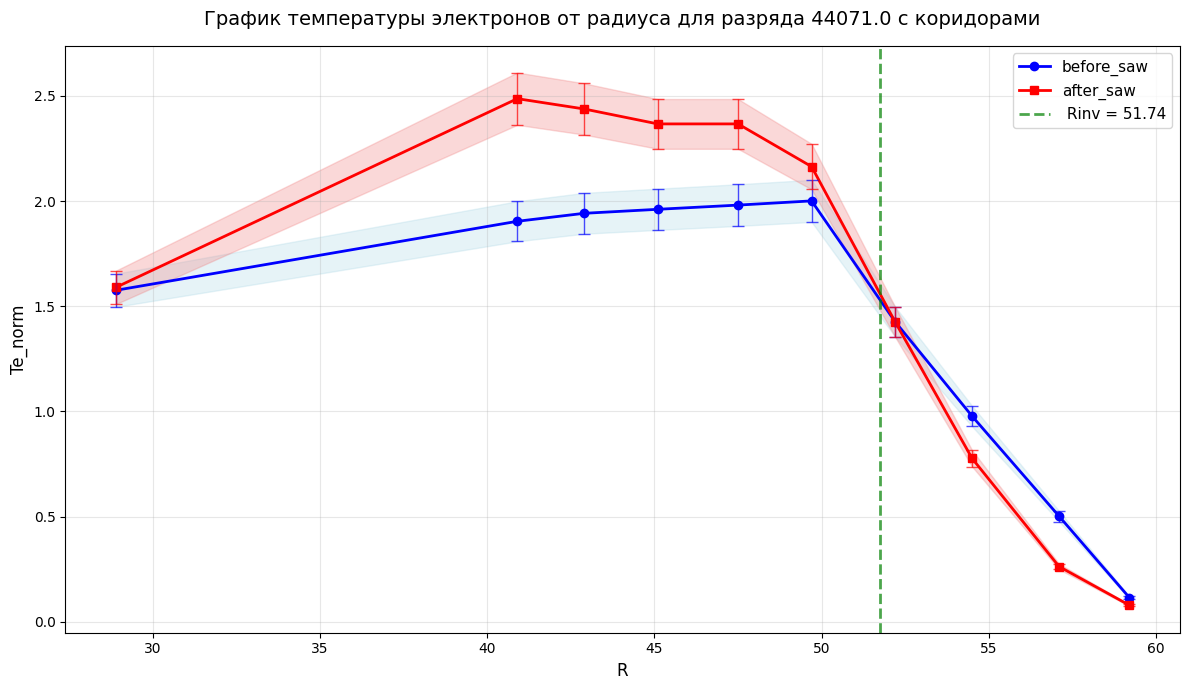

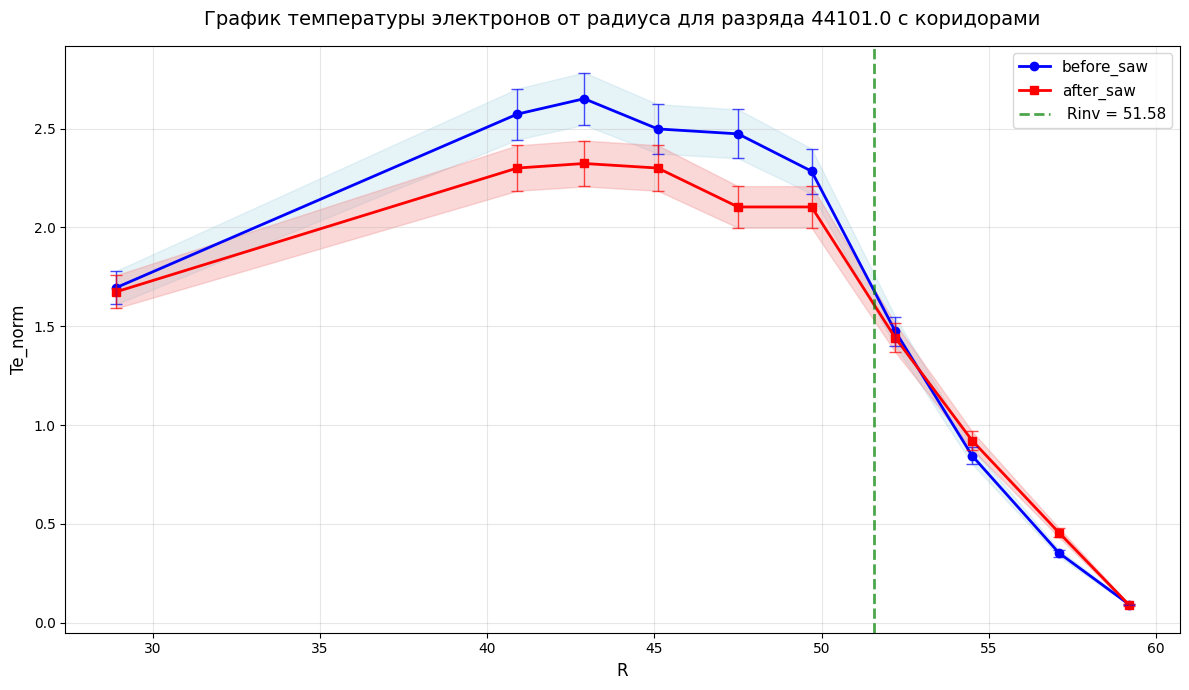

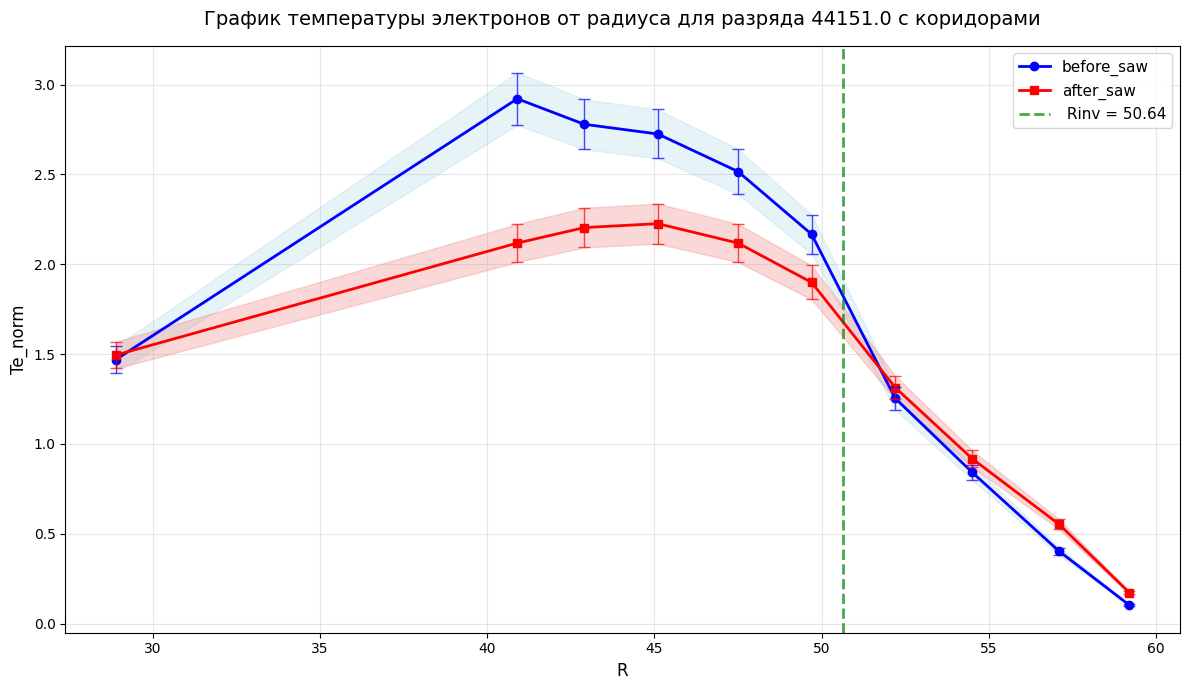

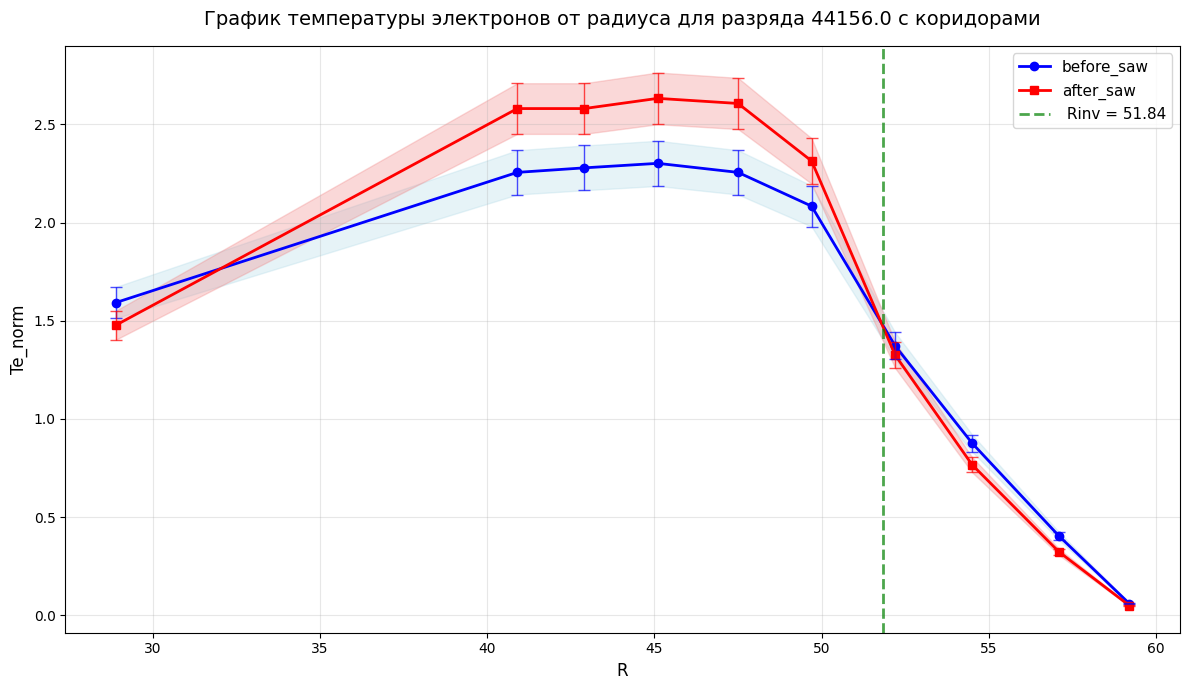

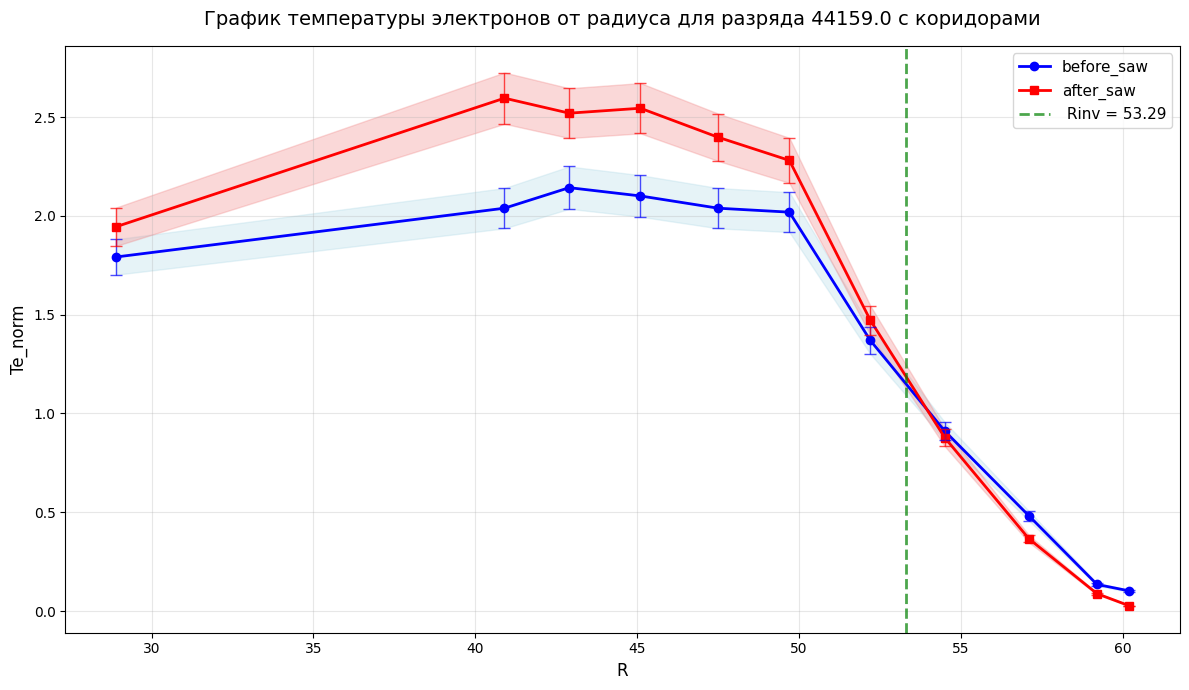

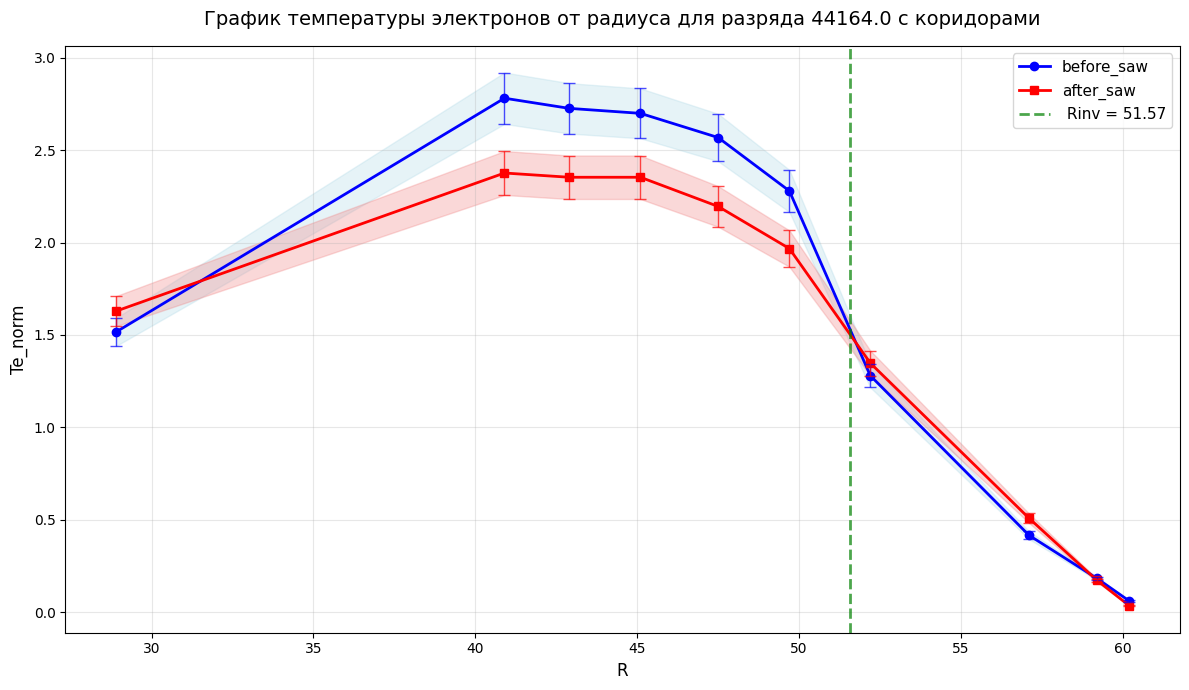

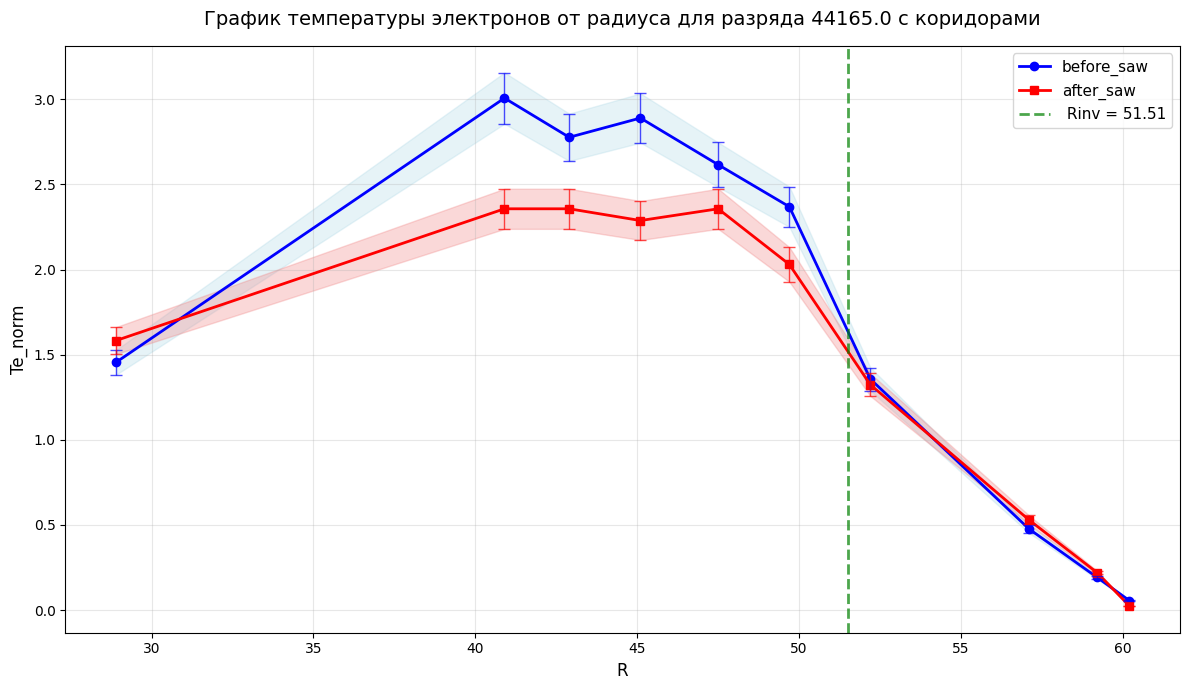

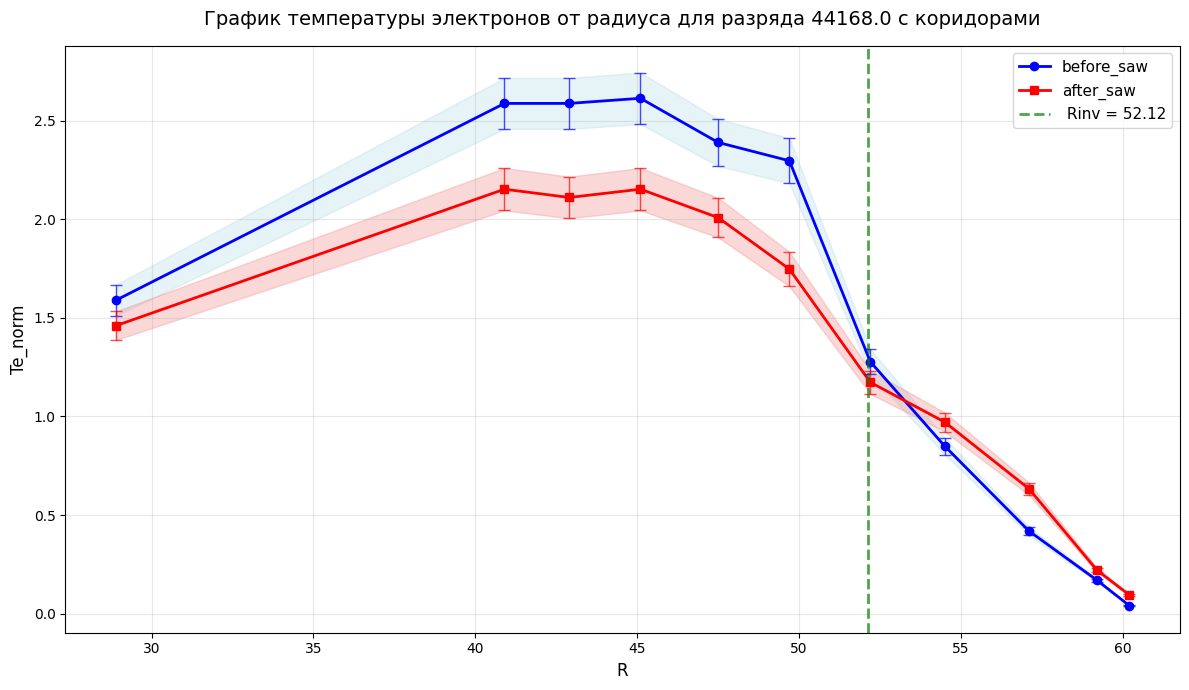

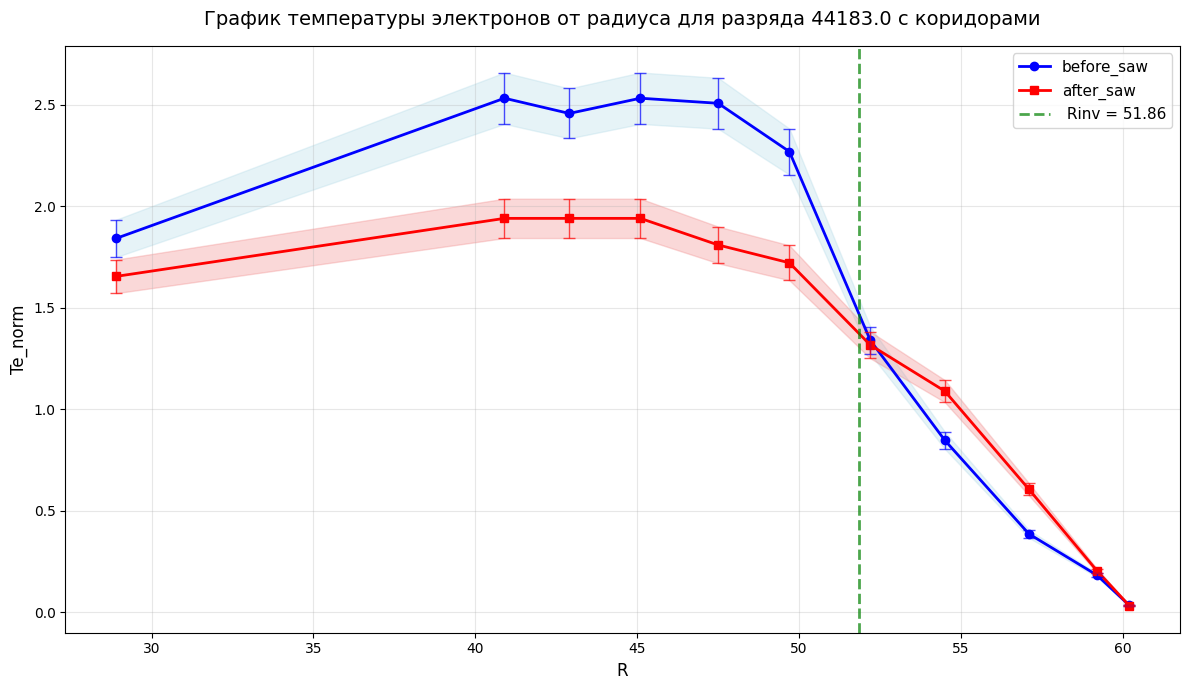

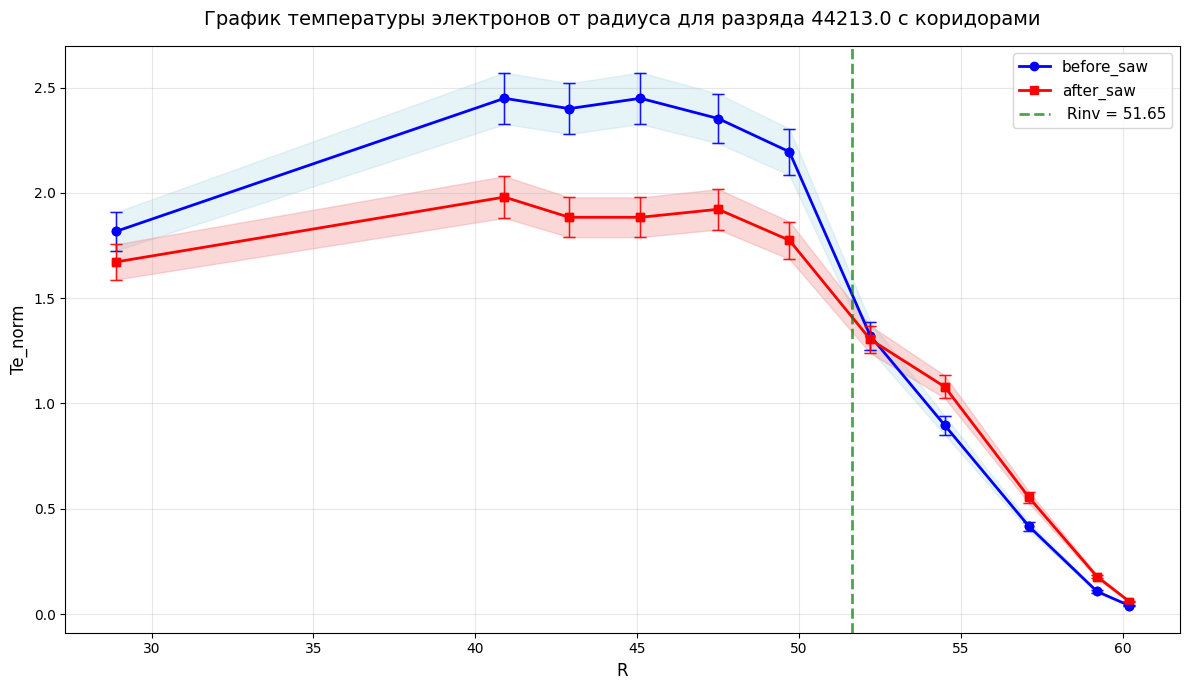

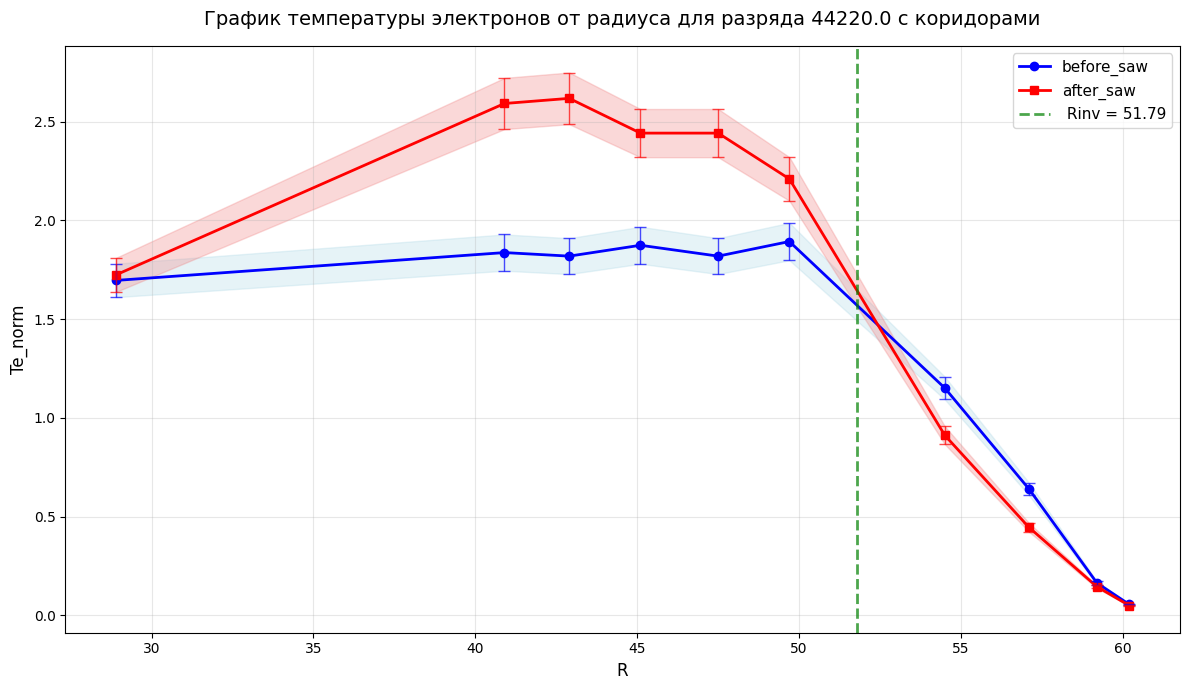

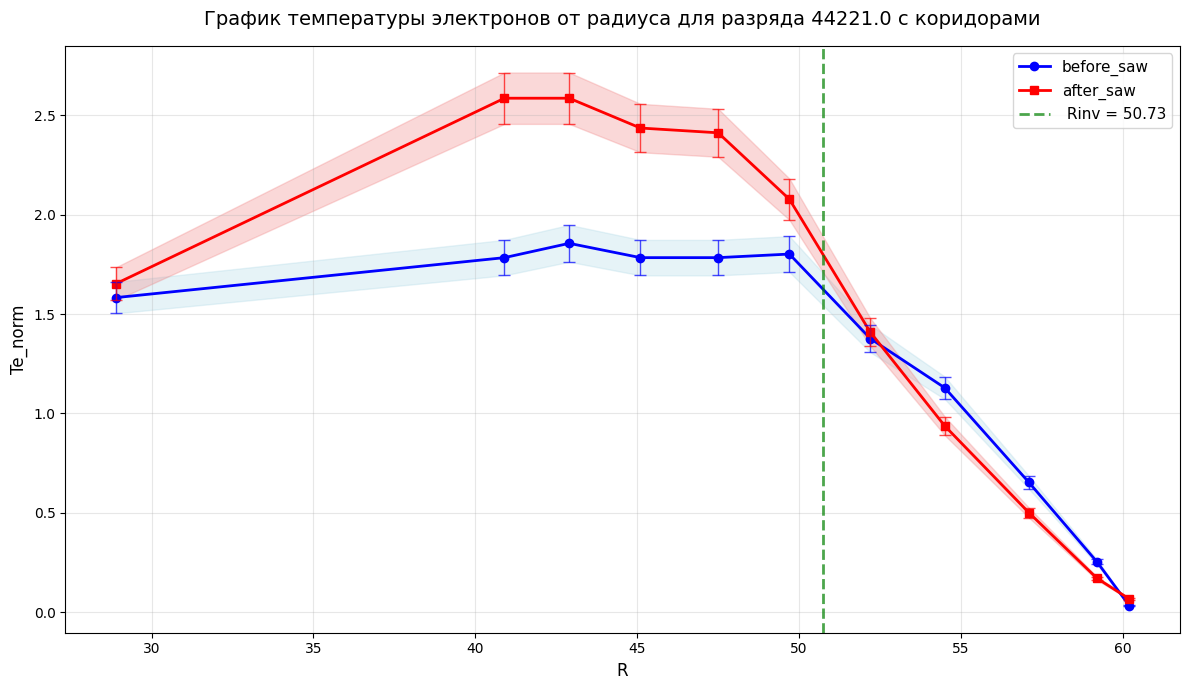

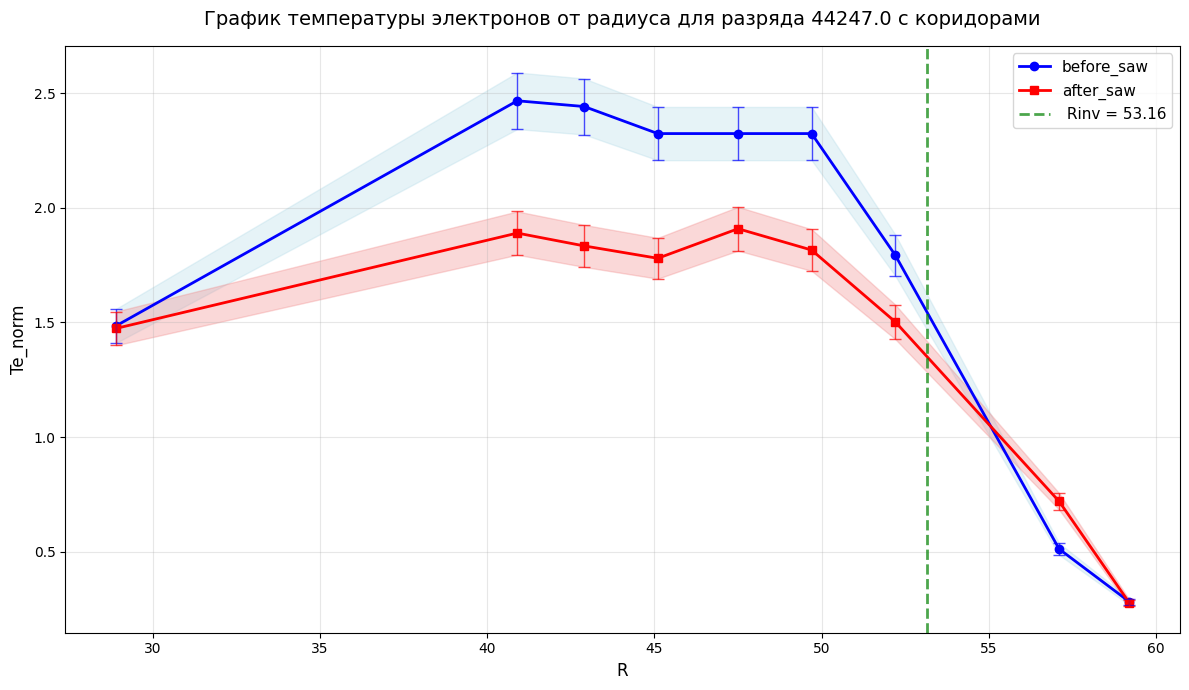

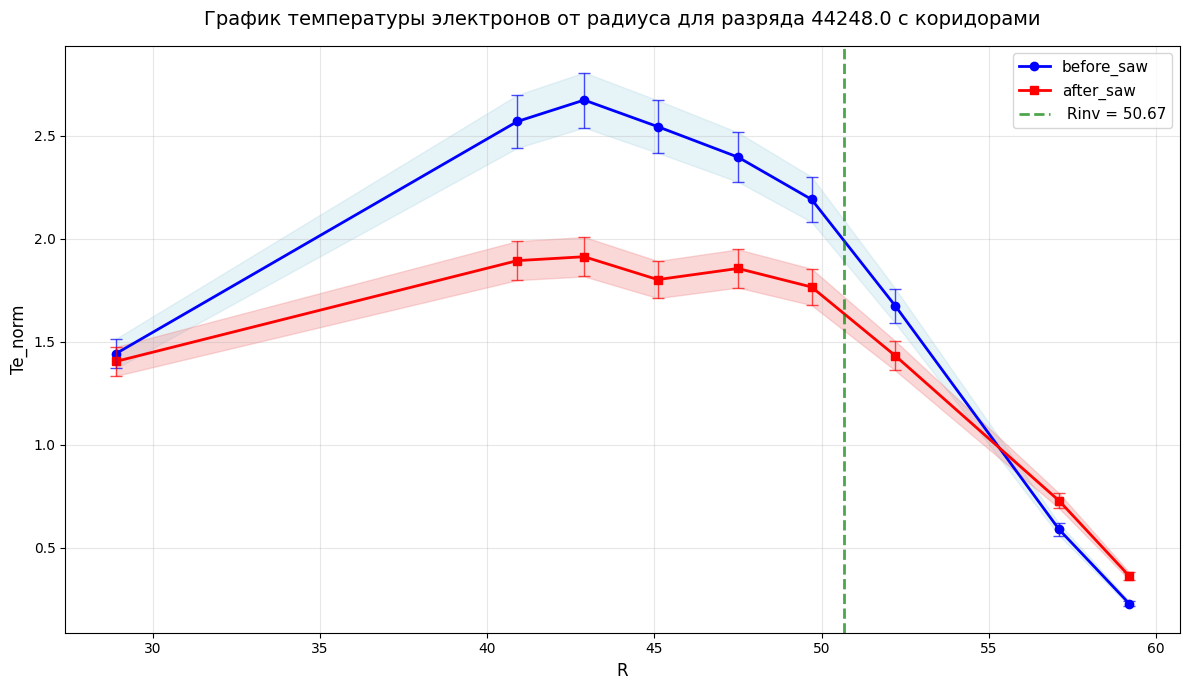

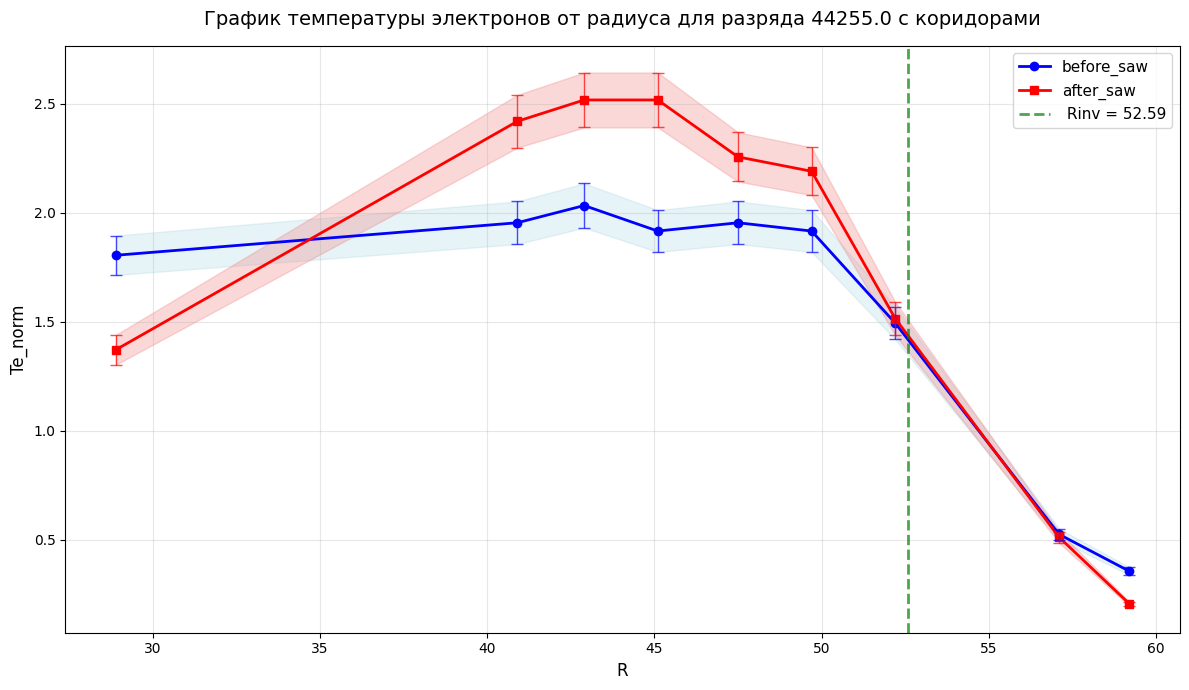

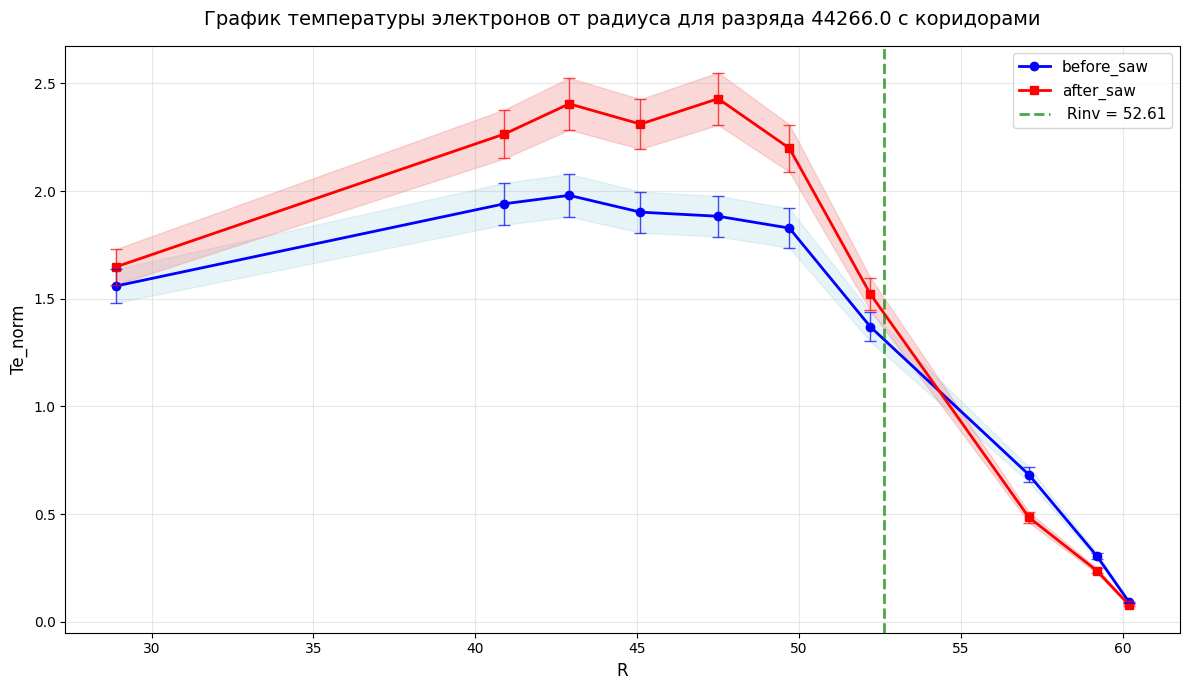

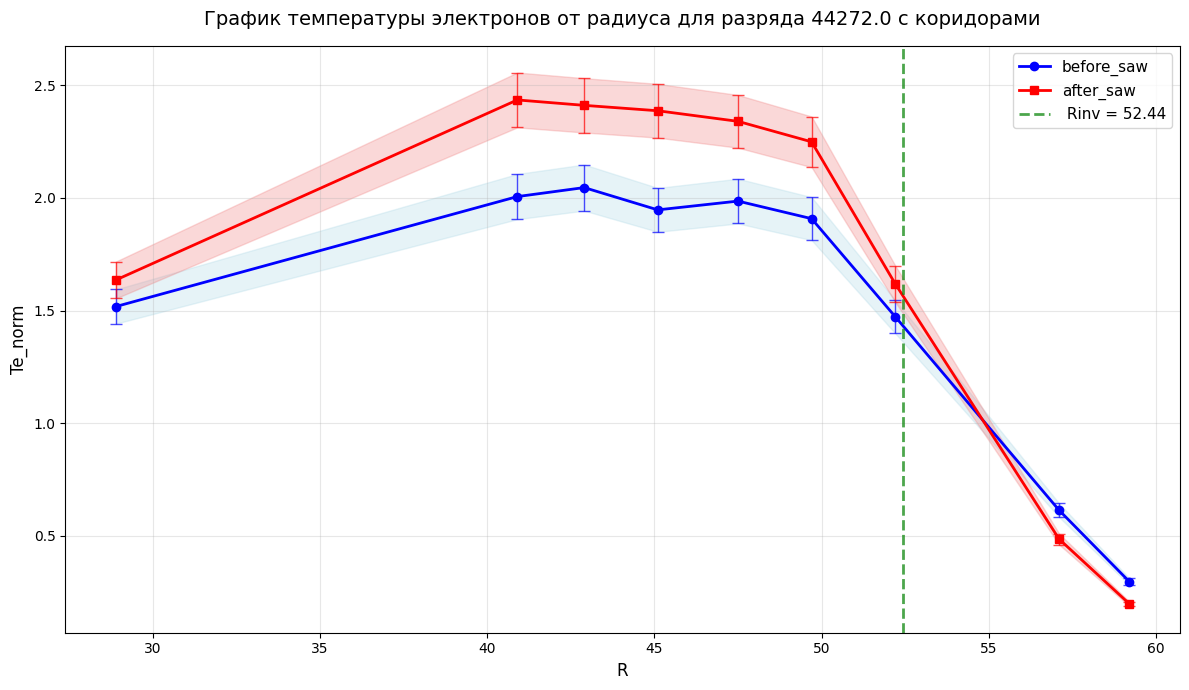

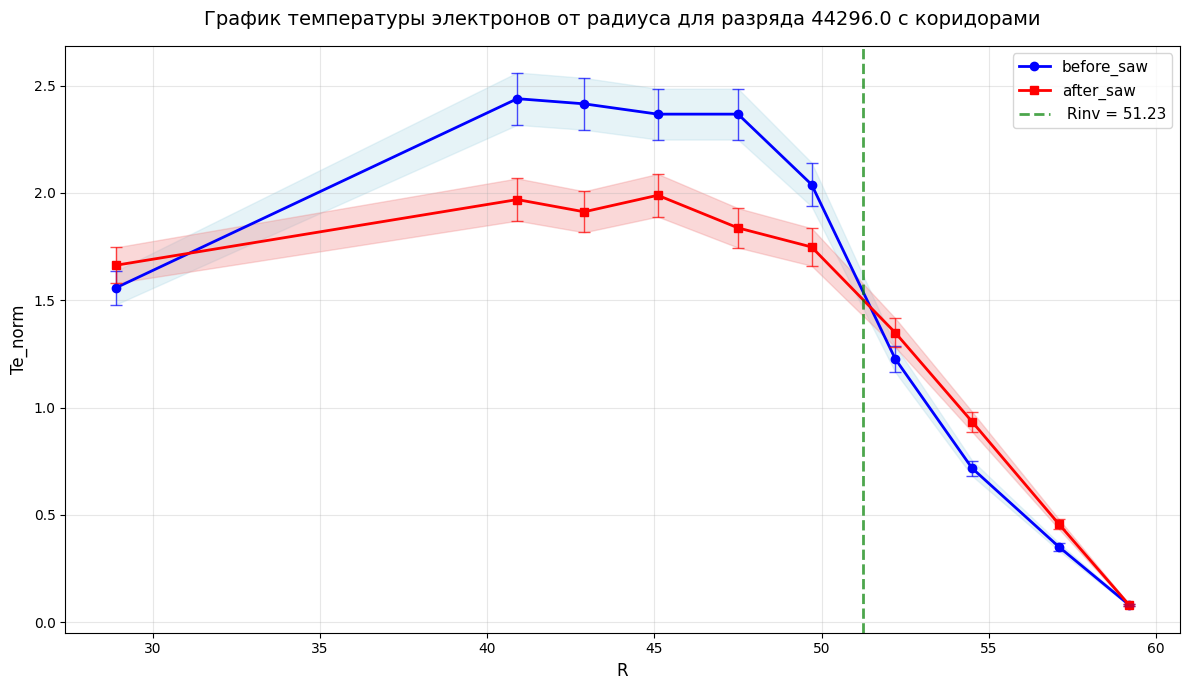

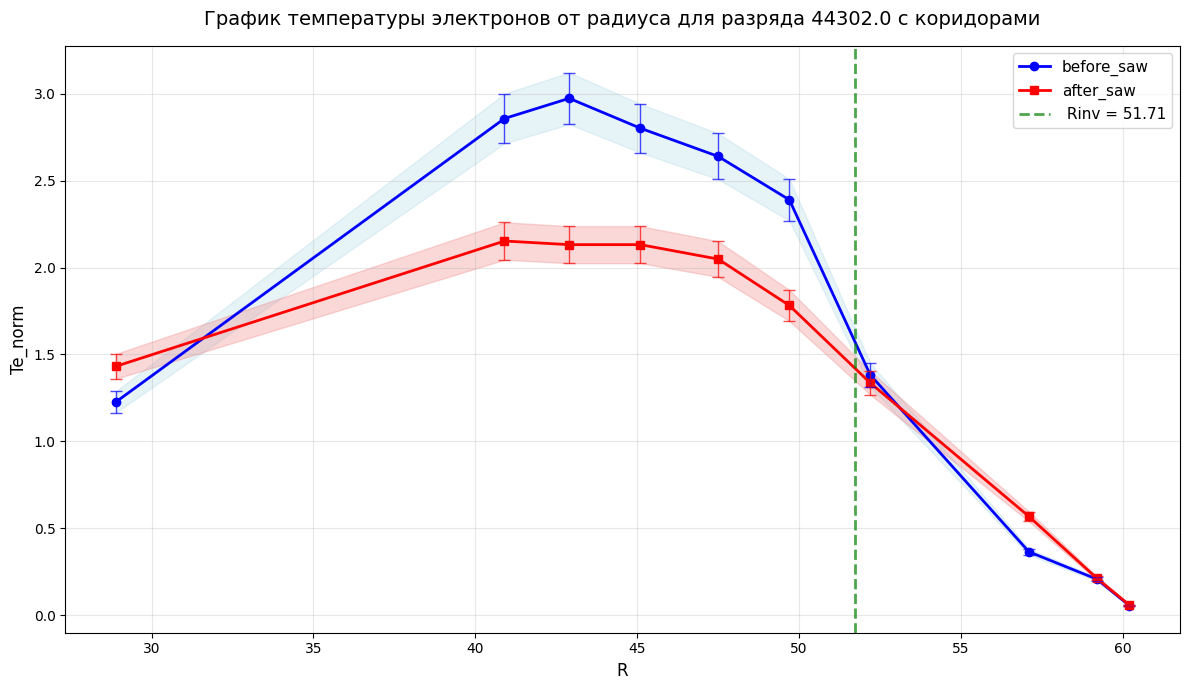

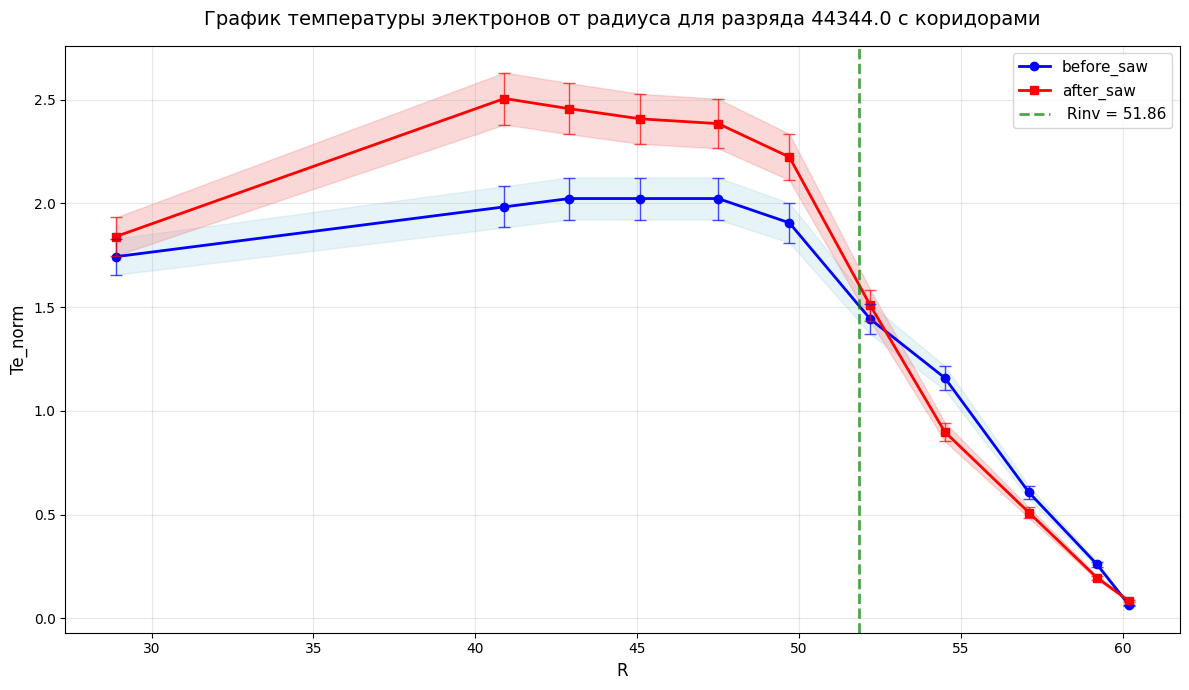

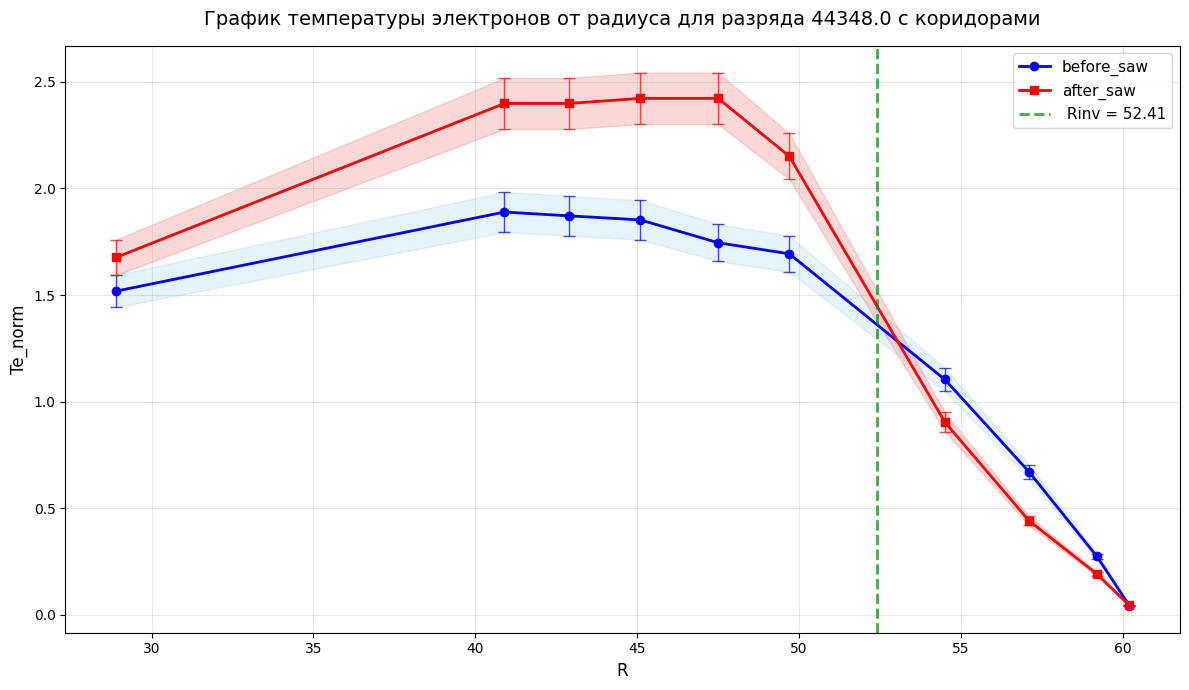

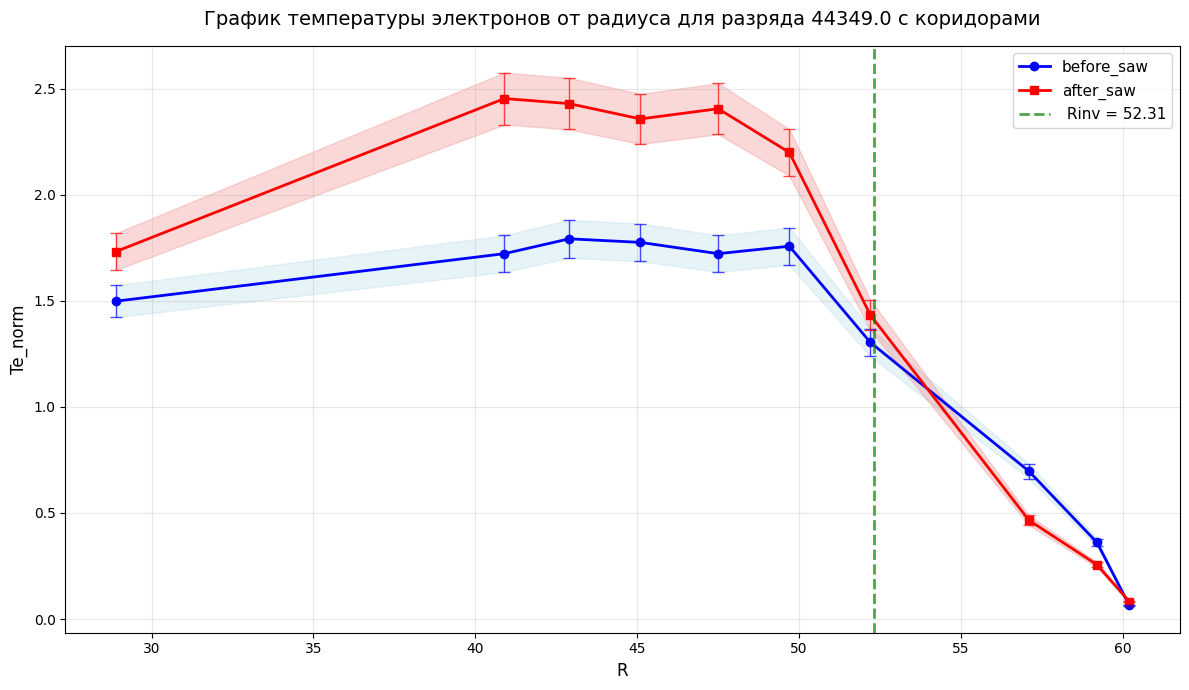

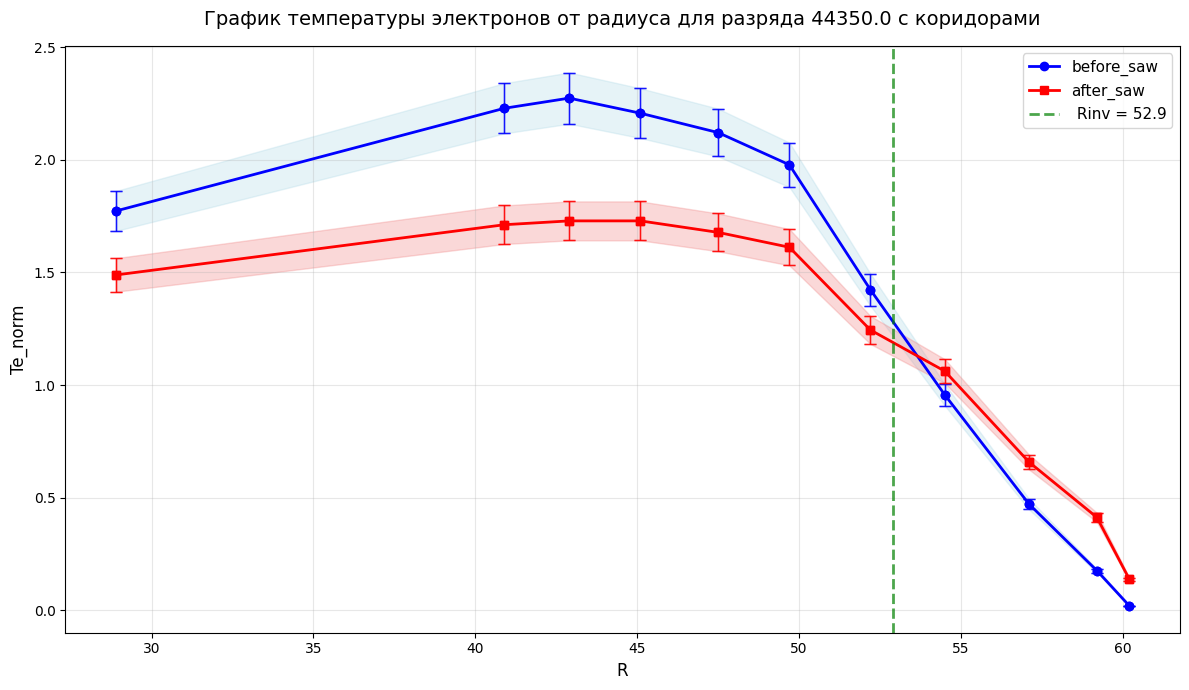

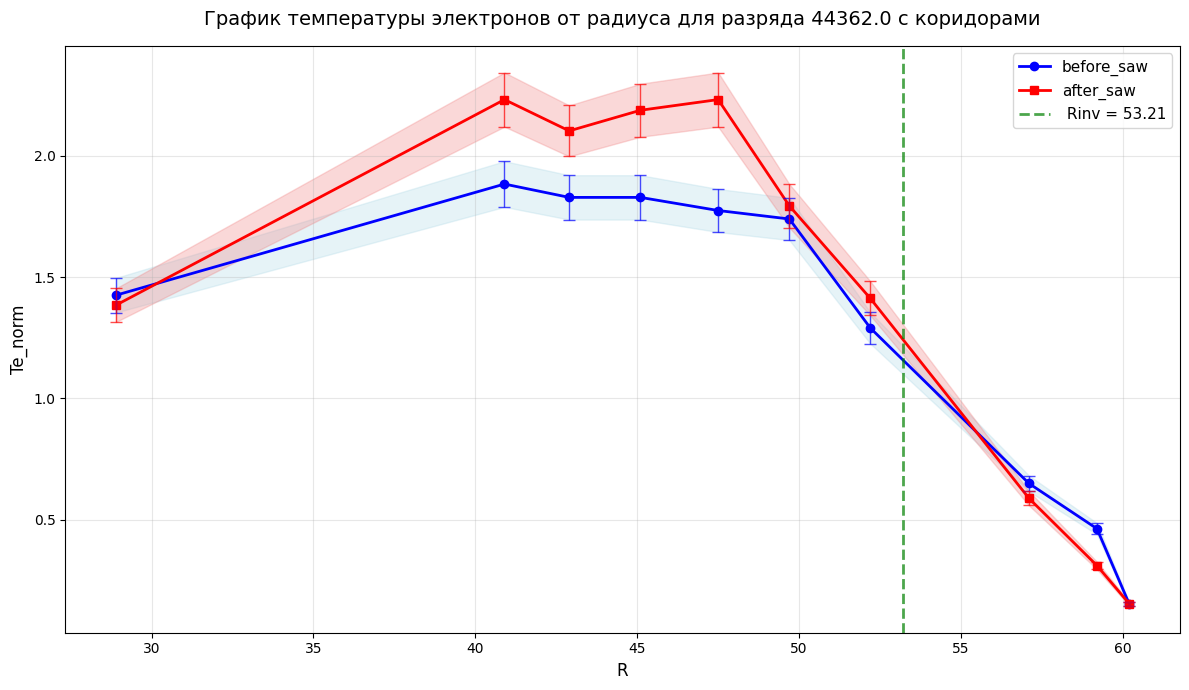

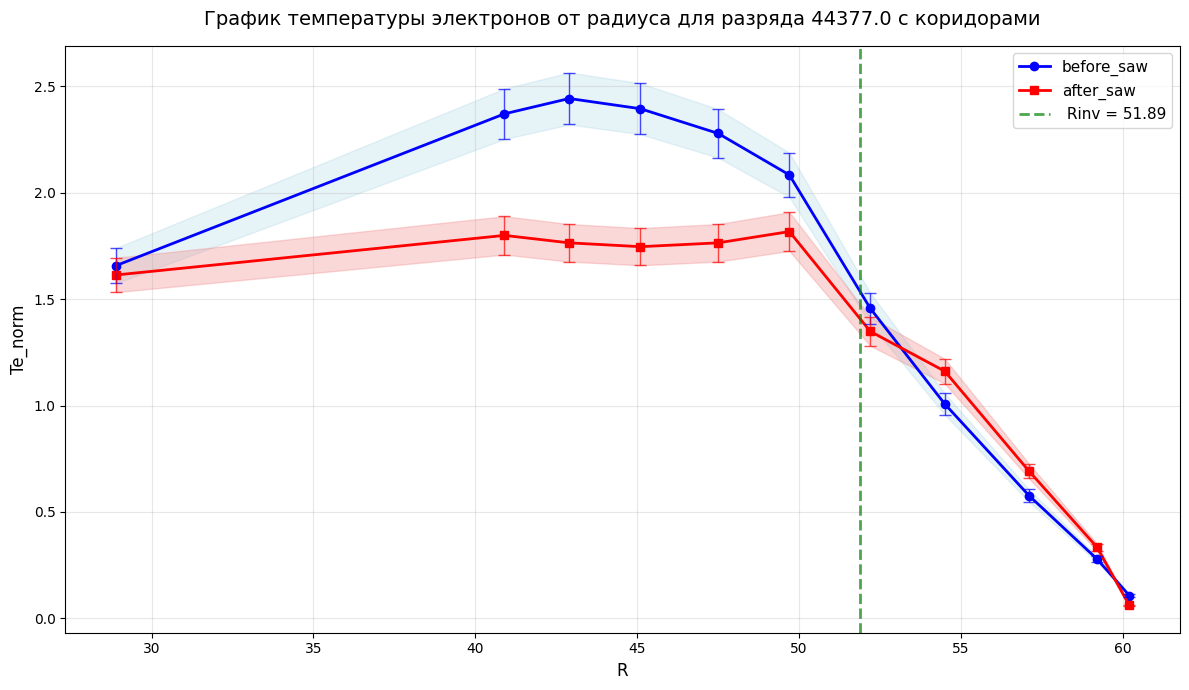

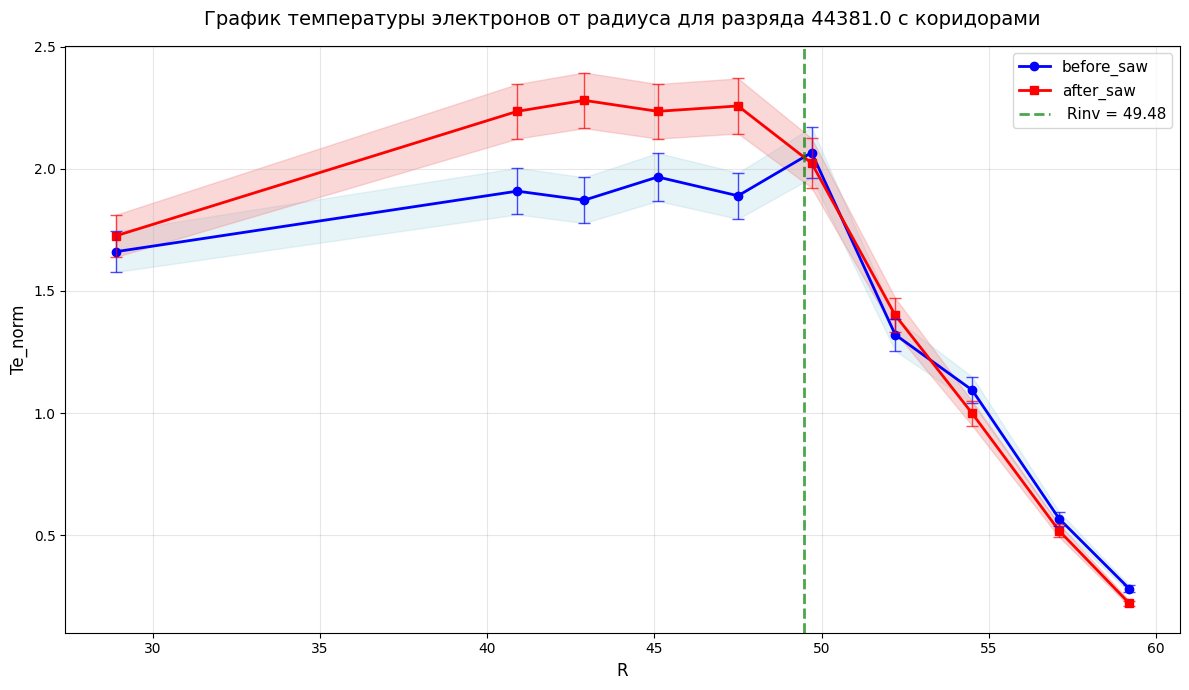

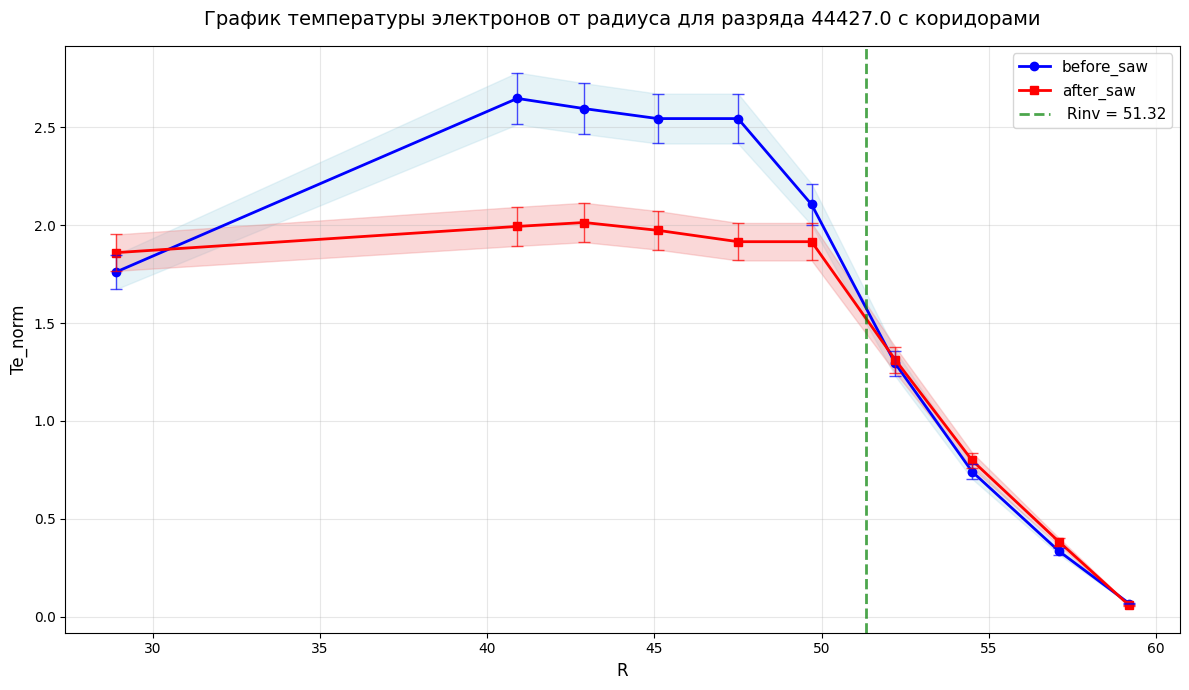

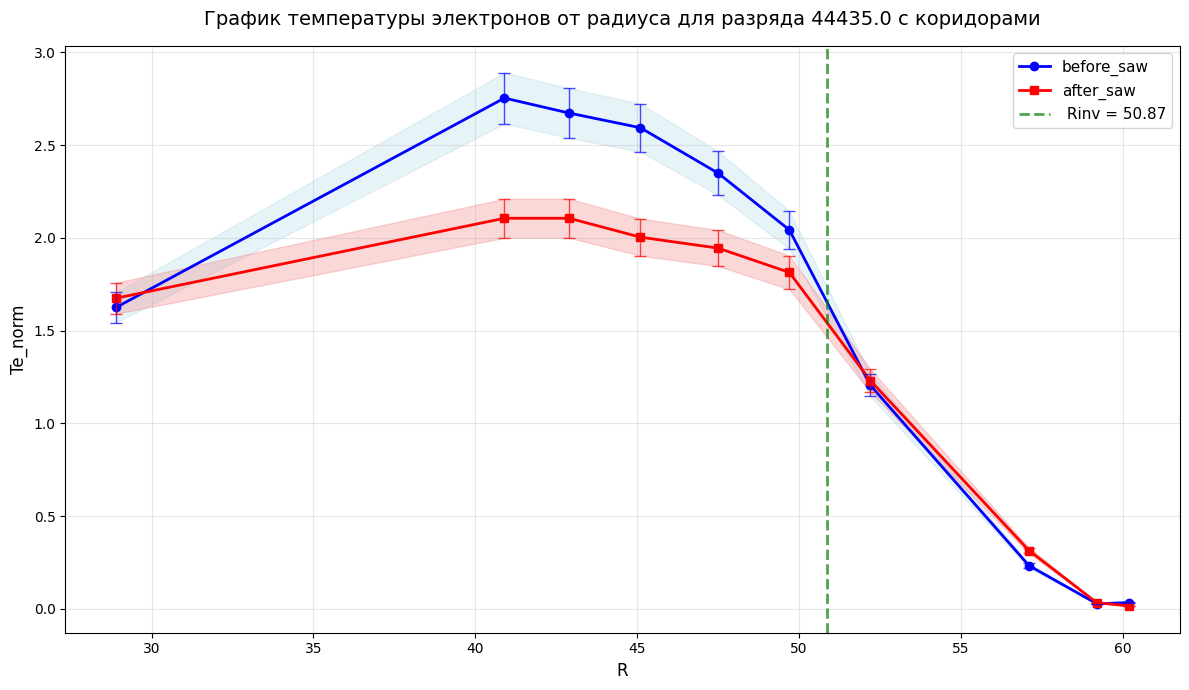

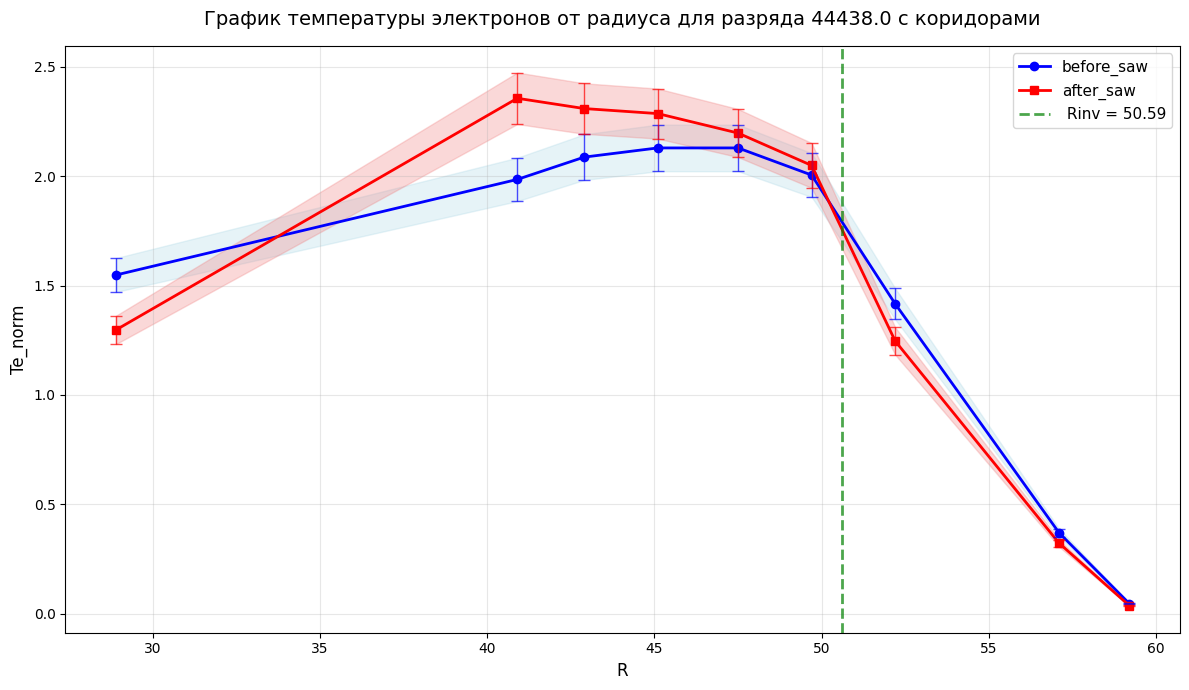

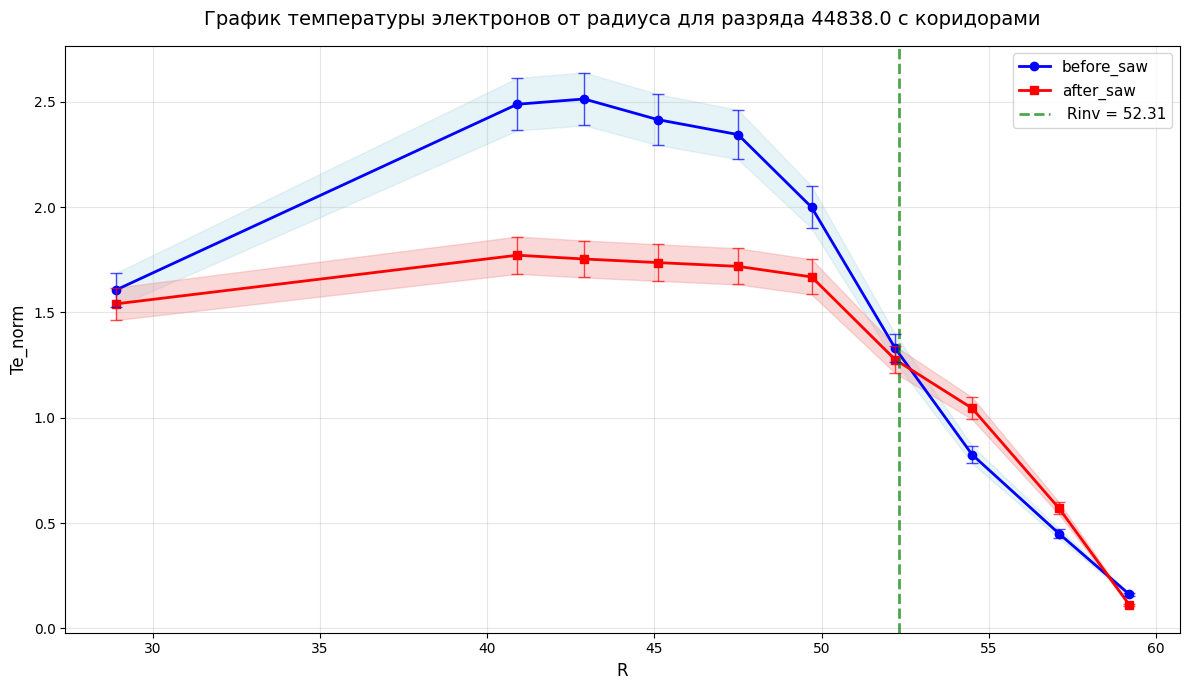

In [85]:
for shotn in df_analis['shotn'].unique():
  df = df_analis[df_analis['shotn'] == shotn]
  df = df.sort_values(by='R')
  Rinv = df.Rinv.values.tolist()[0]
  # Создаем график
  fig, ax = plt.subplots(figsize=(12, 7))
  # Извлекаем данные для первой кривой
  x = df['R'].values
  y1 = df['Te_before'].values
  error1 = y1 * 0.05
  y1_lower = y1 - error1
  y1_upper = y1 + error1
  # Извлекаем данные для второй кривой
  y2 = df['Te_after'].values
  error2 = y2 * 0.05
  y2_lower = y2 - error2
  y2_upper = y2+ error2
  # 1. Закрашенные области для обеих кривых
  ax.fill_between(x, y1_lower, y1_upper, color='lightblue', alpha=0.3)
  ax.fill_between(x, y2_lower, y2_upper, color='lightcoral', alpha=0.3)
  # 2. Линии для обеих кривых
  line1, = ax.plot(x, y1, 'b-', linewidth=2, marker='o', markersize=6, label='before_saw')
  line2, = ax.plot(x, y2, 'r-', linewidth=2, marker='s', markersize=6, label='after_saw')
  ax.axvline(x=Rinv, color='green', linestyle='--', linewidth=2, alpha=0.7, label= f' Rinv = {round(Rinv,2)}')
  # 3. Error bars для обеих кривых
  ax.errorbar(x, y1, yerr=error1, fmt='none', ecolor='blue', elinewidth=1, capsize=4, alpha=0.7)
  ax.errorbar(x, y2, yerr=error2, fmt='none', ecolor='red', elinewidth=1, capsize=4, alpha=0.7)
  # Настройки графика
  ax.set_xlabel('R', fontsize=12)
  ax.set_ylabel('Te_norm', fontsize=12)
  ax.set_title(f'График температуры электронов от радиуса для разряда {shotn} с коридорами', fontsize=14, pad=15)
  ax.grid(True, alpha=0.3)
  # Легенда
  ax.legend(loc='best', fontsize=11)
  plt.tight_layout()
  plt.show()

In [93]:
indices_to_drop = []
for shotn in df_analis['shotn'].unique():
  df = df_analis[df_analis['shotn'] == shotn]
  min_ = min(df.R.unique().tolist())
  max_ = max(df.R.unique().tolist())
  indices_to_drop.extend(df[(df['R'] == min_) | (df['R'] == max_)].index.tolist())
df_analis = df_analis.drop(index=indices_to_drop)

In [95]:
df_analis = df_analis.reset_index(drop=True)

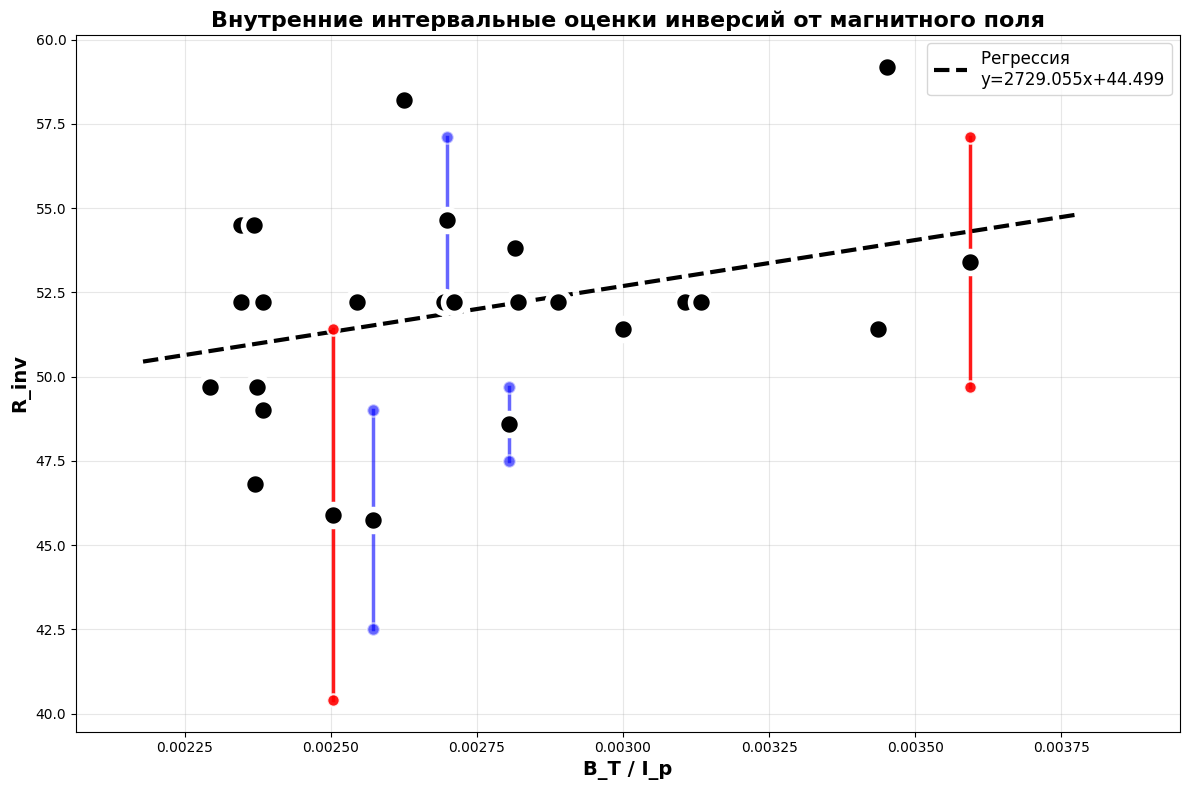

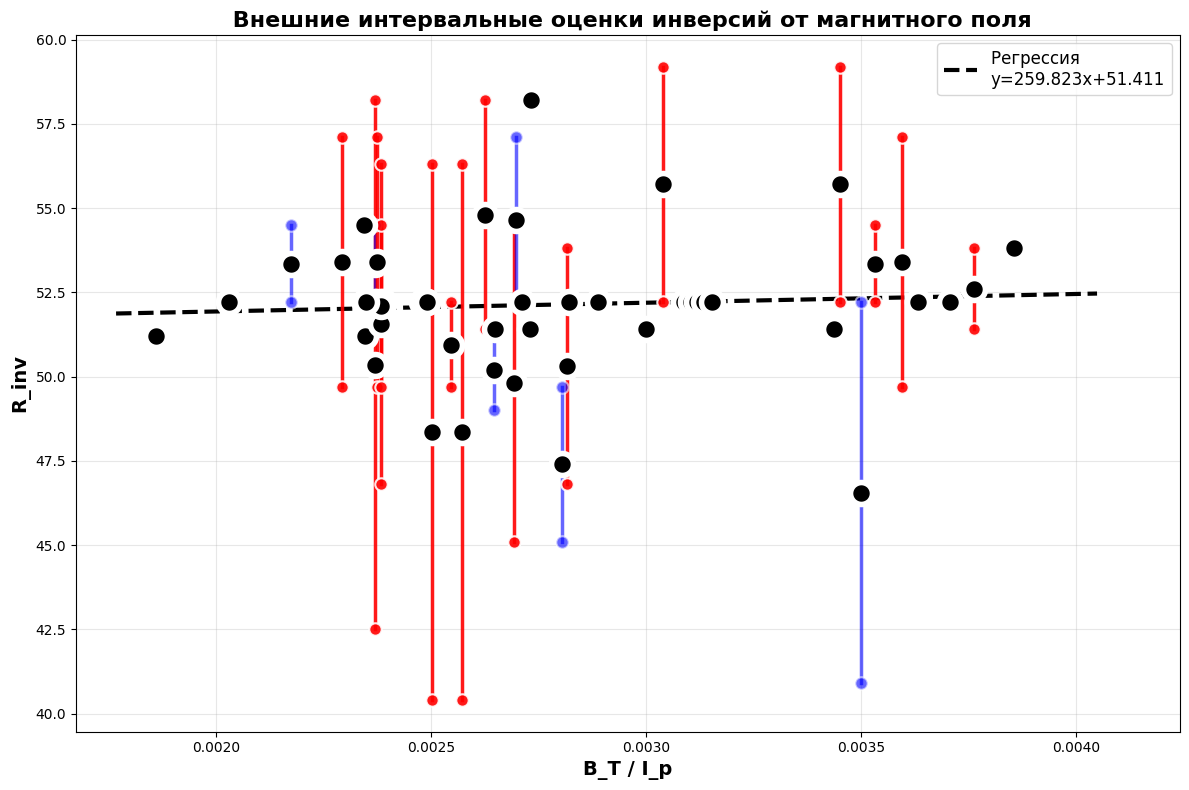

In [140]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'

df_analis = df_analis.rename(columns={'R': 'radius_norm'})
ERROR_TE = 0.05

# ========================================
# 1. РАСЧЕТ ИНТЕРВАЛОВ ЖАККАРА
# ========================================
def jaccard_index(te_pre_lower, te_pre_upper, te_post_lower, te_post_upper):
    inter_low = max(te_pre_lower, te_post_lower)
    inter_high = min(te_pre_upper, te_post_upper)
    if inter_low >= inter_high: return 0.0
    return (inter_high - inter_low) / (max(te_pre_upper, te_post_upper) - min(te_pre_lower, te_post_lower))

def analyze_shot_intervals(shot_data):
    shotn = shot_data['shotn'].iloc[0]
    rinv_true = shot_data['Rinv'].iloc[0]
    te_before_mean = shot_data.groupby('radius_norm')['Te_before'].mean()
    te_after_mean = shot_data.groupby('radius_norm')['Te_after'].mean()
    r_common = sorted(set(te_before_mean.index) & set(te_after_mean.index))
    if len(r_common) < 5: return None

    te_pre_int = te_before_mean.reindex(r_common).interpolate(method='linear')
    te_post_int = te_after_mean.reindex(r_common).interpolate(method='linear')

    te_pre_lower = te_pre_int * (1 - ERROR_TE)
    te_pre_upper = te_pre_int * (1 + ERROR_TE)
    te_post_lower = te_post_int * (1 - ERROR_TE)
    te_post_upper = te_post_int * (1 + ERROR_TE)

    jaccard_values = [jaccard_index(te_pre_lower.iloc[i], te_pre_upper.iloc[i],
                                   te_post_lower.iloc[i], te_post_upper.iloc[i])
                     for i in range(len(r_common))]

    df_jaccard = pd.DataFrame({'r': r_common, 'J_i': jaccard_values})
    r_ext = df_jaccard[df_jaccard['J_i'] > 0]['r']
    r_int = df_jaccard[df_jaccard['J_i'] > 0.5]['r']

    return {
        'shotn': shotn, 'rinv_true': rinv_true,
        'rinv_ext': [r_ext.min(), r_ext.max()] if len(r_ext)>0 else None,
        'rinv_int': [r_int.min(), r_int.max()] if len(r_int)>0 else None
    }

# ОСНОВНОЙ РАСЧЕТ
results = []
for shotn, shot_group in df_analis.groupby('shotn'):
    if shot_group['Rinv'].isna().all(): continue
    analysis = analyze_shot_intervals(shot_group)
    if analysis and analysis['rinv_ext']:
        bt_before = np.abs(shot_group['B_t_before'].replace([np.inf, -np.inf], np.nan).dropna())
        ip_before = np.abs(shot_group['I_p_before'].replace([np.inf, -np.inf], np.nan).dropna())
        bt_after = np.abs(shot_group['B_t_after'].replace([np.inf, -np.inf], np.nan).dropna())
        ip_after = np.abs(shot_group['I_p_after'].replace([np.inf, -np.inf], np.nan).dropna())

        bt_ip_before = bt_before.mean() / ip_before.mean() if len(bt_before)>0 and len(ip_before)>0 else np.nan
        bt_ip_after = bt_after.mean() / ip_after.mean() if len(bt_after)>0 and len(ip_after)>0 else np.nan
        bt_ip_mean = np.nanmean([bt_ip_before, bt_ip_after])

        results.append({
            'shotn': analysis['shotn'], 'Rinv_true': analysis['rinv_true'],
            'BT_over_Ip': bt_ip_mean,
            'rinv_ext_min': analysis['rinv_ext'][0],
            'rinv_ext_max': analysis['rinv_ext'][1],
            'rinv_int_min': analysis['rinv_int'][0] if analysis['rinv_int'] else np.nan,
            'rinv_int_max': analysis['rinv_int'][1] if analysis['rinv_int'] else np.nan
        })

df_results = pd.DataFrame(results)

# ========================================
# 2. ФУНКЦИЯ ДЛЯ ГРАФИКОВ УСОВ
# ========================================
def plot_intervals_with_regression(ax, valid_data, rinv_min_col, rinv_max_col, title):
    """🔴=пересекают регрессию, 🔵=не пересекают"""

    # Регрессия по центрам
    centers = (valid_data[rinv_min_col] + valid_data[rinv_max_col]) / 2
    slope, intercept = np.polyfit(valid_data['BT_over_Ip'], centers, 1)
    x_reg = np.linspace(valid_data['BT_over_Ip'].min()*0.95, valid_data['BT_over_Ip'].max()*1.05, 100)
    y_reg = slope * x_reg + intercept

    # Черная пунктирная регрессия
    ax.plot(x_reg, y_reg, 'k--', lw=3, label=f'Регрессия \ny={slope:.3f}x+{intercept:.3f}')

    # Классификация: красные=пересекают регрессию
    red_shotn = []
    for _, row in valid_data.iterrows():
        x = row['BT_over_Ip']
        y_low, y_high = row[rinv_min_col], row[rinv_max_col]
        y_pred = slope * x + intercept
        if y_low <= y_pred <= y_high:
            red_shotn.append(row['shotn'])

    # Усы с окраской
    for _, row in valid_data.iterrows():
        x = row['BT_over_Ip']
        y_low, y_high = row[rinv_min_col], row[rinv_max_col]
        color = 'red' if row['shotn'] in red_shotn else 'blue'
        alpha = 0.9 if color == 'red' else 0.6

        ax.plot([x, x], [y_low, y_high], color=color, lw=2.5, alpha=alpha)
        ax.scatter([x], [y_low], c=color, s=80, zorder=5, alpha=alpha, edgecolors='white', linewidth=1.5)
        ax.scatter([x], [y_high], c=color, s=80, zorder=5, alpha=alpha, edgecolors='white', linewidth=1.5)

    # Черные центры
    ax.scatter(valid_data['BT_over_Ip'], centers, c='black', s=250, zorder=10,
               edgecolors='white', linewidth=4)

    ax.set_xlabel('B_T / I_p', fontsize=14, fontweight='bold')
    ax.set_ylabel('R_inv', fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)

# ========================================
# 3. ГРАФИК 1: ВНУТРЕННИЕ ОЦЕНКИ
# ========================================
fig1, ax1 = plt.subplots(figsize=(12, 8))
valid_int = df_results.dropna(subset=['rinv_int_min', 'rinv_int_max', 'BT_over_Ip'])
plot_intervals_with_regression(ax1, valid_int, 'rinv_int_min', 'rinv_int_max',
                              'Внутренние интервальные оценки инверсий от магнитного поля')
ax1.set_xlim(valid_int['BT_over_Ip'].min()*0.9, valid_int['BT_over_Ip'].max()*1.1)
plt.tight_layout()
plt.savefig('ris_3_internal.png', dpi=300, bbox_inches='tight')
plt.show(block=False); plt.close()

# ========================================
# 4. ГРАФИК 2 ВНЕШНИЕ ОЦЕНКИ
# ========================================

fig2, ax2 = plt.subplots(figsize=(12, 8))
valid_ext = df_results.dropna(subset=['rinv_ext_min', 'rinv_ext_max', 'BT_over_Ip'])
plot_intervals_with_regression(ax2, valid_ext, 'rinv_ext_min', 'rinv_ext_max',
                              ' Внешние интервальные оценки инверсий от магнитного поля')
ax2.set_xlim(valid_ext['BT_over_Ip'].min()*0.9, valid_ext['BT_over_Ip'].max()*1.1)
plt.tight_layout()
plt.savefig('ris_4_external.png', dpi=300, bbox_inches='tight')
plt.show(block=False); plt.close()

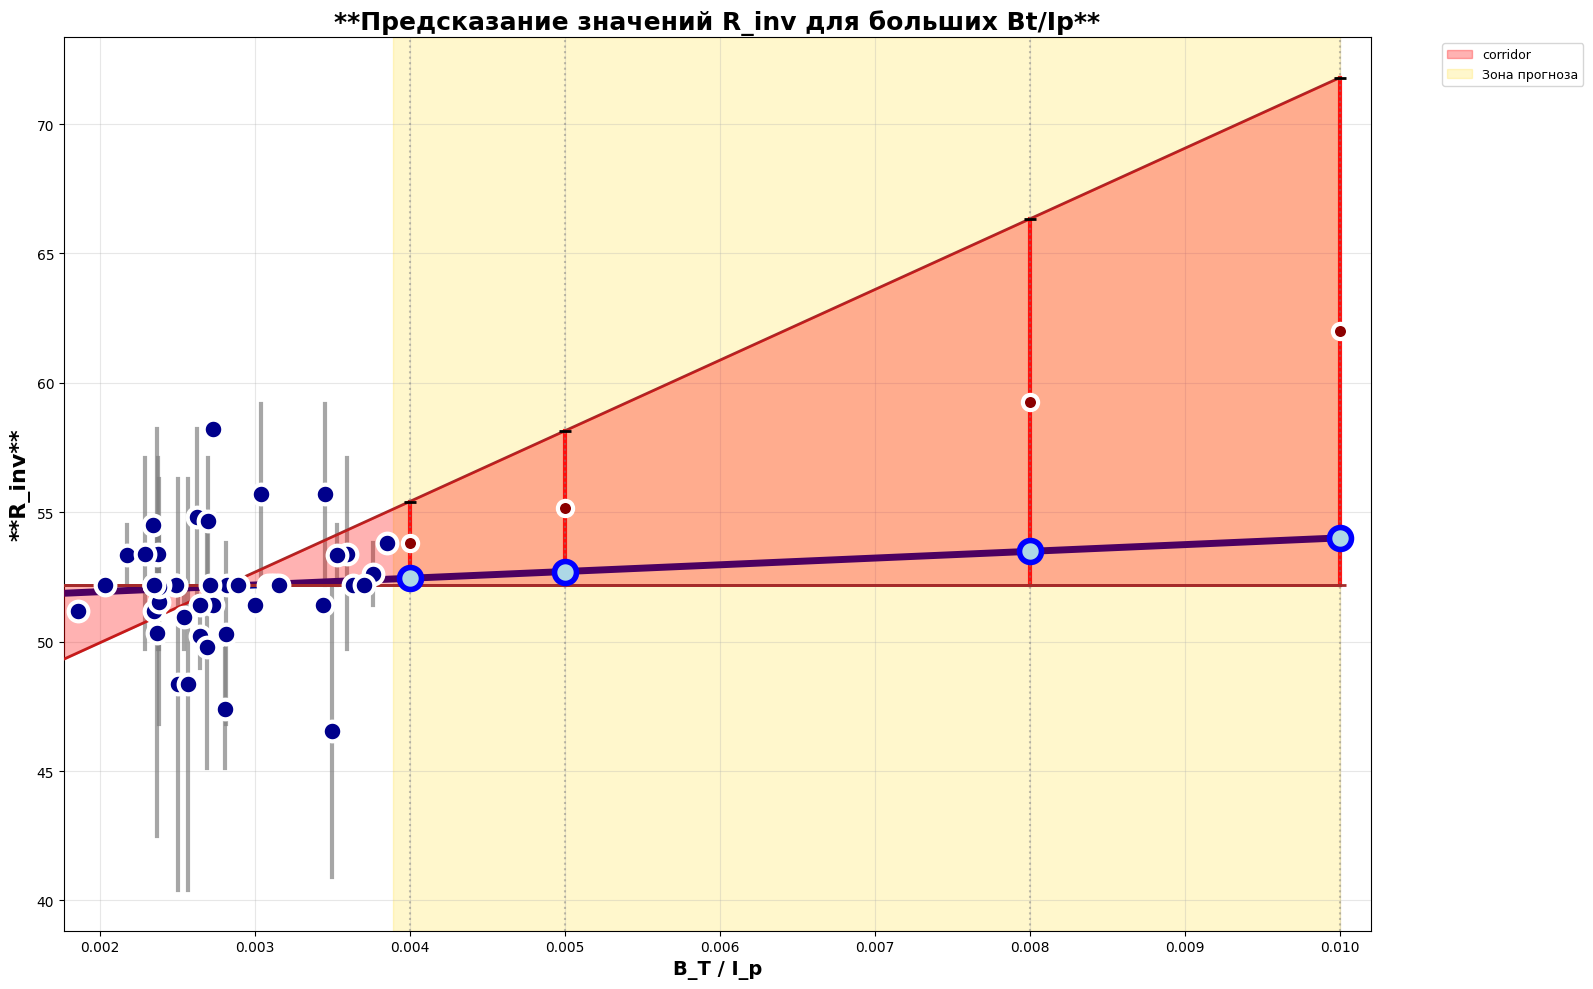

In [150]:
# ========================================
# 1. РАСЧЕТ ТРЕНДОВ (внешняя/внутренняя)
# ========================================
X_ext = valid_ext['BT_over_Ip'].values
centers_ext = (valid_ext['rinv_ext_min'] + valid_ext['rinv_ext_max']) / 2
slope_ext, intercept_ext = np.polyfit(X_ext, centers_ext, 1)

# Внутренняя оценка
try:
    X_int = valid_int['BT_over_Ip'].values
    centers_int = (valid_int['rinv_int_min'] + valid_int['rinv_int_max']) / 2
    slope_int, intercept_int = np.polyfit(X_int, centers_int, 1)
    has_internal = True
except:
    slope_int, intercept_int = slope_ext*0.95, intercept_ext*1.02
    has_internal = False

x_forecast = np.linspace(valid_ext['BT_over_Ip'].min()*0.95, 0.01, 500)

# ========================================
# 2. АЛГОРИТМ: Коридор совместных зависимостей
# ========================================
def algorithm_A_robust(valid_data, max_pairs=100):
    lines = []
    n_points = len(valid_data)
    pairs = [(i,j) for i in range(n_points) for j in range(i+1, min(i+6, n_points))]
    pairs = pairs[:max_pairs]

    mean_width = np.mean(valid_data['rinv_ext_max'] - valid_data['rinv_ext_min'])
    tolerance = mean_width * 0.05
    min_valid_ratio = 0.7
    min_valid_points = int(min_valid_ratio * (n_points - 2))

    for i, j in pairs:
        x_i = valid_data.iloc[i]['BT_over_Ip']
        y_i_min, y_i_max = valid_data.iloc[i]['rinv_ext_min'], valid_data.iloc[i]['rinv_ext_max']
        x_j = valid_data.iloc[j]['BT_over_Ip']
        y_j_min, y_j_max = valid_data.iloc[j]['rinv_ext_min'], valid_data.iloc[j]['rinv_ext_max']

        corners = [
            (x_i, y_i_min, x_j, y_j_min),
            (x_i, y_i_min, x_j, y_j_max),
            (x_i, y_i_max, x_j, y_j_min),
            (x_i, y_i_max, x_j, y_j_max)
        ]

        for k, (xa, ya, xb, yb) in enumerate(corners, 1):
            if abs(xa - xb) < 1e-8: continue
            a_k = (yb - ya) / (xb - xa)
            b_k = ya - a_k * xa

            valid_count = 0
            for m_idx, row in valid_data.iterrows():
                if m_idx in [i, j]: continue
                x_m = row['BT_over_Ip']
                y_pred_m = a_k * x_m + b_k
                if row['rinv_ext_min']-tolerance <= y_pred_m <= row['rinv_ext_max']+tolerance:
                    valid_count += 1

            if valid_count >= min_valid_points:
                lines.append({'slope': a_k, 'intercept': b_k})

    if len(lines) < 3:
        centers = (valid_data['rinv_ext_min'] + valid_data['rinv_ext_max']) / 2
        slope_base, intercept_base = np.polyfit(valid_data['BT_over_Ip'], centers, 1)
        mean_width = np.mean(valid_data['rinv_ext_max'] - valid_data['rinv_ext_min'])
        lines = [
            {'slope': slope_base, 'intercept': intercept_base - mean_width/3},
            {'slope': slope_base, 'intercept': intercept_base},
            {'slope': slope_base, 'intercept': intercept_base + mean_width/3}
        ]

    return lines

# ========================================
# 3. ПОСТРОЕНИЕ КОРИДОРА
# ========================================
corridor_lines = algorithm_A_robust(valid_ext)
y_all_lines = np.array([[line['slope']*x + line['intercept'] for x in x_forecast]
                       for line in corridor_lines])
y_lower_A = np.min(y_all_lines, axis=0)
y_upper_A = np.max(y_all_lines, axis=0)

# ========================================
# 4. ТОЧКИ ПРОГНОЗА
# ========================================
forecast_bt_ip = np.array([0.004, 0.005, 0.008, 0.01])
Rinv_ext_centers = slope_ext * forecast_bt_ip + intercept_ext
Rinv_int_centers = slope_int * forecast_bt_ip + intercept_int

Rinv_A_lower = []
Rinv_A_upper = []
for bt_ip in forecast_bt_ip:
    idx = np.argmin(np.abs(x_forecast - bt_ip))
    Rinv_A_lower.append(y_lower_A[idx])
    Rinv_A_upper.append(slope_int * bt_ip + intercept_int)

# ========================================
# 5. ВИЗУАЛИЗАЦИЯ (ТОЧКИ НАВЕРХУ!)
# ========================================
plt.figure(figsize=(16, 10))

# Исходные данные (серые усы)
for _, row in valid_ext.iterrows():
    x = row['BT_over_Ip']
    plt.plot([x,x], [row['rinv_ext_min'], row['rinv_ext_max']], 'gray', lw=3, alpha=0.7)

# ТРЕНДЫ
plt.plot(x_forecast, slope_ext * x_forecast + intercept_ext, 'darkblue', lw=5, zorder=8
         )
plt.plot(x_forecast, slope_int * x_forecast + intercept_int, 'brown', lw=2, zorder=8
         )

# КОРИДОР A
plt.fill_between(x_forecast, y_lower_A, y_upper_A, alpha=0.2, color='brown', zorder=10
                )
plt.plot(x_forecast, y_lower_A, 'brown', lw=2, zorder=11)
plt.plot(x_forecast, y_upper_A, 'brown', lw=2, zorder=11)

# ЗАКРАШЕННАЯ ОБЛАСТЬ между коричневой нижней и внутренней
plt.fill_between(x_forecast, y_lower_A, slope_int * x_forecast + intercept_int,
                alpha=0.3, color='red', zorder=9,
                label='corridor')

plt.scatter(valid_ext['BT_over_Ip'], centers_ext,
           c='darkblue', s=200,
           edgecolors='white', linewidth=3,
           zorder=30,
          marker='o')

plt.scatter(forecast_bt_ip, Rinv_ext_centers,
           c='lightblue', s=250,
           edgecolors='blue', linewidth=4,
           zorder=35,
           marker='o')

#  КРАСНЫЕ УСЫ
for i, bt_ip in enumerate(forecast_bt_ip):
    lower_A = Rinv_A_lower[i]
    upper_int = Rinv_A_upper[i]
    center = (lower_A + upper_int) / 2

    plt.axvline(bt_ip, color='gray', lw=1.5, linestyle=':', alpha=0.5, zorder=15)

    # Красный ус
    plt.plot([bt_ip, bt_ip], [lower_A, upper_int], color='red', lw=3, alpha=0.9, zorder=2)

    # Точки концов
    plt.scatter(bt_ip, lower_A, c='brown', s=80, zorder=26,
               edgecolors='darkred', linewidth=2, marker='_')
    plt.scatter(bt_ip, upper_int, c='black', s=80, zorder=27,
               edgecolors='white', linewidth=2, marker='_')

    # Середина уса
    plt.scatter(bt_ip, center, c='darkred', s=120, zorder=28,
               edgecolors='white', linewidth=3, marker='o')

plt.axvspan(valid_ext['BT_over_Ip'].max()*1.01, 0.01, alpha=0.2, color='gold', zorder=1, label='Зона прогноза')

plt.xlabel('B_T / I_p', fontsize=14, fontweight='bold')
plt.ylabel('**R_inv**', fontsize=16, fontweight='bold')
plt.title('**Предсказание значений R_inv для больших Bt/Ip**', fontsize=18, fontweight='bold')
plt.legend(fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(valid_ext['BT_over_Ip'].min()*0.95, 0.0102)
plt.tight_layout()
plt.savefig('ris_5_prognoz.png', dpi=300, bbox_inches='tight')
plt.show()
